In [1]:
import logging
import os
import pandas as pd
import numpy as np
import dalex as dx
import shap
import autosklearn.classification
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

pd.options.display.max_columns = 999
RANDOM_STATE = 42

Possible set intersection at position 3


In [2]:
DATA_PATH = os.path.join('data', 'final_train.csv')
df = pd.read_csv(DATA_PATH, index_col=0)

In [3]:
x, y = df.drop(columns = ['Activity']), df['Activity']

In [4]:
y_ = y.astype('category').cat.codes

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=RANDOM_STATE)

In [6]:
model = joblib.load(os.path.join('results','automl-single-model-2021-28-09-21-28-03','model.joblib'))

In [7]:
def generate_shap_values(model, x, i):
    med = x.median().values.reshape((1, x.shape[1]))
    shap_model = shap.KernelExplainer(model.predict_proba, med, )
    shap_values = shap_model.shap_values(x.iloc[:i, :], )
    return shap_model, shap_values

In [8]:
explain_observation_no = 100

In [9]:
shap_model, shap_values = generate_shap_values(model, x, explain_observation_no)

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14479667 0.0725267  0.04843701 0.0363924  0.02916582 0.02434825
 0.02090726 0.01832664 0.01631959 0.01471405 0.01340051 0.01230597
 0.0113799  0.0105862  0.00989838 0.0092966  0.00876568 0.00829381
 0.00787166 0.00749177 0.00714811 0.00683574 0.00655057 0.00628922
 0.00604881 0.00582693 0.00562153 0.00543084 0.00525333 0.00508769
 0.00493278 0.00478758 0.00465121 0.00452289 0.00440194 0.00428774
 0.00417974 0.00407746 0.00398045 0.00388831 0.0038007  0.00371729
 0.00363778 0.00356192 0.00348945 0.00342016 0.00335384 0.0032903
 0.00322939 0.00317093 0.0031148  0.00306084 0.00300894 0.00295899
 0.00291087 0.0028645  0.00281977 0.00277661 0.00273494 0.00269467
 0.00265574 0.00261809 0.00258166 0.00254638 0.00251221 0.00247909
 0.00244699 0.00241584 0.00238562 0.00235628 0.00232779 0.0023001
 0.0022732  0.00224704 0.00222159 0.00219683 0.00217274 0.00214928
 0.00212643 0.00210417 0.00208248 0.00206133 0.00204071 0.002020

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.00972902  0.          0.         -0.0082802   0.         -0.02304742
 -0.03397142  0.          0.          0.          0.02312721  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01331765 -0.01683265  0.          0.          0.          0.
  0.          0.          0.01089673  0.          0.          0.
  0.          0.00105399  0.          0.          0.         -0.01877644
  0.         -0.01488395  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.02401747  0.          0.          0.02278741  0.          0.0203189
  0.          0.          0.          0.          0.01974493 -0.01690654
  0.          0.          0.          0.         -0.04017129  0.
 -0.00866125  0.          0.02774

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.30549514e-05  0.00000000e+00  0.00000000e+00
  2.33860478e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.62473012e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.85704705e-05  0.00000000e+00  0.00000000e+00
  4.40816205e-05  0.00000000e+00  3.56661729e-06  0.00000000e+00

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14536559 0.07281471 0.0486314  0.03653999 0.02928533 0.02444906
 0.02099472 0.01840408 0.01638926 0.0147775  0.01345887 0.01236011
 0.01143046 0.01063369 0.00994322 0.00933913 0.00880617 0.00833248
 0.00790871 0.00752737 0.0071824  0.00686884 0.00658259 0.00632024
 0.00607892 0.00585621 0.00565004 0.00545863 0.00528046 0.0051142
 0.00495871 0.00481297 0.0046761  0.00454731 0.00442591 0.00431129
 0.0042029  0.00410025 0.00400288 0.00391042 0.00382249 0.00373879
 0.003659   0.00358286 0.00351014 0.00344061 0.00337406 0.00331031
 0.00324918 0.00319053 0.0031342  0.00308006 0.00302799 0.00297787
 0.0029296  0.00288308 0.00283821 0.00279491 0.0027531  0.0027127
 0.00267366 0.00263589 0.00259935 0.00256396 0.00252969 0.00249648
 0.00246428 0.00243304 0.00240274 0.00237332 0.00234474 0.00231698
 0.00229001 0.00226378 0.00223827 0.00221344 0.00218929 

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.02951291  0.          0.          0.         -0.00539188  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.01083982  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.01184008  0.          0.          0.          0.         -0.05488079
  0.          0.         -0.01521571  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.04850621  0.         -0.00494791  0.          0.          0.
  0.          0.          0.          0.          0.         -0.00831198
  0.          0.          0.02776095  0.        

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.00472026  0.          0.
  0.         -0.01984723  0.00409114  0.          0.         -0.01083189
 -0.01139208 -0.00946447  0.00978217 -0.01221254 -0.00822433  0.
  0.          0.          0.          0.          0.          0.01805372
  0.01126733  0.          0.          0.         -0.00365846  0.01419096
 -0.00739794  0.          0.          0.00900633 -0.00710538  0.
 -0.00746315  0.          0.          0.01025644  0.01117002  0.
  0.          0.         -0.00313584  0.          0.          0.00690206
  0.00427505  0.00832741  0.          0.          0.00648838  0.
  0.01372622  0.01076737  0.          0.          0.01070849  0.
  0.007746    0.01527967  0.          0.          0.          0.
  0.         -0.00988618  0.          0.          0.         -0.01339841
 -0.00582208 -0.00332467  0.00551479 -0.0058453   0.00597075  0.
  0.          0.01008774

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-1.46036659e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.68219322e-04  1.18976601e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.59636595e-02  0.00000000e+00 -2.77849659e-02
  0.00000000e+00 -1.15351535e-02 -1.83774906e-02  1.77599708e-03
  0.00000000e+00 -1.74184779e-02  3.31729068e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.19854223e-02
  0.00000000e+00  1.77313730e-02  0.00000000e+00  0.00000000e+00
  1.43860412e-02  0.00000000e+00  0.00000000e+00  1.52431902e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.77344481e-02
 -1.89220044e-02  0.00000000e+00  2.34184322e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27464166e-02
  3.97305376e-02  0.00000000e+00  1.74865705e-02  1.88395946e-02
  1.23710604e-02  0.00000000e+00  0.00000000e+00  2.10341448e-02

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14698903 0.07363834 0.04918848 0.03696384 0.02962928 0.02473977
 0.02124743 0.01862831 0.01659135 0.0149619  0.01362883 0.01251803
 0.01157821 0.01077274 0.01007475 0.00946408 0.00892533 0.00844651
 0.00801815 0.0076327  0.00728401 0.00696708 0.00667776 0.00641261
 0.00616872 0.00594364 0.00573528 0.00554185 0.00536181 0.00519382
 0.0050367  0.00488945 0.00475116 0.00462105 0.00449841 0.00438262
 0.00427313 0.00416944 0.0040711  0.00397772 0.00388892 0.00380439
 0.00372382 0.00364695 0.00357352 0.00350332 0.00343614 0.00337179
 0.0033101  0.0032509  0.00319406 0.00313943 0.00308689 0.00303633
 0.00298763 0.0029407  0.00289544 0.00285178 0.00280962 0.00276889
 0.00272952 0.00269145 0.00265462 0.00261896 0.00258442 0.00255096
 0.00251852 0.00248706 0.00245653 0.00242691 0.00239814 0.00237019
 0.00234304 0.00231664 0.00229097 0.002266   0.0022417  0.00221805
 0.00219502 0.00217259 0.00215073 0.00212943 0.00210867 0.0020

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-0.03485936  0.         -0.01586805  0.          0.          0.
  0.          0.          0.          0.01360513  0.          0.
  0.          0.          0.          0.01449344 -0.02166233  0.
  0.01611171  0.          0.01456917  0.          0.          0.
  0.          0.         -0.01383121  0.          0.01081561  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.0106562   0.          0.         -0.01883241
  0.         -0.00584697  0.02043891 -0.02605114  0.          0.
  0.         -0.01446222  0.          0.01415959  0.          0.
  0.          0.          0.          0.01538218  0.         -0.02102945
  0.          0.          0.          0.          0.          0.
  0.          0.00505917  0.         -0.0061928   0.          0.
  0.          0.          0.     

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-5.72028383e-05  0.00000000e+00 -6.90670564e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.69358970e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.41111638e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.15835501e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.97924678e-04
  0.00000000e+00  0.00000000e+00 -4.31494147e-04  3.69618249e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.58407668e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.82977579e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.12328782e-03
  7.41479026e-04  0.00000000e+00 -3.47056413e-04 

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  7.30886444e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.01662625e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.38134963e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.82352914e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.23997371e-04 -3.92811086e-04
  2.44809866e-04  0.00000000e+00  0.00000000e+00  3.44542818e-04
  0.00000000e+00  0.00000000e+00  3.39504040e-04 -3.39497759e-04
  0.00000000e+00  0.00000000e+00 -3.94779186e-04  0.00000000e+00
 -4.17655732e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.45102137e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.15472728e-03
 -8.21020814e-04  0.00000000e+00  3.14698534e-04 

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14494668 0.07260276 0.04848843 0.03643149 0.02919752 0.02437503
 0.02093053 0.01834727 0.01633817 0.01473099 0.01341612 0.01232047
 0.01139346 0.01059894 0.00991043 0.00930805 0.00877659 0.00830424
 0.00788166 0.00750139 0.00715739 0.0068447  0.00655926 0.00629764
 0.00605699 0.00583489 0.00562929 0.00543841 0.00526073 0.00509493
 0.00493986 0.00479452 0.00465802 0.00452958 0.00440852 0.00429421
 0.00418611 0.00408372 0.00398662 0.0038944  0.00380671 0.00372322
 0.00364364 0.0035677  0.00349517 0.00342581 0.00335943 0.00329585
 0.00323488 0.00317637 0.00312018 0.00306618 0.00301424 0.00296424
 0.00291609 0.00286967 0.00282491 0.00278171 0.00274    0.0026997
 0.00266075 0.00262307 0.0025866  0.0025513  0.00251711 0.00248397
 0.00245183 0.00242067 0.00239043 0.00236107 0.00233255 0.00230485
 0.00227793 0.00225175 0.00222629 0.0022

INFO:shap:np.sum(w_aug) = 561.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.         -0.0053849  -0.00351306  0.          0.          0.
 -0.02017698  0.         -0.00348733  0.          0.          0.
  0.          0.          0.         -0.01690948  0.          0.
  0.          0.          0.         -0.01356139  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.05247702
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.01570679
  0.03297643  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.02639109  0.     

INFO:shap:np.sum(w_aug) = 561.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  1.93035485e-02  0.00000000e+00
  0.00000000e+00  1.78910555e-02  0.00000000e+00  2.79455245e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.17735129e-03
  0.00000000e+00 -1.00842088e-03  0.00000000e+00  2.00163294e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.44869245e-03
 -2.85656209e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.40902935e-02  0.00000000e+00  1.21122295e-02 -1.30656951e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.97425469e-02  0.00000000e+00 -2.67396507e-02
  0.00000000e+00  0.00000000e+00  1.46909182e-02  0.00000000e+00
 -2.42414991e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.79073022e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 561.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [0.         0.         0.         0.00117367 0.00292574 0.
 0.00069096 0.00264726 0.         0.         0.         0.
 0.         0.         0.0041828  0.         0.         0.
 0.00066614 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00239329 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00158437 0.         0.         0.         0.         0.
 0.         0.00167559 0.         0.         0.         0.00089442
 0.         0.         0.00192568 0.         0.         0.00019025
 0.         0.         0.00165037 0.00048849 0.00116199 0.00246121
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00111536 0.         0.00252066
 0.         0.00193809 0

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14698903 0.07363834 0.04918848 0.03696384 0.02962928 0.02473977
 0.02124743 0.01862831 0.01659135 0.0149619  0.01362883 0.01251803
 0.01157821 0.01077274 0.01007475 0.00946408 0.00892533 0.00844651
 0.00801815 0.0076327  0.00728401 0.00696708 0.00667776 0.00641261
 0.00616872 0.00594364 0.00573528 0.00554185 0.00536181 0.00519382
 0.0050367  0.00488945 0.00475116 0.00462105 0.00449841 0.00438262
 0.00427313 0.00416944 0.0040711  0.00397772 0.00388892 0.00380439
 0.00372382 0.00364695 0.00357352 0.00350332 0.00343614 0.00337179
 0.0033101  0.0032509  0.00319406 0.00313943 0.00308689 0.00303633
 0.00298763 0.0029407  0.00289544 0.00285178 0.00280962 0.00276889
 0.00272952 0.00269145 0.00265462 0.00261896 0.00258442 0.00255096
 0.00251852 0.00248706 0.00245653 0.00242691 0.00239814 0.00237019
 0.00234304 0.00231664 0.00229097 0.002266   0.0022417  0.00221805
 0.00219502 0.00217259 0.00215073 0.00212943 0.00210867 0.0020

INFO:shap:np.sum(w_aug) = 513.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [-0.00559551  0.          0.          0.          0.          0.
  0.01766395  0.          0.          0.          0.00566239  0.02064975
 -0.01418024 -0.00239836  0.          0.          0.         -0.00972042
  0.          0.          0.0037154   0.01062489  0.         -0.01770967
  0.          0.          0.          0.         -0.00929405  0.
  0.          0.01038745  0.          0.          0.          0.
  0.          0.          0.         -0.0060528   0.01327413 -0.01668601
  0.          0.          0.          0.         -0.0120042   0.
  0.          0.01308006 -0.0033448   0.         -0.01610519  0.00784312
  0.02255018  0.         -0.01655219  0.          0.          0.0090343
  0.          0.0138363   0.          0.          0.01698125  0.0190151
  0.          0.          0.          0.         -0.02640607  0.
 -0.01499445  0.          0.01819467 -0.01179231

INFO:shap:np.sum(w_aug) = 513.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [-3.09679687e-04  3.93409623e-04 -5.80962293e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.41193846e-04 -6.60241839e-04
  0.00000000e+00  3.32970393e-04  3.11990709e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.35728597e-04  0.00000000e+00
  0.00000000e+00 -5.66245689e-04  0.00000000e+00 -7.58930052e-04
  3.54488008e-04  4.20695974e-04 -2.67753308e-04  1.59329074e-04
  0.00000000e+00  0.00000000e+00 -1.65562526e-04  0.00000000e+00
  0.00000000e+00 -2.47385123e-04  0.00000000e+00  1.52623961e-04
 -4.27320364e-04  0.00000000e+00  0.00000000e+00  3.87461264e-04
  0.00000000e+00 -2.88371908e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.48060003e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.16882360e-04
 -2.19744650e-04  4.63044190e-04  3.91157810e-04 -1.11812371e-03
  0.00000000e+00  0.00000000e+00  4.7

INFO:shap:np.sum(w_aug) = 513.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00000000e+00 -4.16952685e-04  6.58987685e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.51695248e-04  7.23323152e-04
  0.00000000e+00 -3.54749212e-04 -2.54939024e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.52236340e-04  0.00000000e+00
  0.00000000e+00  6.15847289e-04  0.00000000e+00  7.36547519e-04
 -3.72834630e-04 -4.64976511e-04  2.78081683e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.11885319e-04  0.00000000e+00
  0.00000000e+00  2.42309519e-04  0.00000000e+00 -1.97885357e-04
  3.94698810e-04  0.00000000e+00  0.00000000e+00 -3.95061977e-04
  0.00000000e+00  2.79953808e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.44615797e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.47083397e-04
  2.60159677e-04 -4.63112208e-04 -4.21245006e-04  1.17540384e-03
  0.00000000e+00  0.00000000e+00 -5.1

INFO:shap:np.sum(w_aug) = 513.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448715  0.07256464 0.04846266 0.0364119  0.02918163 0.02436161
 0.02091887 0.01833693 0.01632886 0.0147225  0.01340829 0.0123132
 0.01138666 0.01059255 0.00990439 0.00930231 0.00877112 0.00829901
 0.00787664 0.00749657 0.00715274 0.00684021 0.0065549  0.00629341
 0.00605289 0.0058309  0.0056254  0.00543461 0.00525702 0.0050913
 0.00493631 0.00479104 0.00465461 0.00452623 0.00440522 0.00429096
 0.00418291 0.00408058 0.00398352 0.00389135 0.0038037  0.00372025
 0.0036407  0.0035648  0.0034923  0.00342298 0.00335663 0.00329307
 0.00323212 0.00317364 0.00311748 0.0030635  0.00301158 0.00296161
 0.00291347 0.00286708 0.00282233 0.00277916 0.00273746 0.00269718
 0.00265824 0.00262057 0.00258412 0.00254883 0.00251465 0.00248152
 0.0024494  0.00241825 0.00238802 0.00235867 0.00233016 0.00230247
 0.00227555 0.00224938 0.0022

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00473461  0.01516367  0.         -0.01332144 -0.00161862  0.00591158
 -0.01066261 -0.00795702 -0.01582828 -0.00299969 -0.0229484   0.
  0.          0.01002081  0.         -0.00839662  0.          0.
  0.          0.01038157  0.         -0.00253491  0.01782898 -0.00219824
  0.00832578  0.          0.          0.          0.          0.
  0.          0.0152642  -0.00541577  0.         -0.01311248  0.
  0.00478422  0.          0.         -0.00221303  0.          0.
 -0.0030444   0.00192037  0.          0.         -0.0043417   0.
 -0.0028358  -0.00387278  0.         -0.00960635 -0.02708068  0.01301626
  0.0097088   0.          0.          0.          0.00380009 -0.03329987
 -0.00989371  0.          0.         -0.0044704   0.00092471  0.02109025
  0.          0.          0.          0.00458619  0.          0.
  0.          0.00567614  0.          0.00663238  0.01098509 -0.00590463
 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.87136197e-05 -1.24661221e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.84861866e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.79957908e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  8.12688907e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00 -3.29079462e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.48646028e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.27944299e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.33825713e-04  0.00000000e+00  3.67997236e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.91781856e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.79523057e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.97652990e-04  1.36848774e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.85293121e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14479667 0.0725267  0.04843701 0.0363924  0.02916582 0.02434825
 0.02090726 0.01832664 0.01631959 0.01471405 0.01340051 0.01230597
 0.0113799  0.0105862  0.00989838 0.0092966  0.00876568 0.00829381
 0.00787166 0.00749177 0.00714811 0.00683574 0.00655057 0.00628922
 0.00604881 0.00582693 0.00562153 0.00543084 0.00525333 0.00508769
 0.00493278 0.00478758 0.00465121 0.00452289 0.00440194 0.00428774
 0.00417974 0.00407746 0.00398045 0.00388831 0.0038007  0.00371729
 0.00363778 0.00356192 0.00348945 0.00342016 0.00335384 0.0032903
 0.00322939 0.00317093 0.0031148  0.00306084 0.00300894 0.00295899
 0.00291087 0.0028645  0.00281977 0.00277661 0.00273494 0.00269467
 0.00265574 0.00261809 0.00258166 0.00254638 0.00251221 0.00247909
 0.00244699 0.00241584 0.00238562 0.00235628 0.00232779 0.0023001
 0.0022732  0.00224704 0.00222159 0.00219683 0.00217274 0.00214928
 0.00212643 0.00210417 0.00208248 0.00206133 0.00204071 0.002020

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-0.01499009  0.03121718  0.00643614  0.          0.         -0.00307614
  0.00698504  0.          0.00754616  0.          0.          0.
  0.00680266 -0.01395581  0.         -0.01548171 -0.02106284  0.0121274
  0.         -0.00447312  0.          0.          0.         -0.0207131
  0.02006444  0.         -0.01191005  0.          0.00332531  0.00591974
  0.         -0.01779252  0.00561625 -0.00213363 -0.02204874  0.
 -0.01121266  0.         -0.01169779  0.01542817  0.          0.
  0.          0.          0.          0.01391152  0.          0.
  0.          0.          0.          0.01094296  0.          0.01118493
  0.          0.          0.          0.         -0.01563508  0.
  0.         -0.0159228  -0.00545587  0.01631942  0.         -0.02188553
  0.          0.00712215 -0.00414791 -0.01084792  0.          0.
  0.         -0.01531362  0.01426498  0.          0.         -0.0059

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-7.45215002e-04  0.00000000e+00  0.00000000e+00  3.49374163e-04
 -5.01181970e-04 -2.10942599e-04  0.00000000e+00 -7.57388596e-04
 -5.64417149e-04  0.00000000e+00  0.00000000e+00 -4.73929668e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.21796332e-04
  0.00000000e+00  0.00000000e+00  3.82164352e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.12236982e-04  5.59020338e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.05617980e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.16172414e-04  3.67970764e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.71883037e-05  3.59307753e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.68341491e-04 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 2.87307956e-04  0.00000000e+00  0.00000000e+00 -2.54995187e-04
  3.06661979e-04  4.42861370e-04  1.95863096e-04  7.64539052e-04
  2.90605922e-04  0.00000000e+00  0.00000000e+00  8.03753895e-04
 -3.72936461e-04  0.00000000e+00  0.00000000e+00  2.78382554e-04
 -5.84683271e-04  0.00000000e+00  0.00000000e+00  6.14495009e-04
 -3.05915986e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.24607493e-05 -3.66191517e-04  0.00000000e+00  0.00000000e+00
 -2.58082045e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.19221294e-04 -4.46874134e-04  4.13954726e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.18056840e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.43815353e-04 -3.36605323e-04  0.00000000e+00 -1.94669463e-04
  0.00000000e+00  0.00000000e+00 -5.62834964e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.19972789e-04 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 3.36233566e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.51420665e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.34723638e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.16878584e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  8.79892789e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14479667 0.0725267  0.04843701 0.0363924  0.02916582 0.02434825
 0.02090726 0.01832664 0.01631959 0.01471405 0.01340051 0.01230597
 0.0113799  0.0105862  0.00989838 0.0092966  0.00876568 0.00829381
 0.00787166 0.00749177 0.00714811 0.00683574 0.00655057 0.00628922
 0.00604881 0.00582693 0.00562153 0.00543084 0.00525333 0.00508769
 0.00493278 0.00478758 0.00465121 0.00452289 0.00440194 0.00428774
 0.00417974 0.00407746 0.00398045 0.00388831 0.0038007  0.00371729
 0.00363778 0.00356192 0.00348945 0.00342016 0.00335384 0.0032903
 0.00322939 0.00317093 0.0031148  0.00306084 0.00300894 0.00295899
 0.00291087 0.0028645  0.00281977 0.00277661 0.00273494 0.00269467
 0.00265574 0.00261809 0.00258166 0.00254638 0.00251221 0.00247909
 0.00244699 0.00241584 0.00238562 0.00235628 0.00232779 0.0023001
 0.0022732  0.00224704 0.00222159 0.00219683 0.00217274 0.00214928
 0.00212643 0.00210417 0.00208248 0.00206133 0.00204071 0.002020

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.0266353   0.          0.          0.          0.         -0.00144679
 -0.00246329  0.          0.          0.          0.          0.
  0.          0.         -0.00405465 -0.00750965  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00119179
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.02466257  0.
 -0.01233685  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.01490878 -0.03542541
  0.          0.          0.          0.          0.          0.
  0.         -0.00730657  0.          0.          0.         -0.01415785
  0.          0. 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.17686925e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.93932406e-04  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.36053556e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14479667 0.0725267  0.04843701 0.0363924  0.02916582 0.02434825
 0.02090726 0.01832664 0.01631959 0.01471405 0.01340051 0.01230597
 0.0113799  0.0105862  0.00989838 0.0092966  0.00876568 0.00829381
 0.00787166 0.00749177 0.00714811 0.00683574 0.00655057 0.00628922
 0.00604881 0.00582693 0.00562153 0.00543084 0.00525333 0.00508769
 0.00493278 0.00478758 0.00465121 0.00452289 0.00440194 0.00428774
 0.00417974 0.00407746 0.00398045 0.00388831 0.0038007  0.00371729
 0.00363778 0.00356192 0.00348945 0.00342016 0.00335384 0.0032903
 0.00322939 0.00317093 0.0031148  0.00306084 0.00300894 0.00295899
 0.00291087 0.0028645  0.00281977 0.00277661 0.00273494 0.00269467
 0.00265574 0.00261809 0.00258166 0.00254638 0.00251221 0.00247909
 0.00244699 0.00241584 0.00238562 0.00235628 0.00232779 0.0023001
 0.0022732  0.00224704 0.00222159 0.00219

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.0350524   0.01421102  0.          0.02986056  0.          0.
  0.00826179 -0.02813932  0.          0.          0.          0.01014794
 -0.00429308  0.00749198  0.          0.          0.          0.
  0.          0.         -0.00149785 -0.0198732   0.         -0.00311672
  0.          0.          0.00566629  0.02969068  0.          0.
  0.02235735  0.          0.          0.         -0.02222372  0.
  0.          0.          0.          0.          0.01250599  0.
 -0.00678586 -0.00719387  0.          0.00508733  0.          0.02916909
  0.          0.         -0.00521525  0.          0.          0.
  0.         -0.02820962 -0.00795536 -0.01014613  0.00586548 -0.02731752
 -0.02816907  0.00954443  0.          0.          0.          0.
  0.          0.007001   -0.01110492 -0.01836256  0.         -0.01619626
  0.          0.          0.          0.          0.          0.
  0.01598246 -0.0117773 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-2.13478212e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.96761619e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.73865697e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.28910892e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.11263458e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.21147274e-04  0.00000000e+00

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.33524138e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.77769861e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 9.30465854e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.58257736e-04  0.00000000e+00  1.93042563e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  7.88365332e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.25678388e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.40026463e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14475855 0.07250693 0.04842335 0.03638179 0.02915704 0.02434069
 0.02090057 0.0183206  0.01631406 0.01470892 0.01339571 0.01230144
 0.0113756  0.01058209 0.00989445 0.00929282 0.00876203 0.00829027
 0.00786822 0.00748842 0.00714484 0.00683255 0.00654745 0.00628615
 0.0060458  0.00582397 0.00561862 0.00542797 0.0052505  0.0050849
 0.00493002 0.00478485 0.00464851 0.00452022 0.0043993  0.00428512
 0.00417714 0.00407488 0.00397788 0.00388577 0.00379817 0.00371478
 0.00363528 0.00355943 0.00348697 0.00341769 0.00335138 0.00328786
 0.00322696 0.00316851 0.00311238 0.00305843 0.00300654 0.00295659
 0.00290848 0.00286212 0.00281739 0.00277424 0.00273256 0.0026923
 0.00265338 0.00261573 0.0025793  0.00254402 0.00250986 0.00247674
 0.00244464 0.00241349 0.00238327 0.00235393 0.00232544 0.00229775
 0.00227085 0.00224469 0.00221924 0.00219448 0.00217038 0.00214692
 0.00212407 0.00210181 0.00208012 0.00205897 0.00203835 0.002018

INFO:shap:np.sum(w_aug) = 569.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
 -0.0222062  -0.00757503  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00423141
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.0034266   0.          0.         -0.05152221
  0.          0.         -0.00132457  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00595471  0.          0.     

INFO:shap:np.sum(w_aug) = 569.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 1.58856170e-03  0.00000000e+00  1.87216008e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.09797332e-03  2.54962997e-03
  5.13710222e-04  0.00000000e+00  1.06910831e-03 -1.16323274e-03
  2.39675067e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.51905407e-03 -1.92458736e-03  1.86512465e-03
 -3.13984993e-03  0.00000000e+00 -4.48053184e-04 -1.02771518e-03
  6.88866751e-04  1.56919183e-03  4.58385687e-03  0.00000000e+00
 -7.71913183e-04  0.00000000e+00  0.00000000e+00 -1.41843696e-04
  0.00000000e+00  4.67409118e-03 -3.15829958e-04  0.00000000e+00
  0.00000000e+00  5.00844421e-03 -3.11473261e-04 -2.86863064e-03
  0.00000000e+00  9.95439499e-04 -1.98852743e-03 -2.23429204e-03
 -2.51361101e-03  2.99223461e-03  7.59653021e-03  0.00000000e+00
  5.87872651e-03  0.00000000e+00 -1.24915489e-03 -8.26429713e-04
  2.46367851e-03  4.93355721e-03  4.81385603e-03 

INFO:shap:np.sum(w_aug) = 569.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  2.93083842e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.51930701e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.05741655e-03  0.00000000e+00
  5.94171992e-03  1.59216259e-03  1.71766532e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.82149486e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.45907987e-02  0.00000000e+00
  8.25447360e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.09035880e-02  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 569.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.01868687e-02  0.00000000e+00 -7.80766721e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.50708207e-03  0.00000000e+00
  4.73941892e-03  0.00000000e+00  6.84570055e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.80425191e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.22245242e-03  0.00000000e+00  4.63262817e-03  2.95148007e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14498355 0.072621   0.04850045 0.03644041 0.02920457 0.02438084
 0.02093545 0.01835152 0.01634191 0.01473431 0.0134191  0.01232316
 0.01139591 0.01060119 0.0099125  0.00930996 0.00877836 0.00830589
 0.0078832  0.00750283 0.00715874 0.00684597 0.00656045 0.00629876
 0.00605805 0.00583589 0.00563023 0.0054393  0.00526158 0.00509573
 0.00494062 0.00479524 0.00465871 0.00453023 0.00440913 0.00429479
 0.00418666 0.00408425 0.00398712 0.00389487 0.00380716 0.00372364
 0.00364404 0.00356808 0.00349553 0.00342615 0.00335975 0.00329615
 0.00323516 0.00317664 0.00312043 0.00306641 0.00301446 0.00296445
 0.00291628 0.00286985 0.00282507 0.00278186 0.00274014 0.00269983
 0.00266086 0.00262317 0.00258669 0.00255138 0.00251717 0.00248402
 0.00245188 0.0024207  0.00239045 0.00236108 0.00233255 0.00230484
 0.00227791 0.00225172 0.00222625 0.00220147 0.00217735 0.00215387
 0.002131   0.00210872 0.002087   0.00206584 0.0020452  0.0020

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
 -0.01288646  0.          0.          0.          0.          0.
 -0.00565726  0.          0.          0.          0.         -0.00299819
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.01680052  0.         -0.0038052  -0.08200679
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00218611 -0.00248842  0.
  0.          0.          0.          0.          0.          0.
  0.          0.     

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.01434423  0.          0.          0.03167603  0.
  0.          0.          0.01076697  0.          0.          0.
  0.          0.          0.008737    0.00948528  0.          0.
  0.02035091  0.          0.          0.          0.          0.
 -0.03411048  0.          0.          0.          0.          0.
  0.          0.          0.0158952   0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00545958  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00870483  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00850265  0.          0.          0.          0.
  0.          0.          0.         

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.88701270e-03  0.00000000e+00 -1.76227290e-02  0.00000000e+00
  0.00000000e+00  1.94840279e-03 -2.84651542e-04  0.00000000e+00
  2.39677426e-03  0.00000000e+00  0.00000000e+00  2.61020635e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.26593882e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.14212275e-03
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1449082  0.0725828  0.04847463 0.03642078 0.02918865 0.02436739
 0.02092377 0.01834116 0.01633258 0.01472581 0.01341126 0.01231589
 0.01138911 0.01059479 0.00990645 0.00930422 0.00877289 0.00830065
 0.00787818 0.007498   0.00715408 0.00684147 0.00655609 0.00629453
 0.00605394 0.0058319  0.00562634 0.0054355  0.00525786 0.0050921
 0.00493707 0.00479176 0.00465529 0.00452688 0.00440583 0.00429155
 0.00418347 0.00408111 0.00398402 0.00389182 0.00380414 0.00372067
 0.0036411  0.00356518 0.00349266 0.00342332 0.00335695 0.00329337
 0.00323241 0.00317391 0.00311773 0.00306374 0.0030118  0.00296181
 0.00291366 0.00286725 0.0028225  0.0027793  0.0027376  0.0026973
 0.00265835 0.00262067 0.00258421 0.00254891 0.00251471 0.00248158
 0.00244945 0.00241828 0.00238804 0.00235868 0.00233017 0.00230246
 0.00227554 0.00224936 0.0022239  0.00219912 0.00217501 0.00215154
 0.00212867 0.0021064  0.00208469 0.00206353 0.0020429  0.002022

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-0.01744424  0.          0.          0.          0.         -0.01817147
  0.02044182  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00490068
  0.          0.          0.          0.          0.          0.02349885
  0.          0.         -0.00597595  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.02820146  0.
  0.          0.          0.          0.          0.         -0.06642415
 -0.0273922   0.         -0.01561357  0.          0.         -0.06788046
  0.          0.          0.          0.         -0.01294429 -0.00945283
 -0.01532876  0.          0.          0.         -0.03468011 -0.01

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00 -1.94112398e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.88348190e-04
  1.79218456e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.31134444e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.46977452e-04  2.43573484e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.43919889e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  1.99949243e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.02124118e-04
 -1.82044963e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.44687449e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.72756150e-04 -2.80641380e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.60091806e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1451353  0.07269793 0.04855246 0.03647995 0.02923664 0.02440793
 0.02095898 0.01837239 0.01636071 0.01475146 0.01343489 0.01233783
 0.01140962 0.01061409 0.00992469 0.00932154 0.0087894  0.00831644
 0.00789332 0.00751257 0.00716813 0.00685504 0.00656923 0.00630728
 0.00606633 0.00584395 0.00563809 0.00544697 0.00526906 0.00510306
 0.00494779 0.00480227 0.0046656  0.004537   0.00441579 0.00430133
 0.0041931  0.00409059 0.00399337 0.00390104 0.00381324 0.00372964
 0.00364997 0.00357394 0.00350132 0.00343188 0.00336542 0.00330176
 0.00324072 0.00318214 0.00312589 0.00307182 0.00301982 0.00296977
 0.00292155 0.00287509 0.00283028 0.00278703 0.00274527 0.00270493
 0.00266593 0.0026282  0.0025917  0.00255636 0.00252213 0.00248895
 0.00245679 0.00242559 0.00239531 0.00236592 0.00233738 0.00230965
 0.0022827  0.00225649 0.00223101 0.002

INFO:shap:np.sum(w_aug) = 559.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
 -0.0391122   0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00737359
  0.          0.          0.          0.          0.          0.
  0.         -0.00357424  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.01436513  0.          0.         -0.00887519  0.
  0.         -0.00879335 -0.00681911 -0.0

INFO:shap:np.sum(w_aug) = 559.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 559.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         

INFO:shap:num_paired_subset_sizes = 282
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [-0.00056705  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.      

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00000000e+00 -9.02023662e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.04304815e-02  0.00000000e+00  0.00000000e+00
  6.02312680e-03  9.65941235e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.32018503e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.22227093e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.25644178e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.60668004e-03  0.00000000e+00
  4.49535134e-03  0.00000000e+00  9.88078083e-03  0.00000000e+00
  6.57897894e-03  0.00000000e+00 -5.65710833e-03  0.00000000e+00
 -1.48544915e-02  0.00000000e+00  1.17557179e-02 -8.04424412e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.37034196e-02
  0.00000000e+00  0.00000000e+00  7.24119906e-03  0.00000000e+00
 -2.96837446e-02  1.14123625e-02  1.71921474e-02 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00000000e+00 -1.73619863e-04 -4.42888149e-04 -1.34190017e-04
 -1.34343798e-03  5.22757478e-04  0.00000000e+00 -7.00565322e-04
  2.66279590e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.10051741e-04 -4.01027438e-05 -2.16750472e-04  8.08662701e-04
  2.43962808e-04  0.00000000e+00 -5.89891793e-04 -3.79189379e-04
  2.56945985e-04  0.00000000e+00  0.00000000e+00 -6.20668436e-04
  3.61854662e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.82875289e-04  0.00000000e+00  0.00000000e+00 -7.53970386e-05
  0.00000000e+00  0.00000000e+00  1.04403839e-04  0.00000000e+00
 -5.40702951e-04  4.07619625e-04  0.00000000e+00  4.84312750e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.50561607e-04
  2.60656253e-04 -7.91763950e-04  0.00000000e+00  0.00000000e+00
 -4.73960802e-04 -3.48976200e-04  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00000000e+00  1.12954904e-04  4.46515166e-04  1.19084153e-04
  1.33098200e-03 -4.76910966e-04  0.00000000e+00  7.27948089e-04
 -2.96966930e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.51711480e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.39858148e-04  6.01633627e-05  1.80381977e-04 -9.30218921e-04
 -1.98399701e-04  0.00000000e+00  6.13223302e-04  3.70481345e-04
 -2.27379518e-04  0.00000000e+00  0.00000000e+00  5.37605080e-04
 -3.46832720e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.78754646e-04  0.00000000e+00  0.00000000e+00  1.17904332e-04
  0.00000000e+00  0.00000000e+00 -1.47451717e-04  0.00000000e+00
  5.89006336e-04 -4.25066465e-04  0.00000000e+00 -5.00189363e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.98638214e-04
 -3.07446227e-04  8.05087586e-04  0.00000000e+00  0.00000000e+00
  3.33315016e-04  3.49666819e-04  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448332  0.07254477 0.04844893 0.03640124 0.02917281 0.02435401
 0.02091214 0.01833086 0.0163233  0.01471734 0.01340347 0.01230865
 0.01138234 0.01058843 0.00990043 0.0092985  0.00876744 0.00829545
 0.00787318 0.0074932  0.00714945 0.006837   0.00655176 0.00629033
 0.00604986 0.00582792 0.00562247 0.00543172 0.00525417 0.00508849
 0.00493353 0.00478829 0.00465189 0.00452354 0.00440256 0.00428832
 0.0041803  0.00407798 0.00398094 0.00388879 0.00380115 0.00371771
 0.00363819 0.0035623  0.00348981 0.0034205  0.00335416 0.00329061
 0.00322967 0.0031712  0.00311505 0.00306108 0.00300916 0.00295919
 0.00291107 0.00286468 0.00281994 0.00277676 0.00273507 0.00269479
 0.00265585 0.00261819 0.00258175 0.00254646 0.00251228 0.00247915
 0.00244703 0.00241588 0.00238565 0.0023563  0.00232779 0.0023001
 0.00227318 0.00224701 0.00222156 0.0021

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-8.76339799e-05  0.00000000e+00 -8.78983540e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.05880751e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.31906635e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.78917291e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.42531806e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.39909702e-03
 -1.87895809e-02 -1.69772011e-02  0.00000000e+00 -2.67799349e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.76377785e-02  0.00000000e+00  0.00000000e+00 -1.04532301e-02

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.05423467 -0.02112298  0.          0.00750921  0.         -0.01834097
  0.00174519 -0.0107816   0.01013674  0.          0.          0.
  0.         -0.01347425  0.          0.          0.          0.
  0.          0.          0.          0.         -0.01539542  0.
  0.          0.00918159  0.00409853  0.          0.02327849 -0.00932617
  0.          0.         -0.00921512  0.0109517   0.          0.
  0.          0.          0.          0.          0.          0.
  0.01215652  0.          0.          0.          0.          0.02194188
  0.02036521  0.          0.01439106  0.0131903  -0.0142713   0.00920816
  0.          0.          0.          0.          0.          0.04127568
  0.          0.          0.          0.          0.01225282  0.05910248
  0.          0.          0.          0.01565463  0.          0.
  0.         -0.00938025  0.          0.          0.02027774  0.03271049
 -0.0112

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00 -9.68434315e-04  0.00000000e+00
  0.00000000e+00  3.77904772e-04  0.00000000e+00  6.19183608e-04
  0.00000000e+00  0.00000000e+00 -1.71203368e-04  1.98762507e-04
  0.00000000e+00  3.62941910e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  8.91162396e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.48577937e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.94711524e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.30774473e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.37487423e-04
  0.00000000e+00 -4.53880395e-04  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 8.43243448e-04  0.00000000e+00  5.51152638e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.02767846e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14498355 0.072621   0.04850045 0.03644041 0.02920457 0.02438084
 0.02093545 0.01835152 0.01634191 0.01473431 0.0134191  0.01232316
 0.01139591 0.01060119 0.0099125  0.00930996 0.00877836 0.00830589
 0.0078832  0.00750283 0.00715874 0.00684597 0.00656045 0.00629876
 0.00605805 0.00583589 0.00563023 0.0054393  0.00526158 0.00509573
 0.00494062 0.00479524 0.00465871 0.00453023 0.00440913 0.00429479
 0.00418666 0.00408425 0.00398712 0.00389487 0.00380716 0.00372364
 0.00364404 0.00356808 0.00349553 0.00342615 0.00335975 0.00329615
 0.00323516 0.00317664 0.00312043 0.00306641 0.00301446 0.00296445
 0.00291628 0.00286985 0.00282507 0.00278186 0.00274014 0.00269983
 0.00266086 0.00262317 0.00258669 0.00255138 0.00251717 0.00248402
 0.00245188 0.0024207  0.00239045 0.00236108 0.00233255 0.00230484
 0.00227791 0.00225172 0.00222625 0.00220147 0.00217735 0.00215387
 0.002131   0.00210872 0.002087   0.00206584 0.0020452  0.0020

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
 -0.01220427  0.          0.          0.          0.          0.
  0.          0.          0.02105859  0.          0.          0.
  0.          0.         -0.02061885  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.0035557   0.         -0.00367159 -0.01206774
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00750011  0.          0.03359931  0.
 -0.02041417  0.          0.          0.         -0.01110227  0.
 -0.02343495  0.          0.          0.01627968  0.         -0.05432455
  0.          0.         -0.00961888  0.          0.          0.
 -0.01228634  0.          0.          0.         -0.03727937  0.
  0.          0.     

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [-1.47178279e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.54929871e-04  0.00000000e+00  0.00000000e+00
 -1.54722495e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14559917 0.07293316 0.04871149 0.0366009  0.02933474 0.0244908
 0.02103099 0.01843626 0.01641825 0.01480394 0.01348323 0.01238273
 0.01145162 0.0106536  0.00996205 0.00935701 0.00882321 0.00834879
 0.00792436 0.00754242 0.00719692 0.00688287 0.00659618 0.00633342
 0.00609174 0.00586868 0.00566219 0.00547049 0.00529205 0.00512554
 0.00496981 0.00482386 0.00468678 0.0045578  0.00443622 0.00432144
 0.00421289 0.00411008 0.00401258 0.00391998 0.00383193 0.0037481
 0.0036682  0.00359195 0.00351913 0.0034495  0.00338286 0.00331902
 0.00325781 0.00319908 0.00314268 0.00308847 0.00303633 0.00298614
 0.00293781 0.00289123 0.0028463  0.00280295 0.00276108 0.00272064
 0.00268155 0.00264374 0.00260715 0.00257172 0.00253741 0.00250416
 0.00247193 0.00244066 0.00241032 0.00238087 0.00235226 0.00232448
 0.00229747 0.00227122 0.0022

INFO:shap:np.sum(w_aug) = 546.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.         -0.01977016 -0.01717476  0.00509788  0.0057446   0.00783722
 -0.01036749 -0.00376013  0.01004318  0.         -0.00666249  0.
  0.          0.          0.00796147  0.          0.00486812  0.
 -0.01146561  0.          0.         -0.00422895  0.00646432 -0.00786666
 -0.00835425  0.00929782  0.00747974  0.          0.          0.
  0.          0.          0.00302522  0.         -0.00946977  0.00487312
  0.01378372  0.0050474   0.00555514 -0.0024918   0.          0.
  0.0018903   0.          0.01453514  0.00493121 -0.02246181  0.
  0.          0.          0.          0.01508386  0.00584204  0.
 -0.00815214 -0.05416566 -0.04116916  0.00817946  0.02249722  0.01104628
  0.01040667  0.          0.          0.          0.          0.
  0.         -0.00835317 -0.01087431 -0.00932814  0.0018721   0.
  0.         -0.02103516  0.          0.          0.          0.00735683
  0.        

INFO:shap:np.sum(w_aug) = 546.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  4.99359762e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.90379507e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.40737743e-04 -1.88101914e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.12096843e-04  0.00000000e+00 -7.83908921e-05 -2.72684031e-04
  6.71449828e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.27370214e-04  0.00000000e+00
  3.87698455e-04 -3.58842553e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.63848595e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.83804723e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.33163734e-04  1.39586578e-04 -5.

INFO:shap:np.sum(w_aug) = 546.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.50301672e-04  0.00000000e+00  0.00000000e+00  3.45145461e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.50312470e-04  2.80546245e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.26718597e-04
  0.00000000e+00  0.00000000e+00 -8.44084885e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.25905345e-04
  2.83166204e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.90474234e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.21189463e-04 -3.

INFO:shap:np.sum(w_aug) = 546.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00 -3.66941910e-04  0.00000000e+00  0.00000000e+00
 -5.63249483e-04  1.95293001e-04  0.00000000e+00 -1.78657629e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.43525447e-04  0.00000000e+00  5.73223298e-04  0.00000000e+00
  0.00000000e+00  4.52524970e-04  0.00000000e+00  0.00000000e+00
  3.03418116e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.01625561e-04  0.00000000e+00 -3.56090113e-04  0.00000000e+00
  4.32344720e-04  4.05948987e-04  6.03510207e-04  2.40827252e-04
 -6.18077830e-04  0.00000000e+00 -2.04838421e-04 -5.25957822e-04
 -4.73737716e-04 -5.08844216e-04  0.00000000e+00  0.00000000e+00
 -3.59295036e-04  3.17716119e-04  0.00000000e+00  0.00000000e+00
  3.53446195e-04  0.00000000e+00 -4.04529119e-04  0.00000000e+00
  0.00000000e+00  1.00009366e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.66490237e-04  0.00000000e+00  7.

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1449082  0.0725828  0.04847463 0.03642078 0.02918865 0.02436739
 0.02092377 0.01834116 0.01633258 0.01472581 0.01341126 0.01231589
 0.01138911 0.01059479 0.00990645 0.00930422 0.00877289 0.00830065
 0.00787818 0.007498   0.00715408 0.00684147 0.00655609 0.00629453
 0.00605394 0.0058319  0.00562634 0.0054355  0.00525786 0.0050921
 0.00493707 0.00479176 0.00465529 0.00452688 0.00440583 0.00429155
 0.00418347 0.00408111 0.00398402 0.00389182 0.00380414 0.00372067
 0.0036411  0.00356518 0.00349266 0.00342332 0.00335695 0.00329337
 0.00323241 0.00317391 0.00311773 0.00306374 0.0030118  0.00296181
 0.00291366 0.00286725 0.0028225  0.0027793  0.0027376  0.0026973
 0.00265835 0.00262067 0.00258421 0.00254891 0.00251471 0.00248158
 0.00244945 0.00241828 0.00238804 0.00235868 0.00233017 0.00230246
 0.00227554 0.00224936 0.0022239  0.00219912 0.00217501 0.00215154
 0.00212867 0.0021064  0.00208469 0.00206353 0.0020429  0.002022

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
 -0.01737171  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00216277 -0.00109659 -0.00109841  0.         -0.05150966
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00134727  0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00183249  0.          0.          0.          0.          0.
  0.          0.         -0.0043607   0. 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 2.60499531e-03  3.41287189e-03 -4.26560850e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.28632359e-03  2.22910440e-03
  0.00000000e+00  0.00000000e+00  3.10738452e-03  0.00000000e+00
  4.18907290e-03  0.00000000e+00 -7.38276016e-03  0.00000000e+00
  4.59798442e-03  4.30268045e-03  0.00000000e+00  0.00000000e+00
  4.07616802e-03  6.45303151e-03  0.00000000e+00  0.00000000e+00
 -3.70680294e-03  0.00000000e+00  3.95284850e-03  0.00000000e+00
 -3.79800693e-03  0.00000000e+00  2.16622528e-03  0.00000000e+00
  0.00000000e+00 -4.27224804e-03 -3.75727820e-03  1.71346986e-04
  0.00000000e+00  0.00000000e+00 -4.92209590e-04  1.97633476e-03
  0.00000000e+00  0.00000000e+00 -4.22789632e-03  0.00000000e+00
 -5.30345592e-03  3.01427525e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.22891551e-03 -1.01625694e-03
  0.00000000e+00  1.49794929e-03  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [7.52493731e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.24625834e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.08838544e-03 6.50802329e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.96649492e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.24986149e-02
 9.00527383e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.11072497e-04 0.00000000e+00 6.80192478e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.47773354e-02
 0.00000000e+00 5.72336617e-03 3.21630359e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.04151283e-03
 0.00000000e+00 0.00000000e+00 0.0000000

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00244347  0.          0.          0.         -0.0059937   0.
  0.          0.          0.          0.00367876  0.          0.00277885
  0.          0.00488383  0.          0.00419278  0.         -0.00162315
  0.          0.          0.00235922  0.          0.          0.
  0.00798626  0.         -0.0055048   0.00384941  0.          0.
  0.          0.          0.00593439  0.          0.00445969  0.00120907
  0.          0.          0.00357983  0.         -0.00571373  0.
  0.00676145  0.         -0.00402653  0.         -0.0045233   0.00889754
  0.          0.00589107  0.00492485  0.          0.00815524  0.
  0.          0.00860538  0.          0.          0.          0.00503331
  0.          0.          0.          0.00560298  0.          0.
  0.          0.          0.00581158  0.00564751  0.          0.
 -0.00732187  0.          0.00426357  0.          0.0033462   0.00454722
 

INFO:shap:num_paired_subset_sizes = 281
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [-5.19285050e-04  0.00000000e+00  0.00000000e+00  7.64798769e-05
  0.00000000e+00  9.99115665e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.27283769e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [-0.00943893  0.          0.          0.          0.         -0.03283174
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00947529  0.          0.
  0.          0.          0.         -0.01110554  0.          0.00732693
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.01420928  0.          0.          0.
  0.         -0.00890567 -0.00412266  0.          0.03842736 -0.00588433
 -0.01028638  0.          0.          0.          0.         -0.0428563
 -0.02390641  0.         -0.01172065  0.          0.         -0.04688189
  0.          0.          0.          0.         -0.00875163 -0.00347642
  0.          0.          0.          0.         -0.009

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 3.41104184e-04  0.00000000e+00 -2.08686496e-04  0.00000000e+00
  0.00000000e+00  3.93727101e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.04051477e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.70915649e-04  0.00000000e+00
 -2.28436898e-04  0.00000000e+00  0.00000000e+00  2.73184250e-04
  0.00000000e+00  0.00000000e+00  4.90265891e-04  0.00000000e+00
  1.95497223e-04  0.00000000e+00  1.45065367e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.80591513e-04  0.00000000e+00
 -2.49560427e-04  0.00000000e+00 -2.13781430e-04  2.76891600e-04
  0.00000000e+00 -4.15055927e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.00467953e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [-1.78101706e-04  0.00000000e+00  1.42287221e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.63205675e-04  0.00000000e+00  0.00000000e+00
 -1.53167619e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.15998427e-04  0.00000000e+00  2.30228305e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.55770884e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.73972859e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.87064862e-04  0.00000000e+00 -2.17549999e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.13997179e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.12173925e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.39191894e-05  2.08053118e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.29311343e-04 -1.95070348e-04
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1449082  0.0725828  0.04847463 0.03642078 0.02918865 0.02436739
 0.02092377 0.01834116 0.01633258 0.01472581 0.01341126 0.01231589
 0.01138911 0.01059479 0.00990645 0.00930422 0.00877289 0.00830065
 0.00787818 0.007498   0.00715408 0.00684147 0.00655609 0.00629453
 0.00605394 0.0058319  0.00562634 0.0054355  0.00525786 0.0050921
 0.00493707 0.00479176 0.00465529 0.00452688 0.00440583 0.00429155
 0.00418347 0.00408111 0.00398402 0.00389182 0.00380414 0.00372067
 0.0036411  0.00356518 0.00349266 0.00342332 0.00335695 0.00329337
 0.00323241 0.00317391 0.00311773 0.00306374 0.0030118  0.00296181
 0.00291366 0.00286725 0.0028225  0.0027793  0.0027376  0.0026973
 0.00265835 0.00262067 0.00258421 0.00254891 0.00251471 0.00248158
 0.00244945 0.00241828 0.00238804 0.00235868 0.00233017 0.00230246
 0.00227554 0.00224936 0.0022239  0.00219912 0.00217501 0.00215154
 0.00212867 0.0021064  0.00208469 0.00206353 0.0020429  0.002022

INFO:shap:np.sum(w_aug) = 564.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-0.02907158  0.         -0.00478301  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00352503  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.01057515 -0.00949427
 -0.00504991  0.          0.          0.         -0.01530329 -0.00013705
  0.          0.          0.         -0.00876733  0.0207518   0.
  0.01035656  0.         -0.00195302  0.          0.02273097  0.
  0.          0.          0.          0.          0.          0.
 -0.01323754  0.         -0.006467   -0.00645439  0.         -0.01438154
 -0.00912794  0.         -0.00713011  0.          0.00868302  0.
  0.          0.          0.          0.          0.          0.
 -0.00694379 

INFO:shap:np.sum(w_aug) = 564.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-2.41136739e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.13031516e-04  0.00000000e+00  8.23913949e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.19536527e-05 -1.86600790e-04 -8.84347178e-05
  0.00000000e+00  0.00000000e+00 -2.20974268e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.11034655e-04  0.00000000e+00 -1.07712576e-04
  0.00000000e+00  2.37885333e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.82121429e-04
  0.00000000e+00 -3.02272136e-04  0.0

INFO:shap:np.sum(w_aug) = 564.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.97239588e-04  0.00000000e+00 -4.27193746e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.74379063e-05  1.16325286e-04  9.03876828e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.47461980e-04  0.00000000e+00  1.15736116e-04
  0.00000000e+00 -2.18983423e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.24970742e-04  0.0

INFO:shap:np.sum(w_aug) = 564.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14698903 0.07363834 0.04918848 0.03696384 0.02962928 0.02473977
 0.02124743 0.01862831 0.01659135 0.0149619  0.01362883 0.01251803
 0.01157821 0.01077274 0.01007475 0.00946408 0.00892533 0.00844651
 0.00801815 0.0076327  0.00728401 0.00696708 0.00667776 0.00641261
 0.00616872 0.00594364 0.00573528 0.00554185 0.00536181 0.00519382
 0.0050367  0.00488945 0.00475116 0.00462105 0.00449841 0.00438262
 0.00427313 0.00416944 0.0040711  0.00397772 0.00388892 0.00380439
 0.00372382 0.00364695 0.00357352 0.00350332 0.00343614 0.00337179
 0.0033101  0.0032509  0.00319406 0.00313943 0.00308689 0.00303633
 0.00298763 0.0029407  0.00289544 0.00285178 0.00280962 0.00276889
 0.00272952 0.00269145 0.00265462 0.00261896 0.00258442 0.00255096
 0.00251852 0.00248706 0.00245653 0.00242691 0.00239814 0.00237019
 0.00234304 0.00231664 0.00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.04599623  0.          0.0231204   0.0161866  -0.01220087 -0.01103717
 -0.01825928  0.          0.          0.          0.         -0.01932518
  0.          0.          0.0113079   0.          0.         -0.00515565
  0.          0.00697304  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00758842 -0.00744843  0.          0.
  0.         -0.01681797  0.00932959  0.          0.          0.
  0.          0.          0.          0.          0.          0.00617019
 -0.01417205  0.          0.02168184 -0.009786    0.          0.
 -0.00733045  0.          0.          0.          0.          0.
  0.          0.          0.         -0.0072783   0.         -0.00379827
 -0.01406297  0.          0.02081705 -0.00623417 -0.01732958  0.
 -0.00422304  0.018953    0.          0.          0.          0.
  0.          0.        

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-8.37432081e-04 -9.96163790e-04 -1.68052665e-04  0.00000000e+00
 -3.06421030e-04  0.00000000e+00  0.00000000e+00 -4.89445556e-04
  0.00000000e+00  0.00000000e+00 -4.10081723e-04  0.00000000e+00
  0.00000000e+00 -6.93183711e-04  3.27295695e-04  2.11489422e-04
  0.00000000e+00  0.00000000e+00 -1.06430559e-04  0.00000000e+00
 -5.62034923e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.18476232e-04  4.46078831e-04  2.60532446e-04  0.00000000e+00
 -1.70722130e-04  0.00000000e+00  0.00000000e+00  2.30952086e-04
  0.00000000e+00 -6.41651828e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.75075079e-04  7.06445390e-04  0.00000000e+00
  0.00000000e+00  2.29116361e-04 -2.67841100e-04  0.00000000e+00
 -3.45080040e-04  4.01084630e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.49763041e-03
  9.09801688e-04  0.00000000e+00  3.62736275e-04  2.09574975e-04

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 7.70229410e-04  1.06305597e-03  0.00000000e+00  0.00000000e+00
  3.46695864e-04  0.00000000e+00  0.00000000e+00  5.40102317e-04
  0.00000000e+00  0.00000000e+00  4.28487296e-04  0.00000000e+00
  0.00000000e+00  6.62874998e-04 -3.70382092e-04 -2.53198538e-04
  0.00000000e+00  0.00000000e+00  1.47967207e-04  0.00000000e+00
  5.85962988e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.05012144e-04 -4.30514501e-04 -2.74494881e-04  0.00000000e+00
  1.78960800e-04  0.00000000e+00  0.00000000e+00 -2.39416229e-04
  0.00000000e+00  6.28658492e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  7.85883701e-04 -7.50659304e-04  0.00000000e+00
  0.00000000e+00 -2.95742849e-04  2.79261077e-04  0.00000000e+00
  4.43740481e-04 -3.52699885e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.51587562e-03
 -9.37704059e-04  0.00000000e+00 -3.46919185e-04 -2.40308961e-04

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14698903 0.07363834 0.04918848 0.03696384 0.02962928 0.02473977
 0.02124743 0.01862831 0.01659135 0.0149619  0.01362883 0.01251803
 0.01157821 0.01077274 0.01007475 0.00946408 0.00892533 0.00844651
 0.00801815 0.0076327  0.00728401 0.00696708 0.00667776 0.00641261
 0.00616872 0.00594364 0.00573528 0.00554185 0.00536181 0.00519382
 0.0050367  0.00488945 0.00475116 0.00462105 0.00449841 0.00438262
 0.00427313 0.00416944 0.0040711  0.00397772 0.00388892 0.00380439
 0.00372382 0.00364695 0.00357352 0.00350332 0.00343614 0.00337179
 0.0033101  0.0032509  0.00319406 0.00313943 0.00308689 0.00303633
 0.00298763 0.0029407  0.00289544 0.00285178 0.00280962 0.00276889
 0.00272952 0.00269145 0.00265462 0.00261896 0.00258442 0.00255096
 0.00251852 0.00248706 0.00245653 0.00242691 0.00239814 0.00237019
 0.00234304 0.00231664 0.00229097 0.002266   0.0022417

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.0242538   0.         -0.00992993 -0.00894477 -0.00212963 -0.01089691
 -0.00228238 -0.0080809   0.          0.         -0.01597039  0.
  0.01576648 -0.01254674  0.01864191  0.          0.          0.
  0.         -0.00707953  0.         -0.00988197  0.01983876  0.
 -0.00794269  0.          0.          0.00427155  0.01243684  0.
  0.          0.01330746  0.          0.00378218  0.0214349   0.
  0.00136442  0.          0.          0.01196931  0.          0.
 -0.01643425  0.          0.01700469  0.          0.         -0.01510232
 -0.00845488  0.01015169  0.          0.         -0.00795593  0.00473273
  0.         -0.01022067  0.         -0.0175927   0.          0.
  0.01274259 -0.00244671  0.          0.00785547  0.          0.
  0.          0.          0.00126347  0.         -0.03152052 -0.00540189
  0.         -0.00735408 -0.01040763  0.02101074  0.          0.
  0.00796783 -0.01279797  0.0093

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-4.09676276e-04  2.67423263e-04 -6.77503205e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.68089477e-04
 -2.44376592e-04  0.00000000e+00 -5.21010989e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.99812677e-04  0.00000000e+00
  0.00000000e+00 -2.80467819e-04  4.25521395e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.75261993e-04
  0.00000000e+00 -3.11577605e-04  0.00000000e+00  0.00000000e+00
 -1.03419234e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.42980979e-04  0.00000000e+00
 -6.96004959e-05  0.00000000e+00  0.00000000e+00 -1.21078060e-03
  0.00000000e+00  3.34031024e-04  0.00000000e+00 -4.60354437e-04

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 1.92472806e-04 -2.71404766e-04  7.35452476e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.11237984e-04
  2.48704500e-04  0.00000000e+00  1.04189669e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.26885641e-04  0.00000000e+00
  0.00000000e+00  2.86559040e-04 -4.19670072e-04  0.00000000e+00
  2.04422190e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.01829617e-04  0.00000000e+00  2.34191572e-04
 -6.88215302e-05  4.20177250e-04  0.00000000e+00  0.00000000e+00
  9.32811875e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.62338800e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.83352013e-04  0.00000000e+00  3.68016710e-04  0.00000000e+00
 -3.55633331e-05  0.00000000e+00  0.00000000e+00  1.16387799e-03
  0.00000000e+00 -4.22956668e-04  0.00000000e+00  3.80437757e-04

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1451353  0.07269793 0.04855246 0.03647995 0.02923664 0.02440793
 0.02095898 0.01837239 0.01636071 0.01475146 0.01343489 0.01233783
 0.01140962 0.01061409 0.00992469 0.00932154 0.0087894  0.00831644
 0.00789332 0.00751257 0.00716813 0.00685504 0.00656923 0.00630728
 0.00606633 0.00584395 0.00563809 0.00544697 0.00526906 0.00510306
 0.00494779 0.00480227 0.0046656  0.004537   0.00441579 0.00430133
 0.0041931  0.00409059 0.00399337 0.00390104 0.00381324 0.00372964
 0.00364997 0.00357394 0.00350132 0.00343188 0.00336542 0.00330176
 0.00324072 0.00318214 0.00312589 0.00307182 0.00301982 0.00296977
 0.00292155 0.00287509 0.00283028 0.00278703 0.00274527 0.00270493
 0.00266593 0.0026282  0.0025917  0.00255636 0.00252213 0.00248895
 0.00245679 0.00242559 0.00239531 0.00236592 0.00233738 0.00230965
 0.0022827  0.00225649 0.00223101 0.00220621 0.0021820

INFO:shap:np.sum(w_aug) = 559.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.         -0.01167808  0.          0.          0.03184107
 -0.02547743  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00431214
  0.          0.          0.         -0.05273111 -0.03849796  0.
  0.          0.          0.         -0.01868119  0.          0.
  0.          0.          0.         -0.02211649  0.          0.
  0.          0.          0.         -0.03154771  0.02197026  0.
  0.          0.          0.     

INFO:shap:np.sum(w_aug) = 559.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00 -5.11951859e-04  0.00000000e+00
  0.00000000e+00 -1.51703132e-04 -2.06417891e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.17307240e-04 -1.39044428e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.62167490e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 559.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  1.92072028e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.67692046e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.08807793e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.05358163e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.07418412e-04  0.00000000e+00 -1.12819819e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.30712773e-04  0.00000000e+00  0.00000000e+00 -2.21736357e-04
 -1.91464153e-04 -1.38054484e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.32207639e-04 -2.14198710e-04
  0.00000000e+00 -1.90467130e-04  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 559.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  1.55791053e-05  0.00000000e+00
  0.00000000e+00  5.34038696e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.01935356e-05  5.09612224e-05  6.18188773e-05 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448332  0.07254477 0.04844893 0.03640124 0.02917281 0.02435401
 0.02091214 0.01833086 0.0163233  0.01471734 0.01340347 0.01230865
 0.01138234 0.01058843 0.00990043 0.0092985  0.00876744 0.00829545
 0.00787318 0.0074932  0.00714945 0.006837   0.00655176 0.00629033
 0.00604986 0.00582792 0.00562247 0.00543172 0.00525417 0.00508849
 0.00493353 0.00478829 0.00465189 0.00452354 0.00440256 0.00428832
 0.0041803  0.00407798 0.00398094 0.00388879 0.00380115 0.00371771
 0.00363819 0.0035623  0.00348981 0.0034205  0.00335416 0.00329061
 0.00322967 0.0031712  0.00311505 0.00306108 0.00300916 0.00295919
 0.00291107 0.00286468 0.00281994 0.00277676 0.00273507 0.00269479
 0.00265585 0.00261819 0.00258175 0.00254646 0.00251228 0.00247915
 0.00244703 0.00241588 0.00238565 0.0023563  0.00232779 0.0023001
 0.00227318 0.00224701 0.00222156 0.00219679 0.00217269 0.00214922
 0.00212636 0.0021041  0.0020824  0.00206124 0.00204062 0.00202

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-6.29417911e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.98606365e-03  0.00000000e+00 -5.57990792e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.08960987e-05
  0.00000000e+00  0.00000000e+00 -9.51395996e-03 -5.17304436e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.79684016e-02  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 2.91517128e-02  0.00000000e+00 -3.89263612e-02  1.63999325e-02
  0.00000000e+00  2.62644864e-02  0.00000000e+00  5.03169179e-03
  1.47162825e-02  0.00000000e+00 -2.21741970e-02  0.00000000e+00
 -2.30239081e-02  1.58976082e-02 -1.12506613e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.69285374e-02
 -1.16290594e-02  2.59611982e-02 -2.07050887e-02 -1.47685615e-02
 -9.54007519e-03  0.00000000e+00 -4.82686611e-02  0.00000000e+00
  1.07740830e-02 -3.29097075e-02  1.79608268e-02  3.30708056e-02
  9.12129642e-03 -8.28652512e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.01330668e-02  2.47941470e-02 -1.29962547e-02
  1.95647950e-02 -1.21212848e-02  1.17991539e-02 -3.11832774e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.14752543e-02  5.41054997e-03  1.53957012e-02  0.00000000e+00
  0.00000000e+00  5.85197235e-02 -3.54847883e-02 -1.63423323e-02

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  8.82291510e-03  5.44856002e-04
  0.00000000e+00 -5.98614090e-03  0.00000000e+00 -1.25137225e-03
 -6.12045786e-03  3.34831306e-03  7.43366468e-03  0.00000000e+00
  0.00000000e+00 -5.54887838e-03  0.00000000e+00  5.49084270e-03
 -6.26605179e-03  2.86980649e-03  0.00000000e+00  0.00000000e+00
  3.80810034e-03  0.00000000e+00  0.00000000e+00  1.14058843e-02
  1.00877867e-02 -5.30776506e-03  0.00000000e+00  0.00000000e+00
  1.30375040e-03  0.00000000e+00  0.00000000e+00 -3.23014547e-03
  4.71047807e-03  1.69829470e-03  0.00000000e+00 -4.54056636e-03
  0.00000000e+00  3.50046782e-03  3.01543593e-03 -4.61358660e-03
  0.00000000e+00  9.87441613e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.96510653e-03  7.98935335e-03  4.48804921e-03
  7.24589173e-03  0.00000000e+00 -1.11309884e-02 -7.90820498e-03
  0.00000000e+00  3.17961022e-03  5.07666254e-03 -5.37320725e-03

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.25672902e-03
  5.41273787e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.03973987e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.00786274e-03
  0.00000000e+00  4.12491669e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-5.55679960e-03  2.56952369e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.12632322e-03
  0.00000000e+00  1.49016685e-06 -3.28874585e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.85330525e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.02187344e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.26062079e-03  0.00000000e+00
  5.10074420e-03  4.02033295e-03  5.49383187e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.06851105e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.50435405e-03  1.80589458e-03
 -1.85637469e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.71922580e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.48119256e-03  0.00000000e+00  0.00000000e+00

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14536559 0.07281471 0.0486314  0.03653999 0.02928533 0.02444906
 0.02099472 0.01840408 0.01638926 0.0147775  0.01345887 0.01236011
 0.01143046 0.01063369 0.00994322 0.00933913 0.00880617 0.00833248
 0.00790871 0.00752737 0.0071824  0.00686884 0.00658259 0.00632024
 0.00607892 0.00585621 0.00565004 0.00545863 0.00528046 0.0051142
 0.00495871 0.00481297 0.0046761  0.00454731 0.00442591 0.00431129
 0.0042029  0.00410025 0.00400288 0.00391042 0.00382249 0.00373879
 0.003659   0.00358286 0.00351014 0.00344061 0.00337406 0.00331031
 0.00324918 0.00319053 0.0031342  0.00308006 0.00302799 0.00297787
 0.0029296  0.00288308 0.00283821 0.00279491 0.0027531  0.0027127
 0.00267366 0.00263589 0.00259935 0.00256396 0.00252969 0.00249648
 0.00246428 0.00243304 0.00240274 0.00237332 0.00234474 0.00231698
 0.00229001 0.00226378 0.00223827 0.00221344 0.00218929 0.00216577
 0.00214287 0.00212056 0.00209881 0.00207762 0.00205695 0.002036

INFO:shap:np.sum(w_aug) = 552.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00425348  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.06660647
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.01284739 -0.01105645  0.          0.          0.          0.
  0.          0.          0. 

INFO:shap:np.sum(w_aug) = 552.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-6.38775091e-03  0.00000000e+00  0.00000000e+00  1.19739441e-02
 -2.63139718e-03  0.00000000e+00  0.00000000e+00  1.65394766e-02
 -4.82348749e-03  0.00000000e+00 -1.11733080e-02 -1.39134271e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.23938023e-02 -4.73402121e-03  7.44386163e-03  6.85605665e-03
 -1.46800789e-02  0.00000000e+00  0.00000000e+00  9.07537467e-03
  0.00000000e+00  1.85441338e-03  0.00000000e+00 -9.43122491e-04
  1.58218304e-03  0.00000000e+00  0.00000000e+00  5.18964966e-03
 -1.40075504e-02  0.00000000e+00 -2.30742228e-02 -4.73091927e-03
  1.92389615e-02 -1.26342828e-02 -7.18931423e-03  0.00000000e+00
 -2.20816735e-03  0.00000000e+00  1.16881909e-02  1.23538300e-02
 -8.93869975e-03 -3.07114369e-03  4.93333333e-03  5.70876064e-04
  2.21817665e-03  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 552.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.         -0.00122371  0.          0.00480399  0.          0.
  0.          0.         -0.002352    0.          0.00596154  0.
  0.          0.          0.          0.          0.          0.00271841
  0.00194514  0.          0.0018866  -0.00738258  0.00449097  0.
  0.00059683  0.         -0.00442446  0.00593506  0.          0.
  0.          0.          0.          0.00564862  0.         -0.00378077
 -0.00824987  0.         -0.00680338  0.00244006  0.          0.
 -0.00368172  0.          0.00239903  0.00365665 -0.0036688  -0.00297255
 -0.00389886  0.          0.00377138 -0.00568896 -0.0028846   0.
  0.00163975  0.         -0.00286055 -0.00425928  0.          0.00288968
  0.          0.          0.0025089   0.          0.0021526   0.
  0.00124828 -0.00883297  0.00311013 -0.00400301  0.00623367  0.
  0.00330851  0.002355    0.          0.00154097 -0.00344477 -0.007178

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14698903 0.07363834 0.04918848 0.03696384 0.02962928 0.02473977
 0.02124743 0.01862831 0.01659135 0.0149619  0.01362883 0.01251803
 0.01157821 0.01077274 0.01007475 0.00946408 0.00892533 0.00844651
 0.00801815 0.0076327  0.00728401 0.00696708 0.00667776 0.00641261
 0.00616872 0.00594364 0.00573528 0.00554185 0.00536181 0.00519382
 0.0050367  0.00488945 0.00475116 0.00462105 0.00449841 0.00438262
 0.00427313 0.00416944 0.0040711  0.00397772 0.00388892 0.00380439
 0.00372382 0.00364695 0.00357352 0.00350332 0.00343614 0.00337179
 0.0033101  0.0032509  0.00319406 0.00313943 0.00308689 0.00303633
 0.00298763 0.0029407  0.00289544 0.00285178 0.00280962 0.00276889
 0.00272952 0.00269145 0.00265462 0.00261896 0.00258442 0.00255096
 0.00251852 0.00248706 0.00245653 0.00242691 0.00239814 0.00237019
 0.00234304 0.00231664 0.00229097 0.002266   0.0022417  0.00221805
 0.00219502 0.00217259 0.00215073 0.00212943 0.00210867 0.0020

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [-0.01108517 -0.01516636  0.          0.         -0.01764453 -0.00380562
 -0.00542667  0.01416887  0.         -0.0087288   0.         -0.01144665
  0.          0.          0.          0.00565598  0.          0.01422617
  0.          0.0193697   0.          0.          0.          0.01339702
 -0.00776425 -0.0114922  -0.0031934   0.          0.         -0.00443977
  0.          0.         -0.01270217  0.          0.          0.
  0.00470289  0.          0.00039513  0.          0.01670013  0.00351024
  0.          0.          0.          0.          0.         -0.01030964
  0.          0.0122931  -0.0240744   0.          0.01033961  0.
  0.         -0.00678499  0.          0.0068587   0.02054455  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00854961 -0.03488009  0.
  0.          0.          0.          0.          0.015356

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [-3.42299861e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.68935813e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.21344608e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.13516277e-04 -1.06151733e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.20005633e-04 -4.03065038e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.14257220e-03
  0.00000000e+00 -3.56943296e-04  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.21491194e-05
  0.00000000e+00 -4.17978864e-04  0.00000000e+00  5.14115387e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.60883812e-04  0.00000000e+00  3.29504593e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.65767935e-04  2.57192887e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.72429440e-04  3.84222765e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.30730052e-03
  0.00000000e+00  3.71616366e-04  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14479667 0.0725267  0.04843701 0.0363924  0.02916582 0.02434825
 0.02090726 0.01832664 0.01631959 0.01471405 0.01340051 0.01230597
 0.0113799  0.0105862  0.00989838 0.0092966  0.00876568 0.00829381
 0.00787166 0.00749177 0.00714811 0.00683574 0.00655057 0.00628922
 0.00604881 0.00582693 0.00562153 0.00543084 0.00525333 0.00508769
 0.00493278 0.00478758 0.00465121 0.00452289 0.00440194 0.00428774
 0.00417974 0.00407746 0.00398045 0.00388831 0.0038007  0.00371729
 0.00363778 0.00356192 0.00348945 0.00342016 0.00335384 0.0032903
 0.00322939 0.00317093 0.0031148  0.00306084 0.00300894 0.00295899
 0.00291087 0.0028645  0.00281977 0.00277661 0.00273494 0.00269467
 0.00265574 0.00261809 0.00258166 0.00254638 0.00251221 0.00247909
 0.00244699 0.00241584 0.00238562 0.00235628 0.00232779 0.0023001
 0.0022732  0.00224704 0.00222159 0.00219

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-0.00511364  0.         -0.01425901  0.          0.         -0.00430853
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.07352321
  0.          0.          0.          0.         -0.01583606  0.
  0.          0.          0.          0.          0.          0.
  0.04448434  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.     

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.02158107 -0.01821558  0.02452871  0.01027926  0.01652501  0.
 -0.01205824  0.          0.          0.          0.          0.
  0.01959736  0.          0.0177215   0.02371728  0.         -0.0121373
  0.0115394   0.          0.          0.          0.         -0.02188828
 -0.02344754  0.          0.          0.          0.          0.
 -0.02410119  0.02551902 -0.02238354 -0.01543256  0.          0.
  0.          0.00187051  0.          0.01055444 -0.02125518  0.
  0.          0.          0.          0.02456491 -0.01997298  0.
  0.01531665 -0.01164062  0.00158345  0.0125543   0.          0.01769148
  0.          0.          0.          0.          0.         -0.01127915
 -0.02614316  0.          0.          0.00515855  0.         -0.01357714
 -0.00379845  0.          0.         -0.00323966  0.          0.
 -0.01424702  0.          0.01045596  0.01746407 -0.00552281 -0.01404811
  

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [0.00000000e+00 0.00000000e+00 1.03527988e-03 7.52749000e-04
 4.04069368e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.13571995e-03 0.00000000e+00 2.10921888e-04 5.69712106e-04
 0.00000000e+00 0.00000000e+00 1.60896942e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.69876930e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.83434368e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.20657337e-04
 0.00000000e+00 1.32288729e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.0000000

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14498355 0.072621   0.04850045 0.03644041 0.02920457 0.02438084
 0.02093545 0.01835152 0.01634191 0.01473431 0.0134191  0.01232316
 0.01139591 0.01060119 0.0099125  0.00930996 0.00877836 0.00830589
 0.0078832  0.00750283 0.00715874 0.00684597 0.00656045 0.00629876
 0.00605805 0.00583589 0.00563023 0.0054393  0.00526158 0.00509573
 0.00494062 0.00479524 0.00465871 0.00453023 0.00440913 0.00429479
 0.00418666 0.00408425 0.00398712 0.00389487 0.00380716 0.00372364
 0.00364404 0.00356808 0.00349553 0.00342615 0.00335975 0.00329615
 0.00323516 0.00317664 0.00312043 0.00306641 0.00301446 0.00296445
 0.00291628 0.00286985 0.00282507 0.00278186 0.00274014 0.00269983
 0.00266086 0.00262317 0.00258669 0.00255138 0.00251717 0.00248402
 0.00245188 0.0024207  0.00239045 0.00236108 0.00233255 0.00230484
 0.00227791 0.00225172 0.00222625 0.00220147 0.00217735 0.00215387
 0.002131   0.00210872 0.002087   0.00206584 0.0020452  0.0020

INFO:shap:np.sum(w_aug) = 563.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.         -0.01246718  0.          0.          0.          0.
  0.         -0.01315238 -0.00806144  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01724599  0.         -0.01692776  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01833671  0.01723698 -0.01374122  0.          0.         -0.01918703
  0.          0.          0.          0.         -0.02189848  0.
 -0.0116194   0.          0.          0.01530768  0.          0.
  0.          0.          0.         -0.0090945   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.01974054  0. 

INFO:shap:np.sum(w_aug) = 563.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.10328003e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.69788707e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.0000000

INFO:shap:np.sum(w_aug) = 563.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 563.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448715  0.07256464 0.04846266 0.0364119  0.02918163 0.02436161
 0.02091887 0.01833693 0.01632886 0.0147225  0.01340829 0.0123132
 0.01138666 0.01059255 0.00990439 0.00930231 0.00877112 0.00829901
 0.00787664 0.00749657 0.00715274 0.00684021 0.0065549  0.00629341
 0.00605289 0.0058309  0.0056254  0.00543461 0.00525702 0.0050913
 0.00493631 0.00479104 0.00465461 0.00452623 0.00440522 0.00429096
 0.00418291 0.00408058 0.00398352 0.00389135 0.0038037  0.00372025
 0.0036407  0.0035648  0.0034923  0.00342298 0.00335663 0.00329307
 0.00323212 0.00317364 0.00311748 0.0030635  0.00301158 0.00296161
 0.00291347 0.00286708 0.00282233 0.00277916 0.00273746 0.00269718
 0.00265824 0.00262057 0.00258412 0.00254883 0.00251465 0.00248152
 0.0024494  0.0024

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.0218149   0.          0.         -0.00178909  0.01142958  0.
 -0.01235146  0.         -0.0099928  -0.00761042  0.          0.
  0.01182584  0.         -0.00851157  0.          0.01217185  0.
  0.          0.02049353  0.          0.          0.00697903  0.
  0.          0.         -0.00339669  0.          0.         -0.01969388
  0.          0.          0.          0.          0.          0.01835221
  0.          0.         -0.01900533  0.          0.          0.01750724
 -0.0107164   0.          0.         -0.01588163  0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00593133 -0.01579138  0.00246069  0.          0.         -0.0105205
 -0.00962894  0.          0.          0.          0.          0.
  0.          0.00324859  0.          0.          0.00803155  0.
  0.         -0.00618532  0.          0.          0.          0.
 -0.01467412 -0.01005342  0.     

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-3.45561582e-04  0.00000000e+00 -1.17689233e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.58209744e-04  0.00000000e+00  2.34036636e-04
 -1.97654508e-04  0.00000000e+00  0.00000000e+00  7.07093384e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.29242245e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.10189759e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.57616191e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.00963643e-04  8.34445285e-05  1.78000274e-04

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  1.47027638e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.83094424e-05  0.00000000e+00  0.00000000e+00
  2.16312173e-04  0.00000000e+00  9.95035972e-05 -1.28913488e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.57098123e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.88192647e-05 -1.93705519e-04

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448715  0.07256464 0.04846266 0.0364119  0.02918163 0.02436161
 0.02091887 0.01833693 0.01632886 0.0147225  0.01340829 0.0123132
 0.01138666 0.01059255 0.00990439 0.00930231 0.00877112 0.00829901
 0.00787664 0.00749657 0.00715274 0.00684021 0.0065549  0.00629341
 0.00605289 0.0058309  0.0056254  0.00543461 0.00525702 0.0050913
 0.00493631 0.00479104 0.00465461 0.00452623 0.00440522 0.00429096
 0.00418291 0.00408058 0.00398352 0.00389135 0.0038037  0.00372025
 0.0036407  0.0035648  0.0034923  0.00342298 0.00335663 0.00329307
 0.00323212 0.00317364 0.00311748 0.0030635  0.00301158 0.00296161
 0.00291347 0.00286708 0.00282233 0.00277916 0.00273746 0.00269718
 0.00265824 0.00262057 0.00258412 0.00254883 0.00251465 0.00248152
 0.0024494  0.00241825 0.00238802 0.00235867 0.00233016 0.00230247
 0.00227555 0.00224938 0.00222393 0.00219917 0.00217506 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [-0.02092057  0.01073608 -0.01631553  0.          0.          0.
  0.          0.00829201  0.00400824  0.         -0.01299495  0.
  0.         -0.01094544  0.          0.00668841 -0.01719646  0.
  0.01763848 -0.01580743 -0.01823579  0.         -0.01505444  0.01635451
 -0.00556668 -0.00601617  0.00655387  0.01724062 -0.01579638  0.02397861
 -0.01218304  0.         -0.00319547  0.          0.01208247  0.
 -0.01504769  0.          0.01668883  0.          0.          0.
  0.          0.         -0.00828592 -0.00373447  0.00965594 -0.01327177
  0.00273216  0.          0.          0.02285298  0.01195987  0.
 -0.00089487  0.         -0.00562342  0.          0.01007948 -0.00566669
  0.         -0.01604364 -0.00299742  0.          0.00571954 -0.04206421
  0.00894067 -0.01099058 -0.01283634  0.          0.          0.01142902
  0.01519111 -0.02981628 -0.01716334 -0.00457103 -0.01545002  0.00

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.99558484e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.57150904e-04  0.00000000e+00  0.00000000e+00
  2.37675431e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.66252590e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.58321674e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.61662673e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.24283618e-04  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.73927338e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -9.86953223e-05  0.00000000e+00  0.00000000e+00
 -1.35309544e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.39491485e-04  0.00000000e+00 -1.45469270e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.74998813e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.76957320e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.89714770e-04  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1449082  0.0725828  0.04847463 0.03642078 0.02918865 0.02436739
 0.02092377 0.01834116 0.01633258 0.01472581 0.01341126 0.01231589
 0.01138911 0.01059479 0.00990645 0.00930422 0.00877289 0.00830065
 0.00787818 0.007498   0.00715408 0.00684147 0.00655609 0.00629453
 0.00605394 0.0058319  0.00562634 0.0054355  0.00525786 0.0050921
 0.00493707 0.00479176 0.00465529 0.00452688 0.00440583 0.00429155
 0.00418347 0.00408111 0.00398402 0.00389182 0.00380414 0.00372067
 0.0036411  0.00356518 0.00349266 0.00342332 0.00335695 0.00329337
 0.00323241 0.00317391 0.00311773 0.00306374 0.0030118  0.00296181
 0.00291366 0.00286725 0.0028225  0.0027793  0.0027376  0.0026973
 0.00265835 0.00262067 0.00258421 0.00254891 0.00251471 0.00248158
 0.00244945 0.00241828 0.00238804 0.00235868 0.00233017 0.00230246
 0.00227554 0.00224936 0.0022239  0.00219

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-8.53076895e-03 -3.38185431e-04  0.00000000e+00 -1.15048328e-02
  2.20553772e-02  1.45178456e-02 -1.07316202e-02 -1.31627753e-02
  1.00274905e-02 -4.19886714e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.08324391e-02  0.00000000e+00
 -3.35103084e-03 -4.36201540e-03  0.00000000e+00 -9.56554177e-03
  0.00000000e+00  0.00000000e+00 -1.63242277e-02  1.80858680e-02
  0.00000000e+00  0.00000000e+00 -1.74761407e-02  0.00000000e+00
 -1.40394794e-02  9.72710461e-03  0.00000000e+00  0.00000000e+00
 -1.15174713e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -9.86498927e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.13654421e-03  0.00000000e+00  0.00000000e+00 -3.96987254e-03
 -1.83729609e-02  1.27121024e-02 -1.90494877e-02  1.34819704e-02
 -8.45253778e-03  0.00000000e+00 -3.55091249e-03  0.00000000e+00
  1.27011303e-02  0.00000000e+00 -1.23456431e-02 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 8.32031742e-03 -1.53153193e-03 -3.42915366e-03  1.21902156e-02
 -2.08229902e-02 -1.02838467e-02  1.41888183e-02  1.39891491e-02
 -1.00827692e-02  2.58806956e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.01070874e-02  0.00000000e+00
 -1.60057367e-04  3.25422196e-03  0.00000000e+00  1.25847643e-02
 -1.01245796e-02  0.00000000e+00  1.50225337e-02 -2.09607734e-02
  0.00000000e+00  0.00000000e+00  1.75456530e-02  0.00000000e+00
  1.06210220e-02 -7.79708969e-03  3.33041678e-03  0.00000000e+00
  1.01347071e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.75188201e-03 -1.10249031e-03  0.00000000e+00  0.00000000e+00
  5.86504377e-03  0.00000000e+00  0.00000000e+00  5.52677829e-03
  1.96039385e-02 -1.48968995e-02  2.24336816e-02 -1.51234731e-02
  6.21058816e-03  0.00000000e+00  6.61642770e-03  0.00000000e+00
 -1.62822048e-02  0.00000000e+00  1.64638166e-02 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.82424258e-04  0.00000000e+00
  0.00000000e+00 -2.64754446e-04  0.00000000e+00  0.00000000e+00
 -3.73834600e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.52077928e-05 -1.46199195e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.96459512e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.29862820e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -8.88940041e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.48734060e-07  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.48488409e-05  3.63638891e-04  0.00000000e+00
 -5.27724368e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.18442229e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.30781621e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.83238600e-04  0.00000000e+00
  0.00000000e+00  1.89782344e-04  3.91062073e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.10743554e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.13894176e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.56498972e-04  6.27083276e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.63237411e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.48201020e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14698903 0.07363834 0.04918848 0.03696384 0.02962928 0.02473977
 0.02124743 0.01862831 0.01659135 0.0149619  0.01362883 0.01251803
 0.01157821 0.01077274 0.01007475 0.00946408 0.00892533 0.00844651
 0.00801815 0.0076327  0.00728401 0.00696708 0.00667776 0.00641261
 0.00616872 0.00594364 0.00573528 0.00554185 0.00536181 0.00519382
 0.0050367  0.00488945 0.00475116 0.00462105 0.00449841 0.00438262
 0.00427313 0.00416944 0.0040711  0.00397772 0.00388892 0.00380439
 0.00372382 0.00364695 0.00357352 0.00350332 0.00343614 0.00337179
 0.0033101  0.0032509  0.00319406 0.00313943 0.00308689 0.00303633
 0.00298763 0.0029407  0.00289544 0.00285178 0.00280962 0.00276889
 0.00272952 0.00269145 0.00265462 0.00261896 0.00258442 0.00255096
 0.00251852 0.00248706 0.00245653 0.00242691 0.00239814 0.00237019
 0.00234304 0.00231664 0.00229097 0.002266   0.0022417  0.00221805
 0.00219502 0.00217259 0.00215073 0.00212943 0.00210867 0.0020

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-0.03354962 -0.00929721  0.00697737 -0.01548616  0.00318971  0.
  0.         -0.00360988 -0.01523147  0.00824728  0.         -0.00891642
  0.          0.          0.         -0.0129919   0.          0.
 -0.01019594  0.          0.         -0.01432899  0.          0.
  0.         -0.0160346   0.          0.          0.01035138  0.
  0.          0.         -0.01299565  0.          0.          0.
 -0.03811834  0.01811256  0.          0.          0.01246733  0.
  0.00530047  0.          0.          0.02503327 -0.00472641 -0.01772742
  0.          0.0122837   0.00686445  0.          0.          0.
  0.          0.          0.         -0.01570438  0.          0.
 -0.0135819   0.         -0.01555568  0.         -0.01262277  0.
  0.         -0.02150011  0.01030277  0.         -0.0195918   0.00960103
  0.02107182  0.          0.         -0.00479651  0.          0.00455158
  0.          0. 

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-1.53248524e-04  0.00000000e+00 -2.81885459e-04  0.00000000e+00
  2.63864720e-04  0.00000000e+00  0.00000000e+00  1.51633957e-04
  0.00000000e+00  1.50075440e-04 -1.54395847e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.57070902e-04
 -7.06944457e-04  0.00000000e+00  8.76172538e-05 -2.01375528e-04
  0.00000000e+00 -5.22953308e-04  3.22974678e-04  0.00000000e+00
  2.03685706e-04  0.00000000e+00 -4.67270066e-04 -1.82142864e-04
  7.85931676e-04  0.00000000e+00  0.00000000e+00  5.89490696e-04
 -4.02438079e-04  0.00000000e+00  0.00000000e+00 -4.07176655e-04
 -2.46311707e-04 -5.09743329e-04 -7.21094723e-04  0.00000000e+00
 -3.37571879e-04 -6.41169246e-04  0.00000000e+00  0.00000000e+00
  8.20810860e-05  0.00000000e+00 -5.34576916e-04  0.00000000e+00
  1.56174437e-04 -1.82429710e-04  0.00000000e+00 -1.61001221e-03
  5.09880249e-04 -1.64645923e-04  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  3.08183067e-04  0.00000000e+00
 -2.99372793e-04  0.00000000e+00  0.00000000e+00 -1.62970723e-04
  0.00000000e+00 -2.09397357e-04  1.16414742e-04  0.00000000e+00
 -1.09299350e-04  0.00000000e+00  0.00000000e+00 -3.23317497e-04
  6.74895698e-04  0.00000000e+00 -1.05483816e-04  1.88671300e-04
  0.00000000e+00  4.92240825e-04 -2.76452075e-04  0.00000000e+00
 -2.31741027e-04  0.00000000e+00  4.03310465e-04  2.31284634e-04
 -8.57644214e-04  0.00000000e+00  0.00000000e+00 -6.01610684e-04
  4.37876362e-04  0.00000000e+00  0.00000000e+00  3.88859688e-04
  2.62201589e-04  4.72197274e-04  7.17997266e-04  0.00000000e+00
  3.66435635e-04  6.77931283e-04  0.00000000e+00  0.00000000e+00
 -7.76900311e-05  0.00000000e+00  6.29219755e-04  0.00000000e+00
 -1.78670679e-04  0.00000000e+00  0.00000000e+00  1.71776707e-03
 -4.38749137e-04  2.07350522e-04  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14472218 0.07248893 0.04841149 0.03637299 0.02915008 0.02433496
 0.02089572 0.0183164  0.01631037 0.01470564 0.01339277 0.01229878
 0.01137318 0.01057987 0.0098924  0.00929093 0.00876027 0.00828863
 0.00786669 0.007487   0.00714351 0.00683129 0.00654627 0.00628504
 0.00604475 0.00582298 0.00561768 0.00542708 0.00524966 0.00508411
 0.00492926 0.00478413 0.00464783 0.00451958 0.00439869 0.00428454
 0.00417659 0.00407435 0.00397739 0.0038853  0.00379773 0.00371435
 0.00363488 0.00355905 0.00348661 0.00341735 0.00335106 0.00328756
 0.00322667 0.00316824 0.00311213 0.00305819 0.00300632 0.00295639
 0.00290829 0.00286194 0.00281723 0.00277409 0.00273243 0.00269217
 0.00265326 0.00261563 0.00257921 0.00254394 0.00250979 0.00247668
 0.00244459 0.00241346 0.00238324 0.00235391 0.00232543 0.00229776
 0.00227086 0.00224471 0.00221927 0.002

INFO:shap:np.sum(w_aug) = 568.0000000000002
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.48108288e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.81915747e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.82624002e-02  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 568.0000000000002
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 2.64978720e-02  2.03113683e-02 -2.16527352e-02 -5.89249795e-03
 -2.14006388e-02  0.00000000e+00  0.00000000e+00  9.16029319e-03
  1.16765941e-02  1.56944198e-04  2.97796601e-02  2.61998734e-02
  7.61339356e-03  0.00000000e+00 -2.64131937e-02 -1.94129173e-02
  8.56668241e-03  0.00000000e+00 -3.07198184e-03 -1.28530160e-02
 -2.06602170e-02  0.00000000e+00 -2.57681997e-02 -1.28927005e-02
 -1.60331251e-02 -3.78260156e-03  0.00000000e+00  0.00000000e+00
  4.78053723e-02 -2.29756745e-02  0.00000000e+00  1.02770702e-02
 -3.09701164e-02 -3.04555615e-02  2.25942518e-02  0.00000000e+00
  1.94857434e-02 -1.46100991e-02 -2.57751486e-02 -2.90671541e-02
  2.01984676e-02  2.35345467e-02 -3.03157677e-02  1.63593746e-02
  8.68061485e-03  0.00000000e+00  0.00000000e+00 -1.57836936e-02
 -1.80791876e-02  0.00000000e+00  0.00000000e+00  5.08150513e-02
  4.60614068e-02 -2.44471247e-02 -7.5

INFO:shap:np.sum(w_aug) = 568.0000000000002
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.          0.01376669  0.          0.
  0.          0.          0.          0.01122969  0.          0.
  0.          0.          0.03048959  0.          0.          0.
  0.02029574  0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.02514441  0.01233503
  0.          0.          0.          0.00696818 -0.01802157  0.
  0.          0.          0.          0.00633393  0.          0.
  0.         -0.02066594  0.          0.          0.          0.00783944
  0.00365116  0.          0.         -0.0236071   0.03765378  0.0113046
  0.04515254  0.          0.          0.02384965  0.         -0.01125919
  0.02475232  0.01611664  0.02679844  0.          0.          0.01181729
  0.          0.          0.          0.01176856  0.          0.
 -0.02207563  0.02603962  0.          0.          0.          0

INFO:shap:np.sum(w_aug) = 568.0000000000002
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.00409908
  0.00202282  0.          0.          0.01057192  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00035585  0.          0.
  0.          0.          0.          0.0050801   0.          0.
 -0.00972443  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00149799  0.          0.00705642  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00274974  0.0023363   0.
  0.          0.          0.00890143  0.00266111  0.          0.
  0.          0.00984833  0.          0.          0.          0.
  0.          0.00532576  0.0

INFO:shap:num_paired_subset_sizes = 281
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00 -5.24564849e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.08549548e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.38294459e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.17697411e-05
 -8.61575047e-05  0.00000000e+00 -3.73023939e-04 -3.34108833e-04
  0.00000000e+00 -1.20268432e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.74581294e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.55300935e-04  0.00000000e+00
 -7.29392490e-05 -3.16374200e-04  0.00000000e+00 -2.18422583e-04
 -1.63354919e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.          0.          0.         -0.0014529   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00555706  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00331478  0.          0.         -0.00944951  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00528681  0.         -0.05700401
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.03481416  0.          0.          0.         -0.00278905  0.
  0.         -0.0063669   0.          0.          0.          0.
  0.          0.          0. 

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  6.19832490e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.72953184e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.08023969e-03  0.00000000e+00
  1.73406920e-02  2.71294406e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.38019502e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.24230366e-03
  3.27877743e-03  5.92724035e-03  0.00000000e+00  7.22124616e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.32881976e-03  0.00000000e+00
  0.00000000e+00 -2.54547600e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.47089591e-03  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.          0.          0.0047448   0.00375346  0.          0.
  0.          0.          0.          0.          0.00440421  0.00541426
  0.          0.          0.          0.          0.          0.
  0.         -0.00893237  0.          0.00497083  0.          0.
  0.         -0.01037505  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00439004
  0.          0.         -0.00868677  0.          0.          0.
  0.00029881  0.         -0.00857107 -0.00788311  0.00328261  0.
 -0.00014927  0.          0.00238347  0.          0.          0.
  0.00362425  0.00657023  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00963566  0.         -0.0086367   0.00188357
  0.          0.          0.          0.          0.          0.
  0.         

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14498355 0.072621   0.04850045 0.03644041 0.02920457 0.02438084
 0.02093545 0.01835152 0.01634191 0.01473431 0.0134191  0.01232316
 0.01139591 0.01060119 0.0099125  0.00930996 0.00877836 0.00830589
 0.0078832  0.00750283 0.00715874 0.00684597 0.00656045 0.00629876
 0.00605805 0.00583589 0.00563023 0.0054393  0.00526158 0.00509573
 0.00494062 0.00479524 0.00465871 0.00453023 0.00440913 0.00429479
 0.00418666 0.00408425 0.00398712 0.00389487 0.00380716 0.00372364
 0.00364404 0.00356808 0.00349553 0.00342615 0.00335975 0.00329615
 0.00323516 0.00317664 0.00312043 0.00306641 0.00301446 0.00296445
 0.00291628 0.00286985 0.00282507 0.00278186 0.00274014 0.00269983
 0.00266086 0.00262317 0.00258669 0.00255138 0.00251717 0.00248402
 0.00245188 0.0024207  0.00239045 0.00236108 0.00233255 0.00230484
 0.00227791 0.00225172 0.00222625 0.00220147 0.00217735 0.00215387
 0.002131   0.00210872 0.002087   0.00206584 0.0020452  0.0020

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.00180691  0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.01765262
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00916949  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.01188728
  0.02450494  0.          0.          0.          0.         -0.07344216
  0.          0.         -0.00960243  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.03919905  0.         -0.01619812 -0.01423978  0.          0.
  0.          0.          0.          0.          0.          0.
  0.         

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.00175725  0.00894053  0.00099587  0.
 -0.00958428  0.         -0.0065085  -0.00820661 -0.00147022  0.0083723
  0.          0.00213945  0.          0.          0.          0.
  0.         -0.02000056  0.          0.          0.          0.
  0.          0.01225393  0.          0.          0.00320278  0.
  0.00754457  0.          0.          0.          0.         -0.01002271
  0.          0.         -0.01093081  0.          0.          0.
  0.         -0.00487858  0.          0.          0.00373564  0.00437216
  0.          0.00755964  0.         -0.01424243  0.          0.01370492
  0.         -0.01085652 -0.01496248 -0.00698937  0.          0.0010557
  0.          0.00805002 -0.0150446   0.00830714  0.          0.
  0.00602924 -0.00579312 -0.00365399  0.          0.01175069  0.
  0.          0.          0.         -0.00366743  0.          0.

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.00000000e+00  5.95658632e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.71031448e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.35957252e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.16677359e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.52766346e-03  0.00000000e+00  0.00000000e+00
  9.66796240e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448715  0.07256464 0.04846266 0.0364119  0.02918163 0.02436161
 0.02091887 0.01833693 0.01632886 0.0147225  0.01340829 0.0123132
 0.01138666 0.01059255 0.00990439 0.00930231 0.00877112 0.00829901
 0.00787664 0.00749657 0.00715274 0.00684021 0.0065549  0.00629341
 0.00605289 0.0058309  0.0056254  0.00543461 0.00525702 0.0050913
 0.00493631 0.00479104 0.00465461 0.00452623 0.00440522 0.00429096
 0.00418291 0.00408058 0.00398352 0.00389135 0.0038037  0.00372025
 0.0036407  0.0035648  0.0034923  0.00342298 0.00335663 0.00329307
 0.00323212 0.00317364 0.00311748 0.0030635  0.00301158 0.00296161
 0.00291347 0.00286708 0.00282233 0.00277916 0.00273746 0.00269718
 0.00265824 0.00262057 0.00258412 0.00254883 0.00251465 0.00248152
 0.0024494  0.00241825 0.00238802 0.00235867 0.00233016 0.00230247
 0.00227555 0.00224938 0.00222393 0.00219917 0.00217506 0.00215159
 0.00212874 0.00210647 0.00208478 0.00206362 0.002043   0.002022

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.         -0.00263674  0.
 -0.01020959  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00625568  0.          0.          0.
  0.         -0.00351826  0.          0.          0.          0.
 -0.00597871 -0.00813492  0.          0.          0.          0.
  0.          0.          0.         -0.00719356  0.          0.
  0.          0.          0.          0.          0.         -0.06278992
  0.          0.          0.          0.          0.          0.001662
 -0.00893992 -0.00651335  0.          0.          0.          0.
  0.03841074  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.       

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.03492206  0.          0.
  0.          0.02958923  0.          0.          0.01146233  0.
  0.          0.          0.00551789  0.         -0.01966646 -0.02998309
 -0.01807322  0.          0.          0.          0.          0.02676239
  0.          0.          0.          0.         -0.01654326  0.
  0.          0.00741869  0.          0.0121073   0.04042097  0.
  0.         -0.01856247 -0.02441622  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00365114  0.          0.          0.          0.
  0.          0.         -0.02046057  0.          0.01350681  0.
  0.          0.          0.          0.          0.          0.02073346
  0.          0.          0.          0.          0.         -0.01110553
  0.          0. 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-3.32816136e-03 -4.51118764e-03  5.24924555e-03  0.00000000e+00
  3.56974745e-03 -7.71073713e-04 -2.08824505e-03 -1.03701725e-04
  0.00000000e+00  4.01897655e-03  0.00000000e+00  0.00000000e+00
  1.88325849e-03  5.43378921e-03 -2.32065228e-03  0.00000000e+00
  2.71849466e-03 -1.81280752e-03 -1.85975333e-03  2.64849922e-03
  2.00384882e-03  2.36846978e-04 -6.01771173e-03  0.00000000e+00
 -3.91046353e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.27011136e-03  0.00000000e+00 -4.26832931e-04  2.99704780e-03
  0.00000000e+00  1.04291299e-03 -2.52770988e-03  0.00000000e+00
  0.00000000e+00 -2.85109100e-03 -1.86799143e-03  1.82056766e-03
  5.46561430e-03  5.30667935e-03  2.70166059e-03 -3.22162221e-03
 -5.33761073e-03  2.73348122e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.55889408e-03  3.57339617e-04
  1.20131325e-03  1.93691867e-03 -1.12546278e-03 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14498355 0.072621   0.04850045 0.03644041 0.02920457 0.02438084
 0.02093545 0.01835152 0.01634191 0.01473431 0.0134191  0.01232316
 0.01139591 0.01060119 0.0099125  0.00930996 0.00877836 0.00830589
 0.0078832  0.00750283 0.00715874 0.00684597 0.00656045 0.00629876
 0.00605805 0.00583589 0.00563023 0.0054393  0.00526158 0.00509573
 0.00494062 0.00479524 0.00465871 0.00453023 0.00440913 0.00429479
 0.00418666 0.00408425 0.00398712 0.00389487 0.00380716 0.00372364
 0.00364404 0.00356808 0.00349553 0.00342615 0.00335975 0.00329615
 0.00323516 0.00317664 0.00312043 0.00306641 0.00301446 0.00296445
 0.00291628 0.00286985 0.00282507 0.00278186 0.00274014 0.00269983
 0.00266086 0.00262317 0.00258669 0.00255138 0.00251717 0.00248402
 0.00245188 0.0024207  0.00239045 0.00236108 0.00233255 0.00230484
 0.00227791 0.00225172 0.00222625 0.00220147 0.00217735 0.00215387
 0.002131   0.00210872 0.002087   0.00206584 0.0020452  0.0020

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
 -0.00559584  0.         -0.0148451   0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00267338 -0.01140404  0.          0.
  0.          0.         -0.00630021 -0.00297494  0.          0.
  0.          0.         -0.00712344  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00893029  0.          0.          0.          0.
  0.          0.          0.          0.          0.01947621 -0.00823109
  0.          0.          0.          0.          0.         -0.01689776
  0.          0.         -0.01120408  0.         -0.01289373  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.26207805e-04
  0.00000000e+00 -4.19960226e-04  0.00000000e+00  2.63745828e-04
  3.47791264e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.88775042e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.94529907e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.03227163e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.06648277e-04 -1.79293323e-04  0.00000000e+00
  0.00000000e+00  2.62322027e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.92019047e-04
  2.69107898e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.14710006e-04  0.00000000e+00 -2.46996705e-04  3.

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.06203058e-04
  0.00000000e+00  3.41679092e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.48428160e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00461405e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.43588807e-04  1.46589613e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.45135492e-04
 -2.73115609e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.79591910e-04  0.00000000e+00  2.19972526e-04 -2.

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14479667 0.0725267  0.04843701 0.0363924  0.02916582 0.02434825
 0.02090726 0.01832664 0.01631959 0.01471405 0.01340051 0.01230597
 0.0113799  0.0105862  0.00989838 0.0092966  0.00876568 0.00829381
 0.00787166 0.00749177 0.00714811 0.00683574 0.00655057 0.00628922
 0.00604881 0.00582693 0.00562153 0.00543084 0.00525333 0.00508769
 0.00493278 0.00478758 0.00465121 0.00452289 0.00440194 0.00428774
 0.00417974 0.00407746 0.00398045 0.00388831 0.0038007  0.00371729
 0.00363778 0.00356192 0.00348945 0.00342016 0.00335384 0.0032903
 0.00322939 0.00317093 0.0031148  0.00306084 0.00300894 0.00295899
 0.00291087 0.0028645  0.00281977 0.00277661 0.00273494 0.00269467
 0.00265574 0.00261809 0.00258166 0.00254638 0.00251221 0.00247909
 0.00244699 0.00241584 0.00238562 0.00235628 0.00232779 0.0023001
 0.0022732  0.00224704 0.00222159 0.00219683

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.49475042e-03  0.00000000e+00 -1.30224001e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.03258153e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.31567083e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.41061473e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.86502373e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.95531489e-02  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-3.25541646e-02  3.12099601e-02  7.09208484e-03 -2.04824393e-02
  9.82586933e-03  3.68022597e-02  6.67456294e-02  0.00000000e+00
  1.22036752e-02  2.57768619e-02 -2.96787972e-02 -8.64941683e-03
  0.00000000e+00 -7.47690233e-03  1.80368924e-02  0.00000000e+00
 -1.80856501e-02 -1.71608983e-02  0.00000000e+00  1.32883620e-02
 -1.92106432e-02 -2.84804083e-02  1.58678700e-02  0.00000000e+00
  0.00000000e+00  7.21498591e-03  0.00000000e+00 -9.11545192e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.16406218e-02  0.00000000e+00 -2.59383242e-02  7.78845945e-04
  4.28766884e-02  0.00000000e+00  0.00000000e+00 -1.88318697e-02
  1.85214239e-02  0.00000000e+00  1.13892868e-02  0.00000000e+00
  0.00000000e+00 -4.08998290e-02  3.78477621e-02  0.00000000e+00
  0.00000000e+00 -2.16484109e-02 -6.40924157e-03  0.00000000e+00
  0.00000000e+00  5.30244217e-02 -2.30906053e-03 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.10991602e-03 -2.28777605e-03 -3.52041216e-03  0.00000000e+00
  0.00000000e+00 -2.05299984e-03  4.64082424e-03  0.00000000e+00
 -4.07512720e-04  2.45517498e-03 -4.74032379e-03  3.93663522e-03
 -5.49378672e-03  0.00000000e+00  0.00000000e+00 -2.16608352e-03
 -2.34691678e-03  2.49939833e-03  5.00427206e-04  0.00000000e+00
  0.00000000e+00 -1.49183317e-03  0.00000000e+00  9.04575193e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.60587627e-04
  2.62444943e-04 -2.19154778e-03  6.69216745e-04  8.65226770e-04
 -3.85859596e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.89534943e-04  0.00000000e+00  0.00000000e+00  1.55209022e-03
 -4.74747366e-03  3.61387837e-03 -3.85796891e-03 -1.30588475e-03
 -2.08414024e-03  2.33323867e-03  4.33865426e-04 -1.82936382e-03
  3.23481158e-04  2.31232663e-03  8.63839592e-04 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.         -0.00707694  0.          0.00464438  0.         -0.01283427
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00431902
 -0.00855977  0.          0.0157495   0.00318175  0.          0.
  0.         -0.01243589  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00940762  0.          0.          0.          0.          0.00230581
  0.          0.          0.          0.00808743  0.          0.
  0.          0.          0.          0.          0.          0.
  0.00762559  0.          0.          0.          0.00392121  0.00452691
  0.          0.          0.          0.          0.          0.
  0.          0.00772025  0.01540511  0.          0.          0.
  0.          0.          0.00762924  0.          0.          0.
  0.          0.0

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1449082  0.0725828  0.04847463 0.03642078 0.02918865 0.02436739
 0.02092377 0.01834116 0.01633258 0.01472581 0.01341126 0.01231589
 0.01138911 0.01059479 0.00990645 0.00930422 0.00877289 0.00830065
 0.00787818 0.007498   0.00715408 0.00684147 0.00655609 0.00629453
 0.00605394 0.0058319  0.00562634 0.0054355  0.00525786 0.0050921
 0.00493707 0.00479176 0.00465529 0.00452688 0.00440583 0.00429155
 0.00418347 0.00408111 0.00398402 0.00389182 0.00380414 0.00372067
 0.0036411  0.00356518 0.00349266 0.00342332 0.00335695 0.00329337
 0.00323241 0.00317391 0.00311773 0.00306374 0.0030118  0.00296181
 0.00291366 0.00286725 0.0028225  0.0027793  0.0027376  0.0026973
 0.00265835 0.00262067 0.00258421 0.00254891 0.00251471 0.00248158
 0.00244945 0.00241828 0.00238804 0.00235868 0.00233017 0.00230246
 0.00227554 0.00224936 0.0022239  0.00219912 0.00217501 0.00215154
 0.00212867 0.0021064  0.00208469 0.00206353 0.0020429  0.002022

INFO:shap:np.sum(w_aug) = 564.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.05192186e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.50442836e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.54239253e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.93534424e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.60914496e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.54363981e-02  0.0

INFO:shap:np.sum(w_aug) = 564.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00563719  0.         -0.00535134 -0.02927748  0.01356945 -0.00548138
 -0.01437596 -0.01754107  0.01500817 -0.03606654  0.00974706  0.0109123
  0.          0.          0.         -0.01419442 -0.00253609 -0.01060316
 -0.02695864 -0.02151954  0.04477701 -0.00614603  0.         -0.00275837
 -0.03066953  0.01017574  0.02986994  0.         -0.01458029  0.02573458
  0.         -0.01736105  0.0179795   0.01868229  0.          0.02923837
 -0.03568303 -0.03224785  0.01102759 -0.02443365  0.01818856  0.00757491
  0.          0.         -0.01693563 -0.01932911  0.03991257  0.
 -0.01186869  0.01477506  0.          0.          0.          0.05587809
 -0.01828685  0.          0.03759593 -0.02834142  0.01905379 -0.00350929
  0.02277116 -0.00547693  0.          0.         -0.0328958   0.
 -0.04194354  0.          0.          0.          0.          0.03262063
  0.01803953 -0.0053284

INFO:shap:np.sum(w_aug) = 564.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.19612901e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.39515056e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.87959697e-03
  5.96022090e-03  0.00000000e+00  8.56733605e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.6

INFO:shap:np.sum(w_aug) = 564.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [-0.00876693  0.          0.          0.          0.          0.
  0.          0.01254014  0.          0.01686278  0.          0.
  0.         -0.00246855  0.          0.01200744  0.01070949 -0.00070349
  0.01880628  0.00291289 -0.03185033  0.          0.          0.00827537
  0.         -0.01245226  0.          0.          0.         -0.01285633
  0.          0.00912472  0.          0.          0.          0.
  0.          0.          0.          0.01831881  0.          0.
  0.          0.          0.00110797  0.00755133  0.          0.
  0.         -0.00960153  0.         -0.03098377  0.          0.
  0.          0.          0.          0.01464876  0.          0.01360259
  0.          0.          0.          0.          0.01429819  0.00951069
  0.          0.          0.01706634  0.01122259  0.02715526 -0.02169049
 -0.01940847  0.00962312  0.          0.          0.00

INFO:shap:num_paired_subset_sizes = 256
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.05228489  0.00677201  0.          0.01709242  0.          0.
  0.          0.         -0.0099351   0.          0.          0.
  0.          0.          0.          0.          0.00485888  0.
  0.          0.          0.          0.          0.          0.
  0.          0.00875733  0.00199589  0.          0.          0.
 -0.0021327   0.          0.01858786  0.          0.02281213  0.
  0.          0.          0.          0.         -0.02852496  0.
  0.          0.         -0.02254565  0.          0.          0.
  0.          0.00531461  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01540484  0.03524103  0.
  0.          0.          0.          0.          0.          0.01718924
  0.          0.          0.          0.          0.0

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.01167951 -0.00718632  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00169636  0.          0.          0.          0.
  0.          0.         -0.00288525  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00326495  0.          0.          0.          0.
  0.          0.          0.          0.          0.01097436  0.
  0.          0.          0.         -0.00086065  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00082528  0.
  0.          0.          0.          0.          0.          0.

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 6.36600955e-04  3.06859459e-04  2.13668567e-04  0.00000000e+00
  2.21286845e-04 -2.52742994e-04  0.00000000e+00  4.36714407e-04
  0.00000000e+00  1.38231235e-04  0.00000000e+00  0.00000000e+00
 -3.43059660e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.20800526e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.51868689e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.12546594e-04  0.00000000e+00  0.00000000e+00  8.90268497e-05
  3.40855125e-04  0.00000000e+00  5.77693486e-04 -6.24215536e-04
  0.00000000e+00 -2.25406564e-04 -2.46534127e-04  1.33423851e-04
  0.00000000e+00 -2.34163757e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.72706922e-04  0.00000000e+00  0.00000000e+00
  2.87469209e-04  4.42681360e-04  0.00000000e+00  1.80983790e-03
 -4.15778451e-04  0.00000000e+00  5.27742993e-04 -6.34368872e-04

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14498355 0.072621   0.04850045 0.03644041 0.02920457 0.02438084
 0.02093545 0.01835152 0.01634191 0.01473431 0.0134191  0.01232316
 0.01139591 0.01060119 0.0099125  0.00930996 0.00877836 0.00830589
 0.0078832  0.00750283 0.00715874 0.00684597 0.00656045 0.00629876
 0.00605805 0.00583589 0.00563023 0.0054393  0.00526158 0.00509573
 0.00494062 0.00479524 0.00465871 0.00453023 0.00440913 0.00429479
 0.00418666 0.00408425 0.00398712 0.00389487 0.00380716 0.00372364
 0.00364404 0.00356808 0.00349553 0.00342615 0.00335975 0.00329615
 0.00323516 0.00317664 0.00312043 0.00306641 0.00301446 0.00296445
 0.00291628 0.00286985 0.00282507 0.00278186 0.00274014 0.00269983
 0.00266086 0.00262317 0.00258669 0.00255138 0.00251717 0.00248402
 0.00245188 0.0024207  0.00239045 0.00236108 0.00233255 0.00230484
 0.00227791 0.00225172 0.00222625 0.00220147 0.0021773

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
 -0.02032927  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00482436
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.0162379   0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00885536  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.07299618
  0.          0.0297662   0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.03144598  0.          0.          0.          0.          0.
 -0.00248171  0.          0.          0.          0.          0.
  0.          0.     

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.01101924 -0.00839384  0.          0.          0.0249204   0.
  0.          0.00481649 -0.01265677 -0.01828317  0.         -0.0077996
  0.          0.         -0.00700913  0.         -0.01086012  0.
  0.01586893  0.          0.          0.          0.00409656  0.
 -0.02641579  0.          0.          0.          0.          0.
 -0.01408866  0.         -0.00682738  0.          0.00299562  0.
  0.00963416  0.          0.          0.          0.         -0.00928207
  0.          0.          0.0092186   0.          0.         -0.01894056
  0.03630936  0.          0.01089537  0.01358786  0.          0.
  0.00731971  0.          0.         -0.01531004  0.02413326  0.
  0.          0.         -0.0175142   0.         -0.01719029  0.
  0.00168696  0.03486533  0.          0.01789534  0.          0.00743118
  0.          0.          0.          0.          0.          0.0303071

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
 -0.01211181  0.          0.          0.          0.00554606  0.
  0.          0.          0.          0.00654466  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00392899
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00197249  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.0061017   0.00680245  0.
  0.          0.00644358  0.          0.00717566  0.00323268  0.
  0.00719153  0.          0.          0.          0.          0.
  0.          0.          0. 

INFO:shap:num_paired_subset_sizes = 282
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-9.08974980e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.80530703e-05 -1.16461443e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.56642615e-04  0.00000000e+00  0.00000000e+00 -8.46056717e-04
 -5.87191164e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+0

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.70618636e-03 -6.97841556e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.82061808e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.70724674e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.30499147e-03  0.00000000e+00  0.00000000e+00
 -4.11150557e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.54453527e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.75357776e-02  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-0.01655257  0.         -0.0430408  -0.03661975 -0.00795429  0.02401383
 -0.00240995 -0.0227696  -0.00801086  0.          0.01796391 -0.01746684
  0.         -0.01379758  0.02847987  0.01754032  0.01188872  0.
 -0.01285026  0.          0.         -0.00992102  0.01668314  0.0175949
  0.          0.         -0.01042047  0.          0.         -0.02821898
  0.          0.         -0.0022909   0.02234209 -0.02621347  0.02049798
  0.00593406  0.         -0.00602928 -0.00736359 -0.0214648   0.
  0.         -0.01470911  0.          0.02932296  0.03624116 -0.00358731
 -0.02441257  0.          0.          0.02106729  0.          0.09831412
 -0.04376787 -0.01606093 -0.00494063  0.         -0.03676491  0.02629722
 -0.02058929  0.          0.         -0.01292693  0.         -0.00986234
 -0.0310181   0.02048316  0.          0.          0.         -0.01967218
 -0.01276506 -0.00061531  0.       

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.00499223  0.01956067  0.          0.
  0.          0.          0.          0.          0.          0.01253615
  0.          0.01280183  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00029582  0.          0.00510012
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.0308302   0.          0.
  0.          0.          0.          0.          0.          0.
  0.0087846   0.          0.          0.          0.         -0.00100196
  0.00627455  0.          0.01903103  0.          0.          0.
  0.          0.          0.01933513  0.          0.          0.
  0.          0.          0.          0.         -0.00336549  0.
  0.          0.         

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14498355 0.072621   0.04850045 0.03644041 0.02920457 0.02438084
 0.02093545 0.01835152 0.01634191 0.01473431 0.0134191  0.01232316
 0.01139591 0.01060119 0.0099125  0.00930996 0.00877836 0.00830589
 0.0078832  0.00750283 0.00715874 0.00684597 0.00656045 0.00629876
 0.00605805 0.00583589 0.00563023 0.0054393  0.00526158 0.00509573
 0.00494062 0.00479524 0.00465871 0.00453023 0.00440913 0.00429479
 0.00418666 0.00408425 0.00398712 0.00389487 0.00380716 0.00372364
 0.00364404 0.00356808 0.00349553 0.00342615 0.00335975 0.00329615
 0.00323516 0.00317664 0.00312043 0.00306641 0.00301446 0.00296445
 0.00291628 0.00286985 0.00282507 0.00278186 0.00274014 0.00269983
 0.00266086 0.00262317 0.00258669 0.00255138 0.00251717 0.00248402
 0.00245188 0.0024207  0.00239045 0.00236108 0.00233255 0.00230484
 0.00227791 0.00225172 0.00222625 0.00220147 0.00217735 0.00215387
 0.002131   0.00210872 0.002087   0.00206584 0.0020452  0.0020

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.         -0.01436026  0.          0.          0.01842175  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00226706  0.          0.01058531  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00683602  0.          0.          0.          0.          0.
  0.          0.          0.          0.02401557 -0.01620102  0.
  0.          0.          0.          0.         -0.04250709 -0.00935476
  0.          0.          0.          0.         -0.02175981  0.
 -0.006045    0.          0.         -0.01451947 -0.0119175   0.
  0.          0.          0.         -0.02344188  0.         -0.01108437
  0.          0.     

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.01827223e-06 -4.38250771e-06  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.50767868e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.57504765e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14472218 0.07248893 0.04841149 0.03637299 0.02915008 0.02433496
 0.02089572 0.0183164  0.01631037 0.01470564 0.01339277 0.01229878
 0.01137318 0.01057987 0.0098924  0.00929093 0.00876027 0.00828863
 0.00786669 0.007487   0.00714351 0.00683129 0.00654627 0.00628504
 0.00604475 0.00582298 0.00561768 0.00542708 0.00524966 0.00508411
 0.00492926 0.00478413 0.00464783 0.00451958 0.00439869 0.00428454
 0.00417659 0.00407435 0.00397739 0.0038853  0.00379773 0.00371435
 0.00363488 0.00355905 0.00348661 0.00341735 0.00335106 0.00328756
 0.00322667 0.00316824 0.00311213 0.00305819 0.00300632 0.00295639
 0.00290829 0.00286194 0.00281723 0.00277409 0.00273243 0.00269217
 0.00265326 0.00261563 0.00257921 0.00254394 0.00250979 0.00247668
 0.00244459 0.00241346 0.00238324 0.00235391 0.00232543 0.00229776
 0.00227086 0.00224471 0.00

INFO:shap:np.sum(w_aug) = 568.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.         -0.00971528
 -0.01553958  0.          0.          0.          0.         -0.0088115
 -0.0048426   0.          0.          0.          0.          0.
  0.          0.         -0.01518657  0.          0.          0.
  0.          0.         -0.0107611   0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00534694 -0.0075103   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.05661921
  0.          0.02256624  0.          0.          0.         -0.0021944
  0.          0.          0.          0.          0.          0.
  0.05686863 -0.00101102  0.          0.          0.          0.
  0.         -0.00987988 -0.00430273  0.          0.          0.
 -0.005

INFO:shap:np.sum(w_aug) = 568.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  6.63661084e-03  0.00000000e+00
  0.00000000e+00  1.42325155e-02  8.37169090e-03 -4.95847095e-03
  0.00000000e+00 -6.93472989e-03  7.69122459e-03  0.00000000e+00
  0.00000000e+00 -1.50032783e-02  0.00000000e+00 -1.75537296e-02
  0.00000000e+00  4.63033384e-03  1.17199353e-02  1.61573367e-02
 -4.13264687e-03  6.85341813e-03  0.00000000e+00  5.43848142e-03
  1.39730105e-02  0.00000000e+00  8.57882501e-03  0.00000000e+00
  1.15963488e-02  1.02997848e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.12302940e-02 -2.33631966e-03
  0.00000000e+00  9.51317300e-03  3.05783142e-03 -4.21549041e-03
 -2.91788944e-03  0.00000000e+00  0.00000000e+00 -8.00729359e-03
  0.00000000e+00  6.96622498e-03 -3.77909947e-03 -7.93200709e-03
  3.03937049e-03  0.00000000e+00 -2.26824647e-03  0.00000000e+00
  3.03384153e-03  2.02717537e-02  1.3

INFO:shap:np.sum(w_aug) = 568.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.01348792  0.
  0.          0.          0.          0.          0.0208004   0.
  0.         -0.01878656  0.          0.          0.          0.
  0.0248722   0.          0.          0.          0.          0.
  0.          0.01773857  0.02300877  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.01222939  0.00943937  0.          0.
  0.          0.          0.          0.          0.          0.04021848
  0.          0.01247665  0.01139866  0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00118746  0.          0.00522654  0.          0.          0.0122335
  0.01594523  0.          0.          0.          0.00437282  0.00530151
  0.          

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448332  0.07254477 0.04844893 0.03640124 0.02917281 0.02435401
 0.02091214 0.01833086 0.0163233  0.01471734 0.01340347 0.01230865
 0.01138234 0.01058843 0.00990043 0.0092985  0.00876744 0.00829545
 0.00787318 0.0074932  0.00714945 0.006837   0.00655176 0.00629033
 0.00604986 0.00582792 0.00562247 0.00543172 0.00525417 0.00508849
 0.00493353 0.00478829 0.00465189 0.00452354 0.00440256 0.00428832
 0.0041803  0.00407798 0.00398094 0.00388879 0.00380115 0.00371771
 0.00363819 0.0035623  0.00348981 0.0034205  0.00335416 0.00329061
 0.00322967 0.0031712  0.00311505 0.00306108 0.00300916 0.00295919
 0.00291107 0.00286468 0.00281994 0.00277676 0.00273507 0.00269479
 0.00265585 0.00261819 0.00258175 0.00254646 0.00251228 0.00247915
 0.00244703 0.00241588 0.00238565 0.0023563  0.00232779 0.0023001
 0.00227318 0.00224701 0.00222156 0.00219679 0.00217269 0.00214922
 0.00212636 0.0021041  0.0020824  0.00206124 0.00204062 0.00202

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.          0.         -0.01941486
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00224877  0.         -0.01190062  0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00514708  0.          0.         -0.00997943  0.          0.
  0.         -0.00937394  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.07517876
  0.          0.02075101  0.          0.          0.01909557  0.
  0.          0.          0.          0.02517499 -0.00585956  0.
  0.03129541 -0.0010559   0.          0.          0.          0.
 -0.01340053  0.         -0.00332211  0.          0.          0.
  0.          0.          0.     

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-0.0132494   0.          0.00620245  0.          0.          0.
  0.00602703 -0.0231991   0.          0.          0.          0.01086244
  0.          0.          0.01074627 -0.01070832  0.          0.01032767
  0.00866005  0.01436192 -0.00604117  0.          0.00579873  0.00064706
  0.          0.          0.00640693  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.02547563
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00138897  0.         -0.01268973  0.
  0.          0.          0.          0.          0.01014338  0.00399609
  0.0206928   0.01414048  0.00511779  0.01921223  0.          0.01029598
  0.02009278  0.          0.01502849  0.          0.         -0.02

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -8.10723125e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.03557921e-03  0.00000000e+00  1.88786132e-03
  0.00000000e+00  0.00000000e+00  8.34030739e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.41834155e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.32130280e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.78560569e-03  0.00000000e+00 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14698903 0.07363834 0.04918848 0.03696384 0.02962928 0.02473977
 0.02124743 0.01862831 0.01659135 0.0149619  0.01362883 0.01251803
 0.01157821 0.01077274 0.01007475 0.00946408 0.00892533 0.00844651
 0.00801815 0.0076327  0.00728401 0.00696708 0.00667776 0.00641261
 0.00616872 0.00594364 0.00573528 0.00554185 0.00536181 0.00519382
 0.0050367  0.00488945 0.00475116 0.00462105 0.00449841 0.00438262
 0.00427313 0.00416944 0.0040711  0.00397772 0.00388892 0.00380439
 0.00372382 0.00364695 0.00357352 0.00350332 0.00343614 0.00337179
 0.0033101  0.0032509  0.00319406 0.00313943 0.00308689 0.00303633
 0.00298763 0.0029407  0.00289544 0.00285178 0.00280962 0.00276889
 0.00272952 0.00269145 0.00265462 0.00261896 0.00258442 0.00255096
 0.00251852 0.00248706 0.00245653 0.00242691 0.00239814 0.00237019
 0.00234304 0.00231664 0.00229097 0.002266   0.0022417  0.00221805
 0.00219502 0.00217259 0.00215073 0.00212943 0.00210867 0.0020

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.00805946  0.00721654  0.          0.          0.          0.
  0.         -0.01113526  0.          0.01581921 -0.01094301  0.
  0.          0.01737887  0.          0.          0.00564421  0.
  0.00943266 -0.0073324   0.          0.          0.00945839  0.
  0.          0.00879618  0.         -0.01086481  0.          0.
 -0.01458258  0.00179451 -0.00508314 -0.01030647  0.          0.
  0.          0.          0.          0.          0.01114703 -0.01868459
  0.          0.0115355   0.          0.          0.          0.
 -0.00914845  0.          0.          0.01004191  0.          0.
  0.          0.00692142 -0.00616685 -0.01916717  0.          0.
  0.          0.00070538 -0.0098234  -0.00526862  0.          0.
  0.          0.00565836  0.01997735  0.         -0.01623735  0.
  0.01132138  0.01355259  0.00844883  0.          0.01355825  0.
 -0.00782292  0.          0.         -0.00741374  0.    

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-4.87560146e-04  0.00000000e+00 -1.17131307e-04 -1.63484858e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.54492524e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.07345159e-04  0.00000000e+00  0.00000000e+00 -5.31362229e-04
  0.00000000e+00 -3.23447774e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.83511104e-04  0.00000000e+00
 -2.31807648e-04  1.97509237e-04 -4.14881195e-04  0.00000000e+00
  3.25098651e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.37821905e-04 -3.31625930e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.93851702e-04  4.24515898e-04 -1.27707850e-03  2.80835023e-04
 -3.00952978e-04 -6.43876995e-04  2.93607360e-04 -4.62151226e-04
  4.20144105e-04  0.00000000e+00 -3.19155003e-04  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 3.14032521e-04  0.00000000e+00  1.22942177e-04  8.23454531e-05
  0.00000000e+00  0.00000000e+00 -4.04889903e-04 -1.45101424e-04
 -4.20445628e-04  7.01706150e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.50098725e-04  0.00000000e+00 -1.05594210e-04  6.26265599e-04
  0.00000000e+00  2.85008546e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.39544222e-04  0.00000000e+00
  1.70834566e-04 -2.54813481e-04  5.24402859e-04  0.00000000e+00
 -1.83505414e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.29405021e-04  3.40289800e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.85865463e-04 -4.36990418e-04  1.36499771e-03 -3.66244046e-04
  4.21270692e-04  6.22344784e-04 -2.23198142e-04  5.47679702e-04
 -4.69302401e-04  0.00000000e+00  2.43090152e-04  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448715  0.07256464 0.04846266 0.0364119  0.02918163 0.02436161
 0.02091887 0.01833693 0.01632886 0.0147225  0.01340829 0.0123132
 0.01138666 0.01059255 0.00990439 0.00930231 0.00877112 0.00829901
 0.00787664 0.00749657 0.00715274 0.00684021 0.0065549  0.00629341
 0.00605289 0.0058309  0.0056254  0.00543461 0.00525702 0.0050913
 0.00493631 0.00479104 0.00465461 0.00452623 0.00440522 0.00429096
 0.00418291 0.00408058 0.00398352 0.00389135 0.0038037  0.00372025
 0.0036407  0.0035648  0.0034923  0.00342298 0.00335663 0.00329307
 0.00323212 0.00317364 0.00311748 0.0030635  0.00301158 0.00296161
 0.00291347 0.00286708 0.00282233 0.00277916 0.00273746 0.00269718
 0.00265824 0.00262057 0.00258412 0.00254883 0.00251465 0.00248152
 0.0024494  0.00241825 0.00238802 0.00235867 0.00233016 0.00230247
 0.00227555 0.00224938 0.00222393 0.00219917 0.00217506 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.         -0.00250042  0.          0.          0.
 -0.00523451  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.01898645
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00455694  0.
  0.          0.          0.         -0.00563274  0.          0.
  0.          0.          0.          0.          0.         -0.04750108
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00240095  0.
 -0.00354574  0.          0.          0.          0.          0.
  0.          0.          0.          0.        

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-3.13779564e-03 -4.90054139e-03 -9.97766877e-04  5.90133207e-03
  0.00000000e+00  1.87470451e-03  0.00000000e+00  1.66273488e-03
 -4.10963779e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.36033252e-03 -4.85306579e-03 -4.79661914e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.99674595e-03  2.00218879e-03
  0.00000000e+00  0.00000000e+00 -2.97515302e-03  1.29048734e-03
  2.61698282e-03  5.42971082e-03 -8.58532598e-04  0.00000000e+00
  0.00000000e+00  6.94669372e-04  0.00000000e+00 -3.84262058e-04
 -1.09710319e-03  0.00000000e+00  1.64493972e-03 -1.81817842e-03
 -4.32097775e-03 -9.07435259e-03  0.00000000e+00  5.17360704e-04
 -4.25293352e-03 -4.91798706e-03  0.00000000e+00  0.00000000e+00
 -9.93171425e-04  0.00000000e+00 -4.36632191e-03  3.85975432e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.22289633e-03  0.00000000e+00  3.45331139e-04  0.00000000e+00

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.0034136   0.          0.
  0.          0.          0.          0.          0.          0.
 -0.02436029  0.          0.          0.01962262 -0.02339232  0.
  0.00454911  0.01660284  0.          0.          0.          0.02034902
  0.          0.01274417  0.          0.02293375 -0.00876178  0.
  0.          0.          0.          0.          0.          0.
  0.00663858 -0.02900681  0.          0.         -0.02298712  0.
  0.02114875  0.          0.          0.00565329  0.          0.
  0.01086145 -0.02264619  0.         -0.02752102  0.          0.
  0.          0.01371562  0.         -0.0172236   0.          0.
  0.          0.          0.          0.00960525  0.          0.
  0.0099741   0.          0.          0.          0.          0.
  0.          0.01306996 -0.02187645  0.01264839  0.          0.
  0.          0.          0.          0.          0.    

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14479667 0.0725267  0.04843701 0.0363924  0.02916582 0.02434825
 0.02090726 0.01832664 0.01631959 0.01471405 0.01340051 0.01230597
 0.0113799  0.0105862  0.00989838 0.0092966  0.00876568 0.00829381
 0.00787166 0.00749177 0.00714811 0.00683574 0.00655057 0.00628922
 0.00604881 0.00582693 0.00562153 0.00543084 0.00525333 0.00508769
 0.00493278 0.00478758 0.00465121 0.00452289 0.00440194 0.00428774
 0.00417974 0.00407746 0.00398045 0.00388831 0.0038007  0.00371729
 0.00363778 0.00356192 0.00348945 0.00342016 0.00335384 0.0032903
 0.00322939 0.00317093 0.0031148  0.00306084 0.00300894 0.00295899
 0.00291087 0.0028645  0.00281977 0.00277661 0.00273494 0.00269467
 0.00265574 0.00261809 0.00258166 0.00254638 0.00251221 0.00247909
 0.00244699 0.00241584 0.00238562 0.00235628 0.00232779 0.0023001
 0.0022732  0.00224704 0.00222159 0.00219683 0.00217274 0.00214928
 0.00212643 0.00210417 0.00208248 0.00206133 0.00204071 0.002020

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.         -0.00470399 -0.00425936
  0.          0.          0.          0.          0.         -0.0038599
  0.          0.          0.         -0.00041259  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00166229  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00534483  0.          0.          0.         -0.06617754
  0.          0.         -0.00637338  0.          0.          0.
  0.          0.         -0.00382743  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00984712  0.          0.          0.          0.
  0.          0.          

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.         -0.01609952  0.          0.          0.          0.
  0.          0.00497919  0.          0.          0.          0.
  0.          0.         -0.00812324  0.          0.00703503  0.
  0.00852229  0.          0.          0.          0.          0.
  0.          0.         -0.00975787 -0.00548644  0.         -0.00880606
  0.          0.02760495  0.         -0.00388086 -0.00755916  0.00073042
  0.          0.          0.          0.          0.          0.
  0.          0.00937218  0.         -0.01337739  0.          0.
  0.00450216  0.00016394  0.          0.         -0.01700593  0.0067934
  0.          0.00839992  0.          0.          0.          0.01147496
  0.00751101  0.          0.          0.          0.00995406  0.00941408
  0.0116045  -0.014567    0.          0.         -0.00139648  0.
  0.00239636 -0.01585518  0.          0.          0.          0.00807146
  

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.47209145e-03  0.00000000e+00 -1.83270354e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.08933859e-03
 -2.82012524e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.99494985e-04  0.00000000e+00  0.00000000e+00  1.50925362e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.06013553e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.26015849e-03
  0.00000000e+00  2.62074015e-04  1.02706330e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.75809515e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.87053271e-03  2.67956529e-03 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448715  0.07256464 0.04846266 0.0364119  0.02918163 0.02436161
 0.02091887 0.01833693 0.01632886 0.0147225  0.01340829 0.0123132
 0.01138666 0.01059255 0.00990439 0.00930231 0.00877112 0.00829901
 0.00787664 0.00749657 0.00715274 0.00684021 0.0065549  0.00629341
 0.00605289 0.0058309  0.0056254  0.00543461 0.00525702 0.0050913
 0.00493631 0.00479104 0.00465461 0.00452623 0.00440522 0.00429096
 0.00418291 0.00408058 0.00398352 0.00389135 0.0038037  0.00372025
 0.0036407  0.0035648  0.0034923  0.00342298 0.00335663 0.00329307
 0.00323212 0.00317364 0.00311748 0.0030635  0.00301158 0.00296161
 0.00291347 0.00286708 0.00282233 0.00277916 0.00273746 0.00269718
 0.00265824 0.00262057 0.00258412 0.00254883 0.00251465 0.00248152
 0.0024494  0.00241825 0.00238802 0.00235867 0.00233016 0.00230247
 0.00227555 0.00224938 0.00222393 0.00219917 0.00217506 0.00215159
 0.00212874 0.00210647 0.00208478 0.00206362 0.002043   0.002022

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00000000e+00  1.54899921e-02 -1.11147809e-02  0.00000000e+00
  8.82643397e-03  0.00000000e+00 -1.50045543e-02  0.00000000e+00
  6.28601840e-03  0.00000000e+00  1.52880245e-02 -1.00780091e-02
 -2.84895329e-03  6.25376505e-03 -9.10691709e-03  0.00000000e+00
  1.42222753e-03  9.84247989e-03  0.00000000e+00 -4.10385873e-03
  1.02442075e-02  0.00000000e+00  0.00000000e+00  3.38292761e-03
 -1.50651819e-02 -5.80995385e-03  0.00000000e+00 -8.01078251e-03
  0.00000000e+00 -9.85586573e-03 -1.97669880e-02  1.80366390e-03
 -6.42190871e-03  0.00000000e+00  3.13230718e-03  5.37983955e-03
  0.00000000e+00 -9.39394105e-04  1.00586465e-02 -2.09139504e-03
 -1.32237788e-02 -5.59837838e-03  0.00000000e+00  1.24051079e-03
  1.53714097e-02  0.00000000e+00  4.37693892e-03 -9.51356440e-03
  0.00000000e+00  3.24091155e-03  5.69441667e-03 -9.68882494e-03
  1.16947515e-02  7.70080832e-03 -3.58491146e-03 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.         -0.01470987  0.01029227  0.         -0.00961393  0.
  0.01396042  0.         -0.00537117  0.         -0.01478344  0.01040152
  0.00280172 -0.00613702  0.00912612  0.         -0.00195857 -0.00907807
  0.          0.00406143 -0.00990505  0.          0.         -0.00511006
  0.01497226  0.00520176  0.          0.00977823  0.          0.00997278
  0.01866715 -0.0021521   0.00628214  0.         -0.00251928 -0.00596752
  0.          0.         -0.00948849  0.00269381  0.01405555  0.00545134
  0.         -0.00228467 -0.01571529  0.         -0.00488166  0.00838436
  0.          0.         -0.00599179  0.00924951 -0.01235439 -0.00749239
  0.00349678  0.00475346  0.          0.00870825 -0.01244789  0.02792945
  0.          0.         -0.00780988  0.01269904  0.          0.04343277
  0.         -0.0102332   0.         -0.00958623  0.0046099   0.01090214
  0.          0.00283522  

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.70036879e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.47696103e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.35522158e-05  5.29679423e-05 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14505925 0.07265937 0.04852639 0.03646013 0.02922057 0.02439435
 0.02094718 0.01836193 0.01635128 0.01474286 0.01342697 0.01233048
 0.01140275 0.01060762 0.00991858 0.00931573 0.00878386 0.00831115
 0.00788825 0.00750769 0.00716342 0.0068505  0.00656483 0.00630301
 0.00606218 0.00583991 0.00563415 0.00544312 0.00526531 0.00509938
 0.0049442  0.00479875 0.00466214 0.00453361 0.00441245 0.00429805
 0.00418987 0.00408741 0.00399023 0.00389795 0.00381019 0.00372663
 0.003647   0.003571   0.00349841 0.00342901 0.00336258 0.00329894
 0.00323793 0.00317938 0.00312315 0.00306911 0.00301713 0.0029671
 0.00291891 0.00287246 0.00282767 0.00278444 0.0027427  0.00270237
 0.00266338 0.00262568 0.00258919 0.00255386 0.00251964 0.00248648
 0.00245432 0.00242314 0.00239287 0.00236349 0.00233496 0.00230724
 0.00228029 0.0022541  0.00222862 0.00220383 0.0021797  0.00215621
 0.00213334 0.00211105 0.00208933 0.00206816 0.00204752 0.00202

INFO:shap:np.sum(w_aug) = 561.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-0.01790841  0.01161879  0.         -0.00211679  0.          0.
  0.01978137  0.          0.          0.          0.          0.
  0.          0.         -0.0134908   0.          0.          0.01794693
  0.          0.         -0.01846598  0.          0.02468648  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.01849592
  0.         -0.00999892  0.          0.         -0.01445012  0.
  0.          0.         -0.02197303  0.          0.          0.
  0.          0.          0.         -0.01003733 -0.00525944  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00638388 -0.02452934 -0.02099875
  0.          0.          0.          0.          0.          0.01642553
  0.          0.          0.          0.01026962  0.          0.
  0.02550749  0. 

INFO:shap:np.sum(w_aug) = 561.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-1.19285714e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.75461525e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.22460557e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.13829926e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.00054994e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.15359490e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.71269301e-05  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 561.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-1.14701615e-03  7.30448667e-04  0.00000000e+00  4.06456391e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.04544036e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.70870422e-04
  0.00000000e+00 -3.99528386e-04  3.47584265e-04  0.00000000e+00
  0.00000000e+00 -6.34533243e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.27856841e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.38752073e-04  0.00000000e+00
 -3.43005795e-04 -4.36374094e-04  0.00000000e+00  0.00000000e+00
  3.63227624e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.70331783e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 561.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 9.94576283e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.34714079e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.55034139e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.76349553e-05
  2.80622027e-04  3.09189419e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.65167956e-04  1.62659563e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14502221 0.07264106 0.04851431 0.03645118 0.02921348 0.02438851
 0.02094224 0.01835766 0.01634753 0.01473953 0.01342398 0.01232777
 0.01140028 0.01060537 0.0099165  0.00931381 0.00878208 0.00830949
 0.0078867  0.00750624 0.00716207 0.00684922 0.00656363 0.00630188
 0.00606112 0.00583891 0.0056332  0.00544223 0.00526446 0.00509858
 0.00494344 0.00479802 0.00466146 0.00453296 0.00441183 0.00429747
 0.00418931 0.00408688 0.00398973 0.00389747 0.00380974 0.00372621
 0.00364659 0.00357062 0.00349805 0.00342867 0.00336226 0.00329864
 0.00323765 0.00317911 0.0031229  0.00306888 0.00301691 0.00296689
 0.00291872 0.00287229 0.00282751 0.00278429 0.00274256 0.00270225
 0.00266327 0.00262558 0.0025891  0.00255379 0.00251958 0.00248643
 0.00245428 0.00242311 0.00239285 0.00236348 0.00233496 0.00230725
 0.00228031 0.00225413 0.00222866 0.00220388 0.00217976 0.00215628
 0.00213341 0.00211113 0.00208942 0.00206826 0.00204762 0.0020

INFO:shap:np.sum(w_aug) = 559.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [-1.08893420e-02  7.06625469e-03  0.00000000e+00  6.86389220e-03
  0.00000000e+00  9.54431269e-03 -2.97254761e-02  1.60201031e-02
 -8.43178301e-03  1.72989762e-02 -8.16418882e-03  0.00000000e+00
  0.00000000e+00  3.52692907e-03 -8.16140801e-03 -1.25302980e-02
 -3.86079993e-03  0.00000000e+00 -4.43959421e-03  1.08860234e-02
  8.68880581e-03  0.00000000e+00 -2.59438584e-02  2.89049221e-03
 -4.02501511e-03 -7.43337706e-03  0.00000000e+00 -1.68723742e-03
 -1.24125785e-02 -1.12048869e-02  3.73678108e-03  6.23508223e-03
 -8.23556859e-03  7.99744119e-03 -1.76093652e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.74382435e-03 -5.24950520e-03
  5.64273759e-03 -7.89943762e-03  1.18935140e-02 -9.73082712e-03
  0.00000000e+00  5.18768571e-03 -7.89639282e-03 -7.53388998e-03
  5.89233620e-03  2.13282289e-02  0.00000000e+00  0.00000000e+00
  1.21641971e-02  9.62176247e-03  3.3

INFO:shap:np.sum(w_aug) = 559.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 1.17906141e-02 -6.59388217e-03  0.00000000e+00 -6.31323862e-03
  0.00000000e+00 -9.90463261e-03  2.95856265e-02 -1.66659009e-02
  7.86708157e-03 -1.74139229e-02  6.96105147e-03  0.00000000e+00
  0.00000000e+00 -3.47683344e-03  7.50780688e-03  1.23402164e-02
  3.61546025e-03  0.00000000e+00  3.69693828e-03 -1.04148586e-02
 -8.69838290e-03  0.00000000e+00  2.61454847e-02 -3.22596136e-03
  4.39933393e-03  8.06662207e-03  0.00000000e+00  1.76541540e-03
  1.33546629e-02  1.15983689e-02 -3.25033995e-03 -5.59384394e-03
  7.98698695e-03 -7.84049821e-03  1.72915976e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.74460481e-03  5.26386108e-03
 -5.57655331e-03  8.03881895e-03 -1.17798304e-02  1.03490562e-02
  0.00000000e+00 -4.72740497e-03  7.92381738e-03  7.43339374e-03
 -5.55580265e-03 -2.14897130e-02  0.00000000e+00  0.00000000e+00
 -1.17267706e-02 -9.98318256e-03 -3.3

INFO:shap:np.sum(w_aug) = 559.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.58392722e-05
  0.00000000e+00  0.00000000e+00 -3.91678242e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.01688148e-04 -8.06867150e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.48359574e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.21180931e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.54276528e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.94054453e-04  0.00000000e+00
 -1.06724529e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.54197012e-04  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 559.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.48915053e-04  6.26596293e-04 -6.34584046e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.05692544e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.76086800e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.70433590e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.57493296e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.10769920e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.64724379e-04  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 559.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.58725527e-05  9.23152663e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.05437971e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.07564963e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.94189113e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.36593763e-04  0.00000000e+00  2.74481060e-05
  0.00000000e+00  0.00000000e+00  5.73548853e-05  4.25042306e-05
  0.00000000e+00  0.00000000e+00  5.22178455e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1449082  0.0725828  0.04847463 0.03642078 0.02918865 0.02436739
 0.02092377 0.01834116 0.01633258 0.01472581 0.01341126 0.01231589
 0.01138911 0.01059479 0.00990645 0.00930422 0.00877289 0.00830065
 0.00787818 0.007498   0.00715408 0.00684147 0.00655609 0.00629453
 0.00605394 0.0058319  0.00562634 0.0054355  0.00525786 0.0050921
 0.00493707 0.00479176 0.00465529 0.00452688 0.00440583 0.00429155
 0.00418347 0.00408111 0.00398402 0.00389182 0.00380414 0.00372067
 0.0036411  0.00356518 0.00349266 0.00342332 0.00335695 0.00329337
 0.00323241 0.00317391 0.00311773 0.00306374 0.0030118  0.00296181
 0.00291366 0.00286725 0.0028225  0.0027793  0.0027376  0.0026973
 0.00265835 0.00262067 0.00258421 0.00254891 0.00251471 0.00248158
 0.00244945 0.00241828 0.00238804 0.00235868 0.00233017 0.00230246
 0.00227554 0.00224936 0.0022239  0.00219912 0.00217501 0.00215154
 0.00212867 0.0021064  0.00208469 0.00206353 0.0020429  0.002022

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.83911730e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.10095614e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.63029844e-03
  0.00000000e+00  0.00000000e+00 -2.37475167e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.30666679e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.02376694e-02  0.00000000e+00
  0.00000000e+00 -5.76692827e-02  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.00559022  0.00276125  0.01436274  0.          0.0142057
  0.0322846   0.         -0.02072494  0.02285901  0.          0.0153073
  0.03911348  0.         -0.01696618  0.02374216  0.00422747 -0.03939114
 -0.00589828  0.01162656 -0.01270141  0.01579721  0.00818355  0.
 -0.01138461  0.00849451  0.          0.00546957 -0.03464367 -0.01132509
  0.02565039  0.         -0.02214007  0.03081589  0.01967491  0.00166088
 -0.0124574  -0.01702704  0.          0.01205419 -0.01666956 -0.01678074
  0.01367886 -0.02439118 -0.0242801   0.          0.00291228 -0.02118954
  0.01245323 -0.02581403  0.02207438  0.          0.          0.07196728
 -0.02883949  0.01350306  0.02276856 -0.00249613 -0.01404697  0.00964959
  0.0439676   0.03167685  0.          0.          0.03329963  0.01154116
 -0.04544457  0.          0.          0.01542053 -0.0341518   0.
  0.         -0.021693   -0.02974276

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  7.79946157e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.35301129e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.29186241e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.20088372e-03  1.81964994e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.88259699e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.51111854e-02  8.54804580e-04  0.00000000e+00
  0.00000000e+00  4.56176446e-03  8.85379835e-04 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.         -0.0009106   0.          0.          0.          0.00539711
  0.          0.00464996  0.00382761  0.00399478  0.          0.0065259
  0.          0.          0.00898177  0.         -0.00499281  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.01093336  0.01089759
 -0.00686705  0.          0.          0.          0.          0.
  0.          0.         -0.0071356   0.00161512  0.          0.
 -0.00549795  0.          0.          0.          0.          0.
 -0.01069225  0.00350948  0.00674702 -0.00585174  0.          0.
  0.          0.          0.          0.          0.          0.00400265
  0.          0.          0.00513691  0.          0.         -0.00571276
  0.          0.          0.01528608  0.          0.00497325  0.
  0.00474226  0.          0.00366043  0.          0.          0.
  0.      

INFO:shap:num_paired_subset_sizes = 281
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-0.00062918  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.   

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 3.43252331e-03  0.00000000e+00  0.00000000e+00  4.66688172e-03
  0.00000000e+00 -4.76294212e-03  3.07344658e-03  0.00000000e+00
  0.00000000e+00  8.19780564e-03  0.00000000e+00 -8.54555585e-03
  7.96767003e-03  9.46715357e-03 -3.71998860e-03 -2.08304749e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.03479834e-03
  2.26175763e-02 -1.05798467e-02  1.44162340e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.80692992e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.39867823e-03  1.21188252e-02
  0.00000000e+00  0.00000000e+00  8.89561312e-03  0.00000000e+00
 -5.99734028e-03  1.16484521e-02  1.05401185e-02 -5.87448473e-03
  7.54740688e-04  0.00000000e+00  2.95471416e-03  0.00000000e+00
  0.00000000e+00  5.32257330e-03  0.00000000e+00  0.00000000e+00
 -2.33553845e-02  1.77577513e-02  6.1

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448332  0.07254477 0.04844893 0.03640124 0.02917281 0.02435401
 0.02091214 0.01833086 0.0163233  0.01471734 0.01340347 0.01230865
 0.01138234 0.01058843 0.00990043 0.0092985  0.00876744 0.00829545
 0.00787318 0.0074932  0.00714945 0.006837   0.00655176 0.00629033
 0.00604986 0.00582792 0.00562247 0.00543172 0.00525417 0.00508849
 0.00493353 0.00478829 0.00465189 0.00452354 0.00440256 0.00428832
 0.0041803  0.00407798 0.00398094 0.00388879 0.00380115 0.00371771
 0.00363819 0.0035623  0.00348981 0.0034205  0.00335416 0.00329061
 0.00322967 0.0031712  0.00311505 0.00306108 0.00300916 0.00295919
 0.00291107 0.00286468 0.00281994 0.00277676 0.00273507 0.00269479
 0.00265585 0.00261819 0.00258175 0.00254646 0.00251228 0.0

INFO:shap:np.sum(w_aug) = 566.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [-0.03225813  0.02975157  0.          0.          0.          0.
 -0.01859952 -0.00685941  0.          0.          0.          0.03973052
  0.00796024  0.          0.          0.          0.00571564  0.
  0.         -0.01243223  0.0041364   0.          0.          0.
  0.00566752  0.          0.          0.         -0.01807495  0.
  0.00594328  0.          0.00363149 -0.00513138  0.          0.
  0.01237905  0.         -0.02321808  0.00155457 -0.01574867  0.
  0.          0.          0.         -0.02509029  0.          0.01538746
  0.         -0.01762865 -0.01266876  0.          0.          0.
  0.          0.01555932  0.          0.          0.01364155  0.
  0.00181353 -0.00874895  0.          0.         -0.01062443 -0.01752737
  0.02466389  0.          0.          0.          0.          0.
 -0.00849023  0.         -0.00487995  0.         -0.00667212  0.
 -0.01761985 

INFO:shap:np.sum(w_aug) = 566.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [-7.92426036e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.34434253e-04 -4.20961089e-04 -5.79099537e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.20509570e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.99677330e-04 -3.85660992e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.45190883e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.5

INFO:shap:np.sum(w_aug) = 566.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 2.92937710e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.58656791e-04  3.21946913e-04  5.58142518e-04 -4.32348272e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.94797618e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.50873437e-04  5.77073485e-04
  0.00000000e+00 -4.48753084e-04  0.00000000e+00 -3.33230505e-04
  0.00000000e+00  0.00000000e+00  4.25646859e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 566.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 2.18352509e-04  0.00000000e+00 -8.04493126e-06  0.00000000e+00
  0.00000000e+00  3.71142215e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.00245521e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.44893686e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14536559 0.07281471 0.0486314  0.03653999 0.02928533 0.02444906
 0.02099472 0.01840408 0.01638926 0.0147775  0.01345887 0.01236011
 0.01143046 0.01063369 0.00994322 0.00933913 0.00880617 0.00833248
 0.00790871 0.00752737 0.0071824  0.00686884 0.00658259 0.00632024
 0.00607892 0.00585621 0.00565004 0.00545863 0.00528046 0.0051142
 0.00495871 0.00481297 0.0046761  0.00454731 0.00442591 0.00431129
 0.0042029  0.00410025 0.00400288 0.00391042 0.00382249 0.00373879
 0.003659   0.00358286 0.00351014 0.00344061 0.00337406 0.00331031
 0.00324918 0.00319053 0.0031342  0.00308006 0.00302799 0.00297787
 0.0029296  0.00288308 0.00283821 0.00279491 0.0027531  0.0027127
 0.00267366 0.00263589 0.00259935 0.00256396 0.00252969 0.00249648
 0.00246428 0.00243304 0.00240274 0.00237332 0.00234474 0.00231698
 0.00229001 0.00226378 0.00223827 0.00221344 0.00218929 0.00216577
 0.00214287 0.00212056 0.00209881 0.00207762 0.00205695 0.002036

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-0.00901182  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00684938  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.05294067
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.02275313  0.          0.          0.         -0.00385216
  0.          0.          0.     

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.45409643e-03
  0.00000000e+00 -5.56779241e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.73943088e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  7.63763117e-03  0.00000000e+00 -4.13166071e-03
  0.00000000e+00  6.32533095e-03 -8.12146215e-03 -4.61847951e-03
  6.32242834e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.29627040e-03  0.00000000e+00
  4.86096885e-03  0.00000000e+00  1.56744686e-02 -7.41262699e-03
 -1.39459216e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.73761993e-03
 -6.97461998e-03  4.97229931e-03  0.00000000e+00  0.00000000e+00
  1.07971874e-02  0.00000000e+00 -5.51666690e-03  2.74720030e-03
 -1.58801820e-02  0.00000000e+00  1.88706958e-02 

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  2.86846844e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.06174560e-03  0.00000000e+00  5.87114758e-03
 -2.45782935e-03 -3.45640274e-03  0.00000000e+00 -2.71638540e-03
  0.00000000e+00  1.04232024e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.28994967e-03  3.90519706e-03
  0.00000000e+00 -3.66521013e-03  2.99362290e-03  0.00000000e+00
 -7.02764594e-04  6.88456855e-03 -4.09782045e-03  0.00000000e+00
  0.00000000e+00  2.64842314e-03 -1.70338656e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.64733936e-03
  2.51086156e-03 -1.64258895e-03  3.59867979e-03  0.00000000e+00
  2.11822253e-03  0.00000000e+00  1.36353345e-03 -7.95934243e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.98140465e-04
  0.00000000e+00  0.00000000e+00  2.44536112e-03 

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.          0.0186681  -0.01730245
  0.          0.          0.          0.          0.01122406  0.
  0.          0.02626837  0.          0.          0.          0.01373845
 -0.00832502 -0.00925264 -0.01637127  0.         -0.01431148  0.
  0.02423093  0.          0.02101027  0.          0.          0.02611417
 -0.01108674  0.          0.01115325  0.          0.02458994  0.
 -0.01457525 -0.01573578  0.         -0.01126634  0.04024257  0.
  0.         -0.01837809  0.01328128  0.          0.          0.
  0.02272746 -0.02284269  0.          0.          0.          0.
  0.02652181  0.          0.         -0.02213215 -0.00548345  0.
  0.         -0.01854656  0.          0.          0.          0.
  0.          0.01023373  0.          0.00451869  0.01031151  0.02224457
  0.          0.00360129  0.01091275  0.          0.01526299  0.
  0.         -0.0

INFO:shap:num_paired_subset_sizes = 283
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-6.04206293e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.18961481e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.83338444e-04
  0.00000000e+00  0.00000000e+00 -2.76614912e-04 -2.42033322e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.50989211e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.40460231e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.15154287e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.62202166e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+0

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00 -3.34327240e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.18131494e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.87951419e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.64228604e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.08062538e-03 -1.75014212e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.78128807e-03
  0.00000000e+00 -5.09782007e-02  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 5.97378314e-03  0.00000000e+00  1.26121535e-02 -1.27482068e-02
 -2.28399900e-02 -4.28089915e-02  2.54279054e-02 -1.31932791e-02
  3.30120732e-02 -2.64420819e-02  0.00000000e+00  9.73437156e-03
  6.56818227e-03  0.00000000e+00 -4.84317986e-02 -1.27147510e-02
  0.00000000e+00  2.89732268e-02  0.00000000e+00  0.00000000e+00
 -4.62331883e-02  3.07621960e-02 -2.15596862e-02 -2.75570213e-02
  9.54911895e-03  2.63990650e-02 -6.24909870e-03 -2.50829132e-02
 -2.76677561e-02  2.42496620e-02 -3.69059422e-02  1.70615163e-02
 -3.03155605e-02  2.39800370e-02 -1.25085431e-02 -1.74522008e-02
 -2.00288993e-02  0.00000000e+00  0.00000000e+00  5.29682829e-03
 -2.24785744e-02  4.58893828e-03  2.12233762e-02 -7.39153789e-02
 -3.96647164e-02  1.22718623e-02  4.89289937e-02  1.70807221e-02
 -1.45491075e-02  3.38573066e-02  0.00000000e+00  4.57632864e-03
 -5.90239471e-03  1.00043625e-01 -1.23271859e-02 

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.         -0.00680777  0.          0.          0.00431017  0.00587069
  0.         -0.008563    0.          0.          0.          0.
  0.          0.         -0.00673914  0.          0.          0.
 -0.00869779  0.00368049  0.00680407  0.00243195  0.          0.
  0.          0.          0.00693364  0.00931742 -0.01082034  0.01451414
  0.          0.          0.00585207  0.          0.00684153  0.
  0.          0.00749696  0.00762034  0.00494951 -0.01071547 -0.00879987
  0.          0.          0.          0.         -0.0132437   0.
  0.          0.          0.00826287 -0.00724893  0.          0.
  0.01811336  0.01414717  0.          0.0089403   0.00684796  0.00148475
  0.          0.          0.          0.          0.          0.00351509
  0.00377808  0.00438744 -0.01187777  0.          0.          0.00666977
  0.         -0.00729359  0.01195875  0.         -0.00691372  0.
 

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.42591864e-03
  1.80805634e-03  3.96509479e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.19271054e-03  4.00099182e-04  0.00000000e+00
 -1.77381522e-03  0.00000000e+00  4.65073643e-03  4.34174730e-03
  0.00000000e+00  0.00000000e+00 -1.71716702e-03  0.00000000e+00
  2.29350367e-03  0.00000000e+00  0.00000000e+00  7.08018705e-04
  0.00000000e+00  0.00000000e+00  3.69843003e-03  0.00000000e+00
  3.41770394e-03 -4.42585420e-03  8.09817999e-04 -4.63435097e-03
  6.16788749e-04 -2.36741831e-03  0.00000000e+00  1.38500681e-03
  0.00000000e+00  0.00000000e+00  1.26465030e-03  1.79199593e-03
  0.00000000e+00 -5.55830424e-04 -1.21278248e-03  4.26941699e-03
  2.20192487e-03  0.00000000e+00 -4.18844298e-03  2.35933004e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.21236703e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14505925 0.07265937 0.04852639 0.03646013 0.02922057 0.02439435
 0.02094718 0.01836193 0.01635128 0.01474286 0.01342697 0.01233048
 0.01140275 0.01060762 0.00991858 0.00931573 0.00878386 0.00831115
 0.00788825 0.00750769 0.00716342 0.0068505  0.00656483 0.00630301
 0.00606218 0.00583991 0.00563415 0.00544312 0.00526531 0.00509938
 0.0049442  0.00479875 0.00466214 0.00453361 0.00441245 0.00429805
 0.00418987 0.00408741 0.00399023 0.00389795 0.00381019 0.00372663
 0.003647   0.003571   0.00349841 0.00342901 0.00336258 0.00329894
 0.00323793 0.00317938 0.00312315 0.00306911 0.00301713 0.0029671
 0.00291891 0.00287246 0.00282767 0.00278444 0.0027427  0.00270237
 0.00266338 0.00262568 0.00258919 0.00255386 0.00251964 0.00248648
 0.00245432 0.00242314 0.00239287 0.00236349 0.00233496 0.00230724
 0.00228029 0.0022541  0.00222862 0.00220383 0.0021797  0.00215621
 0.00213334 0.00211105 0.00208933 0.00206816 0.00204752 0.00202

INFO:shap:np.sum(w_aug) = 561.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.         -0.01157875 -0.01383944  0.          0.          0.
 -0.04347089 -0.01076528  0.          0.01985187  0.          0.
  0.          0.          0.         -0.00766723  0.         -0.00879211
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.0021619   0.          0.          0.          0.
  0.          0.          0.01213113  0.04237029  0.         -0.01489004
  0.          0.          0.          0.         -0.01214648 -0.00688374
  0.          0.          0.         -0.01381989 -0.01533451  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.01211897 -0.01255566 -0.01153992
  0.          0. 

INFO:shap:np.sum(w_aug) = 561.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00 -2.04271642e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.55426357e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.62322721e-05 -1.43881064e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.24077117e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.05516180e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.28424278e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.27635498e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.93547599e-05 

INFO:shap:np.sum(w_aug) = 561.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  2.27573582e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.26791383e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -9.82295285e-05  1.24570969e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.43848080e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.95267187e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.95090966e-04  0.00000000e+00  0.00000000e+00 -1.79844375e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.21355756e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 561.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14698903 0.07363834 0.04918848 0.03696384 0.02962928 0.02473977
 0.02124743 0.01862831 0.01659135 0.0149619  0.01362883 0.01251803
 0.01157821 0.01077274 0.01007475 0.00946408 0.00892533 0.00844651
 0.00801815 0.0076327  0.00728401 0.00696708 0.00667776 0.00641261
 0.00616872 0.00594364 0.00573528 0.00554185 0.00536181 0.00519382
 0.0050367  0.00488945 0.00475116 0.00462105 0.00449841 0.00438262
 0.00427313 0.00416944 0.0040711  0.00397772 0.00388892 0.00380439
 0.00372382 0.00364695 0.00357352 0.00350332 0.00343614 0.00337179
 0.0033101  0.0032509  0.00319406 0.00313943 0.00308689 0.00303633
 0.00298763 0.0029407  0.00289544 0.00285178 0.00280962 0.00276889
 0.00272952 0.00269145 0.00265462 0.00261896 0.00258442 0.00255096
 0.00251852 0.00248706 0.00245653 0.00242691 0.00239814 0.00237019
 0.00234304 0.00231664 0.00229097 0.002

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.03523006  0.          0.00234323  0.         -0.00697232  0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00317119  0.          0.          0.          0.01450569
  0.         -0.01198878 -0.02617443  0.          0.01132894 -0.00501546
  0.02719794  0.01425326  0.          0.01442309  0.00770798  0.
  0.          0.          0.         -0.01066764  0.         -0.01702438
  0.          0.         -0.01121444  0.01031686  0.02037475  0.
  0.          0.01518647  0.          0.         -0.00784187  0.
  0.          0.          0.          0.          0.          0.00925372
 -0.01664622  0.          0.          0.         -0.01311254 -0.00393
  0.00303951  0.          0.         -0.00449802  0.          0.
  0.          0.0121731   0.          0.         -0.01611601  0.
  0.          0.          0.         -0.01426392  0.          0.
  0.          0.          0

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-8.21155889e-04 -4.73069184e-04 -6.78432075e-04  0.00000000e+00
  0.00000000e+00  1.64960340e-04  0.00000000e+00 -4.15364165e-04
 -3.85855728e-04  0.00000000e+00  4.14619411e-04  0.00000000e+00
  0.00000000e+00  2.29844827e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.67793194e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.76739634e-04  0.00000000e+00 -3.14831975e-04
  0.00000000e+00 -2.50916897e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.54095085e-04  0.00000000e+00  0.00000000e+00
  1.95403762e-04  1.53838251e-04 -6.87478561e-04  0.00000000e+00
  3.57582669e-04 -2.96128387e-04  0.00000000e+00 -5.67625035e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 6.96411041e-04  4.51678241e-04  6.53108526e-04  0.00000000e+00
  0.00000000e+00 -1.38025739e-04  0.00000000e+00  4.77935757e-04
  4.14111407e-04  0.00000000e+00 -4.05242281e-04  0.00000000e+00
  0.00000000e+00 -2.51073020e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.54775572e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.53428862e-04  0.00000000e+00  3.23774118e-04
  0.00000000e+00  1.90491897e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.02245436e-04  0.00000000e+00  0.00000000e+00
 -1.73239769e-04 -1.94196079e-04  6.27873780e-04  0.00000000e+00
 -3.99675787e-04  3.59713480e-04  0.00000000e+00  6.55390779e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14472218 0.07248893 0.04841149 0.03637299 0.02915008 0.02433496
 0.02089572 0.0183164  0.01631037 0.01470564 0.01339277 0.01229878
 0.01137318 0.01057987 0.0098924  0.00929093 0.00876027 0.00828863
 0.00786669 0.007487   0.00714351 0.00683129 0.00654627 0.00628504
 0.00604475 0.00582298 0.00561768 0.00542708 0.00524966 0.00508411
 0.00492926 0.00478413 0.00464783 0.00451958 0.00439869 0.00428454
 0.00417659 0.00407435 0.00397739 0.0038853  0.00379773 0.00371435
 0.00363488 0.00355905 0.00348661 0.00341735 0.00335106 0.00328756
 0.00322667 0.00316824 0.00311213 0.00305819 0.00300632 0.00295639
 0.00290829 0.00286194 0.00281723 0.00277409 0.00273243 0.00269217
 0.00265326 0.00261563 0.00257921 0.00254394 0.00250979 0.00247668
 0.00244459 0.00241346 0.00238324 0.00235391 0.00232543 0.00229776
 0.00227086 0.00224471 0.00221927 0.00219452 0.0021704

INFO:shap:np.sum(w_aug) = 568.0000000000002
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.71240075e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.98972499e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.04675011e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.60843296e-02  0.0

INFO:shap:np.sum(w_aug) = 568.0000000000002
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.01432627 -0.0099334   0.          0.02515948 -0.02957441  0.0200942
  0.01428643  0.01631226  0.01813107  0.00019713  0.         -0.01061973
  0.          0.02987549 -0.03972224 -0.04660017  0.          0.
  0.          0.01340016 -0.00613987  0.          0.          0.
 -0.02420186  0.         -0.00045974 -0.01135506  0.00445167  0.01692239
 -0.02858144 -0.02261182  0.01346881  0.          0.          0.00993227
  0.         -0.02051868  0.          0.         -0.01599943  0.
  0.00940591  0.01884712  0.01610325 -0.01284739  0.         -0.01339514
 -0.01698501 -0.03277215  0.          0.00586783  0.01033147  0.10684214
 -0.0285719  -0.03527262  0.01156284  0.         -0.01748898 -0.01234834
 -0.00822276  0.          0.          0.03171133  0.         -0.0142041
 -0.02710216 -0.01779189  0.01329493  0.         -0.00286912 -0.00988753
  0.01206152 -0.02267694  0.    

INFO:shap:np.sum(w_aug) = 568.0000000000002
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 3.19270351e-03  9.30483757e-03  5.96406134e-03  0.00000000e+00
  3.18657968e-02 -5.74553277e-03  1.40405144e-02 -4.02496451e-03
 -8.68118774e-03  0.00000000e+00 -4.76525148e-04  9.70169189e-03
 -9.51544222e-03 -4.41081265e-03  3.50725477e-03  0.00000000e+00
  0.00000000e+00 -2.54254669e-03 -6.72272117e-03 -1.88316353e-03
 -3.89444229e-03  0.00000000e+00 -3.59089227e-03 -4.89645814e-03
  0.00000000e+00  3.29170423e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.29842474e-02  7.53666097e-03
 -8.27817458e-03 -3.53001624e-03  1.18520732e-03 -3.60904249e-03
  1.32553558e-03  0.00000000e+00  2.23019342e-03  0.00000000e+00
  0.00000000e+00  4.55222025e-03 -2.31412805e-03  0.00000000e+00
  0.00000000e+00  4.26168144e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.39818351e-02  4.39706568e-03 -5.31561892e-03
  1.08325246e-03 -1.65432325e-03  0.0

INFO:shap:np.sum(w_aug) = 568.0000000000002
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.         -0.00464568  0.         -0.0051371  -0.01205396  0.
 -0.01227762  0.         -0.00537107  0.          0.00223411  0.
  0.00931348  0.          0.          0.01178617  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00482716  0.
  0.          0.          0.          0.          0.00302524  0.
  0.          0.          0.          0.          0.          0.
  0.          0.0021142   0.          0.          0.          0.
  0.         -0.00288212 -0.000476    0.         -0.00491411  0.
 -0.00498688  0.          0.          0.          0.00440694  0.00425796
  0.          0.          0.          0.00829223  0.          0.
  0.          0.00547114  0.00738086  0.          0.          0.
  0.          0.          0. 

INFO:shap:num_paired_subset_sizes = 280
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 561.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00 -1.46082904e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.83666278e-04
  0.00000000e+00 -5.96065456e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.82059202e-04 -2.93700561e-05 -2.83234131e-04
 -6.64146472e-04  0.00000000e+00 -6.35149401e-04  0.00000000e+00
 -1.29436318e-04  0.00000000e+00 -6.79027400e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.42994927e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -

INFO:shap:np.sum(w_aug) = 561.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.21808236e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.92196002e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.42341026e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.45766321e-02  0.00000000e+00  0.

INFO:shap:np.sum(w_aug) = 561.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.01075412  0.04856765  0.          0.00921533  0.03435231  0.
  0.          0.         -0.0054303   0.05431504 -0.01941269  0.
 -0.04201866  0.         -0.00826356  0.          0.          0.00184683
 -0.02734268  0.01766194  0.         -0.02422046 -0.03902809  0.
 -0.00974449  0.01941959 -0.03172888  0.03434613 -0.01371776  0.
 -0.02335698  0.01827604  0.02380091  0.02858477 -0.02374706 -0.00742236
  0.01427194 -0.02147186  0.          0.02613265  0.         -0.04010411
 -0.04425578 -0.02410344 -0.01472677  0.          0.          0.00894241
  0.          0.         -0.01231806  0.02887324 -0.00866475  0.04314907
  0.          0.          0.          0.          0.02060671 -0.0468713
  0.          0.          0.          0.01201383  0.         -0.02069536
 -0.05498464  0.          0.00446883 -0.00875125 -0.01333685  0.
 -0.03844565 -0.03607293  0.          0.         -0.00515163  

INFO:shap:np.sum(w_aug) = 561.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-6.53333723e-04 -8.15564679e-03  0.00000000e+00 -4.92469348e-03
  2.06421840e-03  0.00000000e+00  1.69160625e-02  0.00000000e+00
  0.00000000e+00 -9.74537243e-03  4.88659524e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.13323606e-02  0.00000000e+00
  0.00000000e+00 -4.12594618e-03  0.00000000e+00 -4.54463523e-03
  1.61919431e-03  0.00000000e+00  7.96381255e-03  0.00000000e+00
  4.70411479e-03 -5.90531499e-03  5.86104816e-03 -5.23121071e-03
  0.00000000e+00  0.00000000e+00  6.38565486e-03 -2.56808359e-03
  0.00000000e+00 -1.11264843e-02  1.82622635e-03  0.00000000e+00
 -6.42375043e-03  7.51188662e-03  0.00000000e+00 -7.71897073e-03
  0.00000000e+00  0.00000000e+00  6.01152077e-03  0.00000000e+00
  1.05286723e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.87391604e-03  0.00000000e+00
  6.32425649e-03  3.85700818e-03  0.00000000e+00  0.

INFO:shap:np.sum(w_aug) = 561.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00 -1.45189561e-03  0.00000000e+00 -2.80886354e-03
 -7.56403291e-03  5.88414002e-04 -7.02706585e-03 -1.83854392e-03
  3.33046035e-03 -4.25784283e-03  2.20248171e-03  1.00305369e-03
  3.37921743e-03  2.10145540e-03  0.00000000e+00  2.84735804e-03
  0.00000000e+00  0.00000000e+00  3.90741793e-03 -3.44131864e-03
 -1.99334672e-03  0.00000000e+00  3.98859845e-03 -1.86673597e-03
  0.00000000e+00 -3.68494953e-03  3.65540282e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.47394603e-03  0.00000000e+00
 -1.60306441e-03  0.00000000e+00  4.28158412e-03  1.71222949e-03
  0.00000000e+00  2.71157094e-03  8.87007688e-04 -3.73923109e-03
  0.00000000e+00  0.00000000e+00  3.10056760e-03  0.00000000e+00
  1.76367121e-03  0.00000000e+00 -3.08523553e-03  0.00000000e+00
 -3.46632539e-03  1.24913719e-03  8.52289553e-04  8.42407647e-04
  0.00000000e+00  5.08496726e-03 -2.36521691e-03 -4.

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14498355 0.072621   0.04850045 0.03644041 0.02920457 0.02438084
 0.02093545 0.01835152 0.01634191 0.01473431 0.0134191  0.01232316
 0.01139591 0.01060119 0.0099125  0.00930996 0.00877836 0.00830589
 0.0078832  0.00750283 0.00715874 0.00684597 0.00656045 0.00629876
 0.00605805 0.00583589 0.00563023 0.0054393  0.00526158 0.00509573
 0.00494062 0.00479524 0.00465871 0.00453023 0.00440913 0.00429479
 0.00418666 0.00408425 0.00398712 0.00389487 0.00380716 0.00372364
 0.00364404 0.00356808 0.00349553 0.00342615 0.00335975 0.00329615
 0.00323516 0.00317664 0.00312043 0.00306641 0.00301446 0.00296445
 0.00291628 0.00286985 0.00282507 0.00278186 0.00274014 0.00269983
 0.00266086 0.00262317 0.00258669 0.00255138 0.00251717 0.00248402
 0.00245188 0.0024207  0.00239045 0.00236108 0.00233255 0.00230484
 0.00227791 0.00225172 0.00222625 0.00220147 0.00217735 0.00215387
 0.002131   0.00210872 0.002087   0.00206584 0.0020452  0.0020

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 8.56316500e-03  1.24845428e-02  0.00000000e+00  5.15977360e-03
  4.86809716e-03 -2.29163151e-03 -7.57152784e-03  6.67767940e-03
 -3.43381612e-03 -1.22774573e-02 -1.45614784e-03  0.00000000e+00
 -1.01749658e-02 -3.91490549e-03  0.00000000e+00  6.36871433e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.17107960e-03  9.81261858e-03  0.00000000e+00  0.00000000e+00
 -5.06291302e-03 -1.08742484e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.28102666e-03  4.54503214e-03
  0.00000000e+00 -5.42024418e-03  1.40091809e-03 -6.85385369e-04
  0.00000000e+00  0.00000000e+00 -1.67553225e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.77211762e-03  0.00000000e+00  0.00000000e+00 -1.96352549e-03
 -2.81020803e-03  0.00000000e+00  1.29097287e-02  0.00000000e+00
  5.45892502e-03  3.82080247e-04 -1.78473228e-03  0.

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-1.33834652e-02 -1.58908992e-02  0.00000000e+00 -4.09732397e-03
 -1.08112680e-02  3.19852391e-03  6.42787265e-03 -4.15066315e-03
  0.00000000e+00  1.13263329e-02  0.00000000e+00  0.00000000e+00
  1.13619401e-02  0.00000000e+00  0.00000000e+00 -6.28675327e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.89071260e-03 -1.05766550e-02  0.00000000e+00  1.00620744e-03
  0.00000000e+00  8.76437470e-03 -6.55937173e-03 -8.60873160e-03
  0.00000000e+00 -7.03027549e-03  0.00000000e+00 -4.59321318e-03
  0.00000000e+00  6.22476850e-03 -1.90515879e-03  3.65245911e-03
  0.00000000e+00  0.00000000e+00  1.68796413e-02  0.00000000e+00
  0.00000000e+00 -2.49583122e-03  0.00000000e+00  0.00000000e+00
 -7.26864178e-03  6.65276446e-03  0.00000000e+00  0.00000000e+00
  4.35651197e-03  0.00000000e+00 -1.90671669e-02  0.00000000e+00
 -8.23285820e-03  0.00000000e+00  2.70083196e-03 -1.

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.07401790e-05  0.00000000e+00  0.00000000e+00 -6.34275501e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.46030620e-04  8.68442430e-04 -2.22497630e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.83513384e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.88661468e-05 -9.23268416e-04  1.74480499e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448715  0.07256464 0.04846266 0.0364119  0.02918163 0.02436161
 0.02091887 0.01833693 0.01632886 0.0147225  0.01340829 0.0123132
 0.01138666 0.01059255 0.00990439 0.00930231 0.00877112 0.00829901
 0.00787664 0.00749657 0.00715274 0.00684021 0.0065549  0.00629341
 0.00605289 0.0058309  0.0056254  0.00543461 0.00525702 0.0050913
 0.00493631 0.00479104 0.00465461 0.00452623 0.00440522 0.00429096
 0.00418291 0.00408058 0.00398352 0.00389135 0.0038037  0.00372025
 0.0036407  0.0035648  0.0034923  0.00342298 0.00335663 0.00329307
 0.00323212 0.00317364 0.00311748 0.0030635  0.00301158 0.00296161
 0.00291347 0.00286708 0.00282233 0.00277916 0.00273746 0.00269718
 0.00265824 0.00262057 0.00258412 0.00254883 0.00251465 0.00248152
 0.0024494  0.00241825 0.00238802 0.00235867 0.00233016 0.00230247
 0.00227555 0.00224938 0.00222393 0.00219917

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-0.0181934   0.          0.01771538  0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.01191627  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.01995766  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00432404  0.
  0.          0.          0.          0.          0.          0.02254695
  0.          0.          0.          0.         -0.01776563  0.
  0.          0.          0.          0.          0.         -0.0194018
 -0.02211513  0.          0.          0.          0.          0.
  0.          0.01678305  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.      

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-3.03824862e-04 -3.56974886e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.25131952e-06  0.00000000e+00 -2.61267111e-04  0.00000000e+00
  0.00000000e+00  6.13272358e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.26205344e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.02701248e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.83547178e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  4.37561649e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.61157814e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.32279928e-03  0.00000000e+00 -5.89764286e-04 -1.23914686e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.94308733e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.78742756e-04  4.65476702e-04 -6.75616257e-04  2.25135550e-04
  2.53891985e-04 -8.32750850e-04  0.00000000e+00  5.20864260e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.97692956e-04  5.08482994e-04  3.96351185e-04
  4.88248316e-04 -2.80438946e-04  2.37198543e-04  0.00000000e+00
 -4.43943518e-04  0.00000000e+00  0.00000000e+00  4.81127847e-04
 -3.23476438e-05  0.00000000e+00 -6.48619434e-04  8.49873145e-05
  0.00000000e+00 -7.52273488e-05  5.62482131e-04 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [3.48031010e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.86867403e-05
 1.90545443e-04 0.00000000e+00 0.00000000e+00 1.12744606e-03
 0.00000000e+00 9.65169191e-05 0.00000000e+00 7.70946476e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.71302702e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.00058805e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.19604507e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.87431486e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.31894537e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.0000000

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14698903 0.07363834 0.04918848 0.03696384 0.02962928 0.02473977
 0.02124743 0.01862831 0.01659135 0.0149619  0.01362883 0.01251803
 0.01157821 0.01077274 0.01007475 0.00946408 0.00892533 0.00844651
 0.00801815 0.0076327  0.00728401 0.00696708 0.00667776 0.00641261
 0.00616872 0.00594364 0.00573528 0.00554185 0.00536181 0.00519382
 0.0050367  0.00488945 0.00475116 0.00462105 0.00449841 0.00438262
 0.00427313 0.00416944 0.0040711  0.00397772 0.00388892 0.00380439
 0.00372382 0.00364695 0.00357352 0.00350332 0.00343614 0.00337179
 0.0033101  0.0032509  0.00319406 0.00313943 0.00308689 0.00303633
 0.00298763 0.0029407  0.00289544 0.00285178 0.00280962 0.00276889
 0.00272952 0.00269145 0.00265462 0.00261896 0.00258442 0.00255096
 0.00251852 0.00248706 0.00245653 0.00242691 0.00239814 0.00237019
 0.00234304 0.00231664 0.00229097 0.002266   0.0022417  0.00221805
 0.00219502 0.00217259 0.00215073 0.00212943 0.00210867 0.0020

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [-4.01830523e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.75372134e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.72088664e-02  1.16406469e-02 -1.37004225e-02 -1.16227272e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.02310048e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.17251017e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.28826469e-02  0.00000000e+00 -8.80084437e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.38905209e-02  0.00000000e+00  1.32514422e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [-0.01297729  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01286624  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00415704  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00266271  0.
  0.          0.          0.          0.          0.02219243  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 4.89311707e-04  0.00000000e+00  6.71134273e-04  0.00000000e+00
  0.00000000e+00 -1.66056260e-04  0.00000000e+00  1.10094631e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.87234471e-04  3.24319325e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.36469429e-04
  3.61985161e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.79649546e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.44852777e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.74047533e-04  2.32094177e-03
 -5.33882349e-04  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14464802 0.07245134 0.04838608 0.03635368 0.02913442 0.02432173
 0.02088422 0.01830621 0.01630119 0.01469727 0.01338506 0.01229163
 0.01136649 0.01057358 0.00988645 0.00928528 0.00875489 0.00828349
 0.00786176 0.00748225 0.00713893 0.00682687 0.00654199 0.00628089
 0.00604071 0.00581906 0.00561385 0.00542335 0.00524601 0.00508054
 0.00492577 0.00478071 0.00464447 0.00451628 0.00439545 0.00428135
 0.00417346 0.00407127 0.00397435 0.0038823  0.00379477 0.00371143
 0.003632   0.0035562  0.0034838  0.00341457 0.00334831 0.00328483
 0.00322397 0.00316557 0.00310948 0.00305557 0.00300371 0.0029538
 0.00290573 0.00285939 0.0028147  0.00277158 0.00272993 0.0026897
 0.0026508  0.00261318 0.00257677 0.00254152 0.00250738 0.00247429
 0.0024422  0.00241108 0.00238088 0.00235156 0.00232309 0.00229542
 0.00226854 0.00224239 0.00221696 0.00219

INFO:shap:np.sum(w_aug) = 570.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.00000000e+00  3.13129238e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.99100522e-03 -2.20173932e-02  0.00000000e+00
 -2.23707709e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.60657602e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.56061112e-02  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 570.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.01133193  0.01516253 -0.02626194  0.          0.02516852
  0.02776826  0.00854774  0.00038576  0.01067628  0.0157187   0.00457633
 -0.01249597  0.01258569 -0.01975965 -0.00955637 -0.02356029 -0.03951691
 -0.01887209  0.01774754 -0.0211459  -0.01256398 -0.02477143 -0.01911748
  0.02950783  0.03580745 -0.01627082  0.02609106  0.02578874  0.00868921
 -0.00296452  0.         -0.00466193  0.01019129  0.          0.02368371
  0.          0.02626299  0.          0.01533444 -0.01036236  0.01945719
  0.00016471 -0.01051798  0.01912723 -0.05370313  0.02179075 -0.02855775
  0.01599719 -0.02032854 -0.01347602 -0.02579164  0.00898054  0.08115929
  0.          0.02877066 -0.02141845 -0.00686516 -0.00970597 -0.03808536
  0.02530523  0.01427049  0.00984536 -0.04853555  0.03246196  0.01443732
 -0.02608635 -0.01526407  0.00716184 -0.00195325  0.0170843   0.01957149
  0.01575478  0.00

INFO:shap:np.sum(w_aug) = 570.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.01120938 -0.02026617  0.          0.          0.          0.
  0.          0.          0.02007395  0.          0.          0.
  0.          0.          0.          0.          0.          0.0090357
  0.         -0.01667697  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.02022879  0.          0.
  0.          0.          0.          0.          0.         -0.02489527
  0.          0.          0.01569223  0.          0.          0.02256754
  0.          0.          0.          0.          0.          0.
  0.          0.          0.01002706  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14475855 0.07250693 0.04842335 0.03638179 0.02915704 0.02434069
 0.02090057 0.0183206  0.01631406 0.01470892 0.01339571 0.01230144
 0.0113756  0.01058209 0.00989445 0.00929282 0.00876203 0.00829027
 0.00786822 0.00748842 0.00714484 0.00683255 0.00654745 0.00628615
 0.0060458  0.00582397 0.00561862 0.00542797 0.0052505  0.0050849
 0.00493002 0.00478485 0.00464851 0.00452022 0.0043993  0.00428512
 0.00417714 0.00407488 0.00397788 0.00388577 0.00379817 0.00371478
 0.00363528 0.00355943 0.00348697 0.00341769 0.00335138 0.00328786
 0.00322696 0.00316851 0.00311238 0.00305843 0.00300654 0.00295659
 0.00290848 0.00286212 0.00281739 0.00277424 0.00273256 0.0026923
 0.00265338 0.00261573 0.0025793  0.00254402 0.00250986 0.00247674
 0.00244464 0.00241349 0.00238327 0.00235393 0.00232544 0.00229775
 0.00227085 0.00224469 0.00221924 0.00219448 0.00217038 0.00214692
 0.00212407 0.00210181 0.00208012 0.00205897 0.00203835 0.002018

INFO:shap:np.sum(w_aug) = 569.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00 -1.14092638e-02 -9.86032484e-03 -2.23527018e-03
  0.00000000e+00  0.00000000e+00 -2.30080080e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.23313535e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.48643974e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.40189709e-02  0.00000000e+00
  0.00000000e+00 -4.50448708e-02  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 569.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.03766166  0.02119651  0.01539662  0.          0.          0.0112553
  0.02410761  0.         -0.04888495  0.          0.0131898  -0.00292482
 -0.05455562  0.01442683  0.01640713 -0.02961546  0.          0.
 -0.02508874 -0.00337295  0.         -0.02232479  0.0008644   0.
 -0.01685694 -0.0183158   0.         -0.00766437 -0.00246805  0.
  0.          0.          0.          0.          0.01933015 -0.01704143
  0.01520039  0.          0.          0.02027018 -0.01793776  0.
  0.03037387 -0.00540915 -0.00386458  0.01573537 -0.02442614 -0.00343886
  0.         -0.01664255  0.00942606 -0.01383642 -0.0108459   0.07948918
 -0.03246151 -0.05142072  0.02151615  0.         -0.01107538  0.
  0.03330338  0.          0.00124343  0.00164795  0.03281458  0.00872691
 -0.03308272  0.00089929  0.0097913   0.00611548  0.          0.02467262
  0.00388104 -0.00748096  0.00765138 -0.0167494   0.01365884  0.019237
  0

INFO:shap:np.sum(w_aug) = 569.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.01502882  0.00990374  0.          0.          0.         -0.01888308
  0.02390446  0.          0.          0.          0.          0.
  0.01960336  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.01234089
  0.          0.          0.          0.         -0.02956744  0.01626953
  0.          0.          0.          0.         -0.02614797  0.02923947
 -0.01928917  0.01567744  0.         -0.0234927   0.          0.00206862
  0.          0.          0.          0.00648037  0.          0.
  0.          0.02780456  0.          0.          0.          0.
  0.          0.01321747  0.          0.          0.          0.
 -0.0189318   0.          0.01066008  0.         -0.03104158  0.
  0.00763521  0.          0.01684378 -0.01019324  0.          0.
  0.00899099  0.          0.          0.          0.          0.
  0.          0.        

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14536559 0.07281471 0.0486314  0.03653999 0.02928533 0.02444906
 0.02099472 0.01840408 0.01638926 0.0147775  0.01345887 0.01236011
 0.01143046 0.01063369 0.00994322 0.00933913 0.00880617 0.00833248
 0.00790871 0.00752737 0.0071824  0.00686884 0.00658259 0.00632024
 0.00607892 0.00585621 0.00565004 0.00545863 0.00528046 0.0051142
 0.00495871 0.00481297 0.0046761  0.00454731 0.00442591 0.00431129
 0.0042029  0.00410025 0.00400288 0.00391042 0.00382249 0.00373879
 0.003659   0.00358286 0.00351014 0.00344061 0.00337406 0.00331031
 0.00324918 0.00319053 0.0031342  0.00308006 0.00302799 0.00297787
 0.0029296  0.00288308 0.00283821 0.00279491 0.0027531  0.0027127
 0.00267366 0.00263589 0.00259935 0.00256396 0.00252969 0.00249648
 0.00246428 0.00243304 0.00240274 0.00237332 0.00234474 0.00231698
 0.00229001 0.00226378 0.00223827 0.00221344 0.00218929 0.00216577
 0.00214287 0.00212056 0.00209881 0.00207762 0.00205695 0.002036

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.46803472e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.07523590e-02  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.01566015 -0.04171098  0.021643    0.02158344  0.02127753  0.
 -0.01683126  0.00367679  0.02721802  0.02355711 -0.00388317 -0.02434125
  0.          0.         -0.03046963 -0.03237806  0.01099751 -0.03613597
 -0.04644071  0.03277165 -0.00884922 -0.01080284  0.01443411 -0.00788972
 -0.03859219  0.02181339  0.         -0.01323148 -0.00848349  0.0033608
 -0.00513533  0.02614804 -0.02970949 -0.04866592 -0.01401559  0.03162376
  0.01614282 -0.0028184   0.          0.          0.          0.02570372
 -0.0142155   0.         -0.00492135  0.02549568 -0.02147683 -0.00837767
  0.         -0.02710111 -0.00121993  0.0025751  -0.00768304  0.
 -0.04054462 -0.02069157 -0.0078537  -0.03154389  0.01171715  0.01791081
 -0.0534571   0.03527092  0.         -0.01289118  0.01681873  0.01295049
  0.02187639  0.          0.03900602 -0.02449509  0.00223962  0.
 -0.0184969   0.01309644 -0.00452248 -0.01306146 -0.007728

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-4.46138550e-03 -2.26297541e-03  1.48710230e-03  0.00000000e+00
 -1.95288117e-03 -4.06950956e-03 -2.48969553e-03  5.17018633e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.97997497e-03 -1.70298326e-03  2.50622797e-03  2.90082745e-03
 -6.59626125e-03  0.00000000e+00 -2.81692684e-03  0.00000000e+00
  2.47347355e-03  2.50606419e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.45113780e-03  0.00000000e+00  1.43248512e-03
  1.85771752e-04  2.90815529e-03 -2.02679901e-03  0.00000000e+00
  2.34265004e-03  4.81893267e-03  3.16089921e-03 -2.45377989e-03
  1.27810779e-03  9.54989039e-04  0.00000000e+00  1.90726694e-03
  0.00000000e+00 -1.72049666e-03  2.82736947e-03  3.27970567e-03
 -3.11640220e-03  0.00000000e+00  4.09018718e-03  0.00000000e+00
  0.00000000e+00  4.40255218e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.91594829e-03  2.14052826e-03  8.48964921e-03

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.01309098  0.00489586 -0.00380687  0.          0.          0.
  0.         -0.02538804  0.          0.          0.0135525   0.00975314
  0.          0.          0.00330244  0.02315427 -0.01618529  0.01457191
  0.         -0.01465891  0.00779732  0.          0.          0.01028902
  0.0094137   0.          0.          0.          0.          0.
  0.         -0.02189142  0.          0.          0.          0.
  0.          0.          0.          0.          0.00533773  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.01186008  0.          0.          0.06022839
  0.01833561  0.          0.          0.          0.          0.
  0.          0.          0.01313956  0.          0.          0.
 -0.03659469  0.         -0.00619913  0.01669688  0.          0.
  0.          0.          0.          0.02185188  0.          0.
  0.          0.         -0.0151

INFO:shap:num_paired_subset_sizes = 283
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-1.25640874e-04 -8.42334353e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.48226433e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -8.08511442e-04 -3.72864680e-04  0.00000000e+00
 -2.92100383e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.35754374e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.65419140e-04  0.00000000e+00  0.00000000e+00 -3.24119442e-05
  0.00000000e+00  0.00000000e+0

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.         -0.00191536  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00790864
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.06974766
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00563844  0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00792467 -0.00258

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.41039347e-02  0.00000000e+00  3.18142217e-03  3.34730577e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.25855821e-02  2.72259762e-03  0.00000000e+00
  0.00000000e+00  1.20102901e-02 -2.59622952e-02  0.00000000e+00
  1.44651684e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.87874981e-02  0.00000000e+00
  7.74499600e-03  1.40047112e-02 -2.21979680e-02  0.00000000e+00
  0.00000000e+00  1.48936183e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.01008078e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.90571933e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.68342143e-02 

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 5.19872346e-03 -2.31061317e-04 -5.31394482e-03 -3.75110993e-03
  2.62981926e-03  0.00000000e+00  1.28533729e-03  5.94473193e-03
 -8.11797554e-03 -5.35954269e-03 -5.73029056e-03 -5.87488467e-03
 -1.40751398e-02  0.00000000e+00  6.60811356e-03 -5.09713229e-03
  0.00000000e+00  4.48265037e-03  0.00000000e+00 -2.19047682e-03
 -7.23405221e-03  0.00000000e+00 -3.50528126e-03  0.00000000e+00
  4.43200277e-03  0.00000000e+00 -4.92905055e-03  0.00000000e+00
  0.00000000e+00  1.21356362e-02 -4.17760142e-03 -2.08695432e-03
 -1.54428376e-03  0.00000000e+00 -4.00352825e-03 -4.64559859e-03
  7.05106712e-03  4.20992631e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.74656420e-03  5.32375698e-03 -5.88419795e-03
  9.49892722e-03  7.51244098e-03  2.32656805e-03 -6.97120865e-03
  3.56096100e-03  0.00000000e+00  5.20659993e-03 -4.51891004e-03
  0.00000000e+00 -9.65960541e-03  2.06525681e-03 

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.29748666e-03
  9.71839458e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.71751404e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.77521232e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.02005416e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.00901274e-03
  0.00000000e+00  6.98814807e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.03675304e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.92940393e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.38058179e-03 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448332  0.07254477 0.04844893 0.03640124 0.02917281 0.02435401
 0.02091214 0.01833086 0.0163233  0.01471734 0.01340347 0.01230865
 0.01138234 0.01058843 0.00990043 0.0092985  0.00876744 0.00829545
 0.00787318 0.0074932  0.00714945 0.006837   0.00655176 0.00629033
 0.00604986 0.00582792 0.00562247 0.00543172 0.00525417 0.00508849
 0.00493353 0.00478829 0.00465189 0.00452354 0.00440256 0.00428832
 0.0041803  0.00407798 0.00398094 0.00388879 0.00380115 0.00371771
 0.00363819 0.0035623  0.00348981 0.0034205  0.00335416 0.00329061
 0.00322967 0.0031712  0.00311505 0.00306108 0.00300916 0.00295919
 0.00291107 0.00286468 0.00281994 0.00277676 0.00273507 0.00269479
 0.00265585 0.00261819 0.00258175 0.00254646 0.00251228 0.00247915
 0.00244703 0.00241588 0.00238565 0.0023563  0.00232779 0.0023001
 0.00227318 0.00224701 0.00222156 0.00219679 0.00217269 0.00214922
 0.00212636 0.0021041  0.0020824  0.00206124 0.00204062 0.00202

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00 -1.89355657e-02  0.00000000e+00 -2.61004490e-03
  0.00000000e+00  0.00000000e+00 -1.09479084e-02 -5.37908738e-03
 -1.73472115e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.61236795e-02  0.00000000e+00
  0.00000000e+00  1.36405544e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.28878139e-02  0.00000000e+00
 -1.90399787e-03 -6.84216473e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.95278020e-02  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 7.18572077e-03 -9.85645130e-03  0.00000000e+00 -6.34951911e-03
  2.32431746e-02  0.00000000e+00  3.23992785e-02  0.00000000e+00
  4.93436065e-03  5.45230702e-03 -2.99602722e-02 -2.26240114e-02
 -1.74621136e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.14183503e-02  1.83204483e-02  1.39253440e-02 -1.65111868e-02
  1.19035218e-02  9.51151510e-03 -4.05536301e-03  8.32903221e-03
  0.00000000e+00 -1.77904193e-02 -5.50816315e-02 -1.94289232e-02
 -2.52456077e-02  1.80253517e-02  0.00000000e+00  2.74430698e-02
 -1.65234940e-02  0.00000000e+00 -3.83326029e-02  1.91143433e-02
  1.43627266e-02 -3.12503241e-02 -1.58287087e-02 -2.13703382e-03
  2.46889806e-02  7.59787124e-03 -8.10625833e-03 -1.98723366e-02
  0.00000000e+00  1.95706579e-02  0.00000000e+00 -1.64156261e-02
  4.63840987e-02  0.00000000e+00  4.06017690e-02  0.00000000e+00
  9.26667858e-03  8.61750805e-02  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00  4.90030230e-03 -1.60976909e-03  0.00000000e+00
 -6.95325341e-03 -5.78559116e-03  0.00000000e+00 -3.66354185e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.03503893e-03 -1.37270049e-03  0.00000000e+00  1.83090814e-03
  6.87988319e-03  7.67782828e-04  0.00000000e+00  5.63667681e-03
  0.00000000e+00 -2.00957661e-03 -2.73149877e-03 -2.60330415e-03
  0.00000000e+00  1.50588191e-03  7.72769832e-03  1.29375943e-03
  0.00000000e+00 -4.32652104e-03  1.95180666e-03 -1.55973727e-03
  2.84859847e-03  3.96536136e-03  0.00000000e+00 -2.06870628e-03
  4.69099667e-04  2.74610180e-03 -1.46814988e-03  0.00000000e+00
 -1.91919242e-03  3.53805812e-03 -1.92105923e-03  0.00000000e+00
  0.00000000e+00  2.57601080e-03  0.00000000e+00 -2.67058619e-03
 -4.65707895e-03  3.25395772e-03  0.00000000e+00  4.09020521e-03
 -1.97883390e-03  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00  9.99617225e-03  0.00000000e+00  5.01505376e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.44148622e-02
  5.90780357e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.75528976e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.62751674e-02  2.29864008e-03
  1.00781067e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.64888127e-03  0.00000000e+00  7.98325178e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.40277573e-02
  0.00000000e+00  0.00000000e+00  6.65610875e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.99315807e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.          0.          0.00382079  0.0042014   0.          0.
  0.          0.          0.00205122 -0.00752473  0.00259678  0.00489101
  0.00343191  0.00109147  0.          0.          0.00972625  0.
  0.          0.          0.          0.          0.00204269  0.
  0.          0.          0.          0.00162334  0.00587228  0.
  0.         -0.0075144   0.          0.          0.         -0.00784164
  0.          0.          0.          0.          0.          0.
  0.          0.00993484  0.          0.          0.00175309  0.
  0.          0.         -0.00751834  0.          0.          0.
  0.          0.          0.          0.          0.          0.00325514
  0.          0.          0.          0.          0.0043684   0.
 -0.00762631  0.01569246  0.00624385  0.         -0.00164744  0.
  0.          0.0045384   0.          0.          0.          0.
  0.          0.         

INFO:shap:num_paired_subset_sizes = 276
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.60896080e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.29445632e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.11583638e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.39240475e-04  0.00000000e+00 -2.19964363e-04  0.00000000e+00
  0.00000000e+00 -1.56190999e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.03327861e-05  0.00000000e+00  0.00000000e+00
 -4.49013287e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.00623332  0.          0.          0.          0.         -0.00550479
  0.         -0.00952959  0.          0.          0.          0.
 -0.00434372  0.          0.         -0.00608264  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00621791  0.          0.          0.          0.
  0.          0.          0.          0.02582449  0.         -0.0668964
  0.          0.          0.          0.          0.          0.
  0.         -0.00735927 -0.00696288  0.          0.          0.
  0.02948357  0.          0.          0.          0.          0.
 -0.01033354  0.          0.          0.          0.          0.
  0.03683317  0.          0.          0.         

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.21906458e-02
  0.00000000e+00  1.04577681e-02 -3.49643950e-03  0.00000000e+00
  1.43790275e-02  0.00000000e+00 -8.26207413e-03  9.01798556e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.77312248e-03 -1.04752086e-02  0.00000000e+00  1.48335076e-02
  0.00000000e+00  0.00000000e+00 -2.92959618e-03  0.00000000e+00
  8.17012331e-03 -4.53103929e-03  0.00000000e+00 -5.89897167e-03
 -4.43042230e-03  0.00000000e+00  1.01024580e-02  0.00000000e+00
 -1.34364926e-02 -8.08486444e-03 -8.72738274e-03  2.86068102e-03
  0.00000000e+00  2.32519879e-03  3.19583675e-03  0.00000000e+00
  1.42286505e-02  0.00000000e+00  5.18566132e-03  0.00000000e+00
  7.38406175e-03  0.00000000e+00  1.46511683e-02  1.18985255e-02

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00 -5.29439557e-03 -3.15067346e-03
 -5.67539184e-04 -5.93615105e-03 -2.65318064e-03  4.12935597e-03
  5.74552081e-03 -5.90452158e-04  4.14060656e-04 -6.56145481e-03
  0.00000000e+00 -2.11022056e-03  2.60056628e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.82747254e-03 -8.11958425e-04
  2.99111058e-03  2.24531643e-03  0.00000000e+00 -1.43416581e-03
 -3.16378801e-03  0.00000000e+00  4.19344748e-03 -4.11096042e-03
  6.38925537e-03  2.66042214e-03  3.39176623e-03  1.77293879e-03
 -2.68419339e-03 -2.82023161e-03  2.67549444e-03  0.00000000e+00
 -3.57371647e-03  0.00000000e+00  0.00000000e+00  5.44703145e-03
  1.70199288e-03  2.32488590e-03  0.00000000e+00  1.14473664e-03
  6.41715286e-03  4.11460222e-03 -2.82609178e-03  0.00000000e+00
 -2.83047753e-03 -1.74375231e-03  0.00000000e+00 -1.69255957e-03
  1.91040186e-03 -1.32096801e-03  6.23393100e-03  0.00000000e+00

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.0127605   0.          0.          0.022534    0.
  0.          0.          0.          0.          0.         -0.03071568
  0.00584738  0.          0.          0.0151008   0.01373544  0.
  0.          0.          0.          0.         -0.01112541  0.
  0.          0.          0.         -0.02563824  0.          0.
  0.00489175  0.          0.          0.01702073  0.01340692  0.
  0.          0.          0.          0.00977842  0.          0.
  0.          0.          0.         -0.02217468  0.          0.
  0.          0.          0.          0.          0.          0.01345713
  0.02232574  0.          0.         -0.01372683  0.00805213 -0.00599108
  0.          0.          0.         -0.01259761  0.          0.01951501
  0.          0.01476839  0.          0.01674534  0.          0.
  0.00300557  0.00340313  0.02660321  0.          0.          0.
  0.02885362  0.          0.0052

INFO:shap:num_paired_subset_sizes = 283
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00 -5.59443474e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.05243938e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.32285437e-04 -6.35676223e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.11851619e-04  0.00000000e+00 -5.71814099e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.92385513e-05  0.00000000e+00  0.00000000e+00 -5.23171212e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.24588482e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.24707945e-05
  0.00000000e+00 -7.88285147e-04  0.00000000e+00  0.00000000e+00
 -8.76381901e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.67788633e-04
  0.00000000e+00  0.00000000e+0

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.15660090e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.69832143e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -9.34496583e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.50572962e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.54009266e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.45657677e-02  0.00000000e+00  0.00000000e+00 -3.75964774e-04
 -2.41386095e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.04312167e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.51185893e-04
  0.00000000e+00 -2.64246649e-02  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-3.68169532e-02  1.46162269e-02  1.29249005e-02  6.76662887e-03
  0.00000000e+00  3.24287251e-02 -4.60108323e-03  0.00000000e+00
  0.00000000e+00 -4.26377554e-03 -7.22432950e-03  0.00000000e+00
  0.00000000e+00  5.90729474e-03 -2.17522255e-02 -1.36225997e-02
  2.15076689e-03  0.00000000e+00  7.96638621e-03 -4.42984859e-02
 -2.01069796e-02  0.00000000e+00  0.00000000e+00 -3.55036053e-03
  4.48708351e-03  4.26055337e-02 -2.71764430e-02 -1.55931377e-02
  2.18603568e-02  1.37779304e-02 -5.38849433e-02 -3.43017938e-02
  4.88663163e-02  0.00000000e+00 -2.19272397e-02  0.00000000e+00
  3.44160376e-02 -1.87391019e-02 -1.18370717e-02 -4.23371463e-02
 -1.36276137e-02  0.00000000e+00 -3.38099451e-02 -3.80688511e-02
  2.82074372e-02 -1.55430162e-02 -2.15156277e-02 -3.51655052e-03
 -9.11584458e-03 -6.12379106e-03  0.00000000e+00  3.03081434e-02
 -1.40334162e-02  3.04500488e-02 -4.92453632e-02 

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.10788514e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.80703445e-04  9.06438028e-03
  1.12446870e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.40257832e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.78722364e-02  1.42131779e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 567.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00591449  0.         -0.00660697  0.          0.          0.01072295
  0.00709414  0.00945085  0.          0.00773889  0.01050823  0.
  0.00390377  0.          0.         -0.01564576  0.          0.
  0.00678615  0.          0.         -0.00744355  0.          0.
  0.          0.00910661 -0.01046875  0.00333894 -0.00563318  0.
  0.          0.00597649  0.         -0.00958092  0.          0.00854972
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00642565
  0.         -0.0075319   0.          0.          0.          0.
  0.00480525  0.00409558  0.          0.          0.00471829  0.00393848
  0.          0.          0.         -0.00897666  0.          0.00768205
  0.          0.          0.         -0.01710522 -0.00986798  0.
  0.         -0.00663967  0.0107524  -0.00957184  0.          0.
  0.     

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448715  0.07256464 0.04846266 0.0364119  0.02918163 0.02436161
 0.02091887 0.01833693 0.01632886 0.0147225  0.01340829 0.0123132
 0.01138666 0.01059255 0.00990439 0.00930231 0.00877112 0.00829901
 0.00787664 0.00749657 0.00715274 0.00684021 0.0065549  0.00629341
 0.00605289 0.0058309  0.0056254  0.00543461 0.00525702 0.0050913
 0.00493631 0.00479104 0.00465461 0.00452623 0.00440522 0.00429096
 0.00418291 0.00408058 0.00398352 0.00389135 0.0038037  0.00372025
 0.0036407  0.0035648  0.0034923  0.00342298 0.00335663 0.00329307
 0.00323212 0.00317364 0.00311748 0.0030635  0.00301158 0.00296161
 0.00291347 0.00286708 0.00282233 0.00277916 0.00273746 0.00269718
 0.00265824 0.00262057 0.00258412 0.00254883 0.00251465 0.00248152
 0.0024494  0.00241825 0.00238802 0.00235867 0.00233016 0.00230247
 0.00227555 0.00224938 0.00222393 0.00219917 0.00217506 0.00215159
 0.00212874 0.00210647 0.00208478 0.00206362 0.002043   0.002022

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.02829557
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.01337246  0.
  0.          0.          0.          0.          0.          0.
  0.          0.0263361   0.          0.          0.         -0.01635626
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.02852807 -0.00882499
 -0.01050983 -0.00561893  0.          0.         -0.01434238  0.
  0.         -0.01503047  0.          0.          0.         -0.03093217
  0.          0.          0.          0.01313961  0.         -0.00808408
  0.          0.          0.         -0.00571449 -0.00929926  0.0212751
  0.          0. 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.68733676e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.70424402e-06
 -6.33763788e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -8.59612990e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.42920687e-05  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.

INFO:shap:num_paired_subset_sizes = 280
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 562.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+0

INFO:shap:np.sum(w_aug) = 562.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.          0.          0.         -0.01525348  0.          0.
  0.         -0.0011301   0.          0.          0.          0.
  0.          0.         -0.00510857  0.          0.          0.
 -0.00635418  0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.01388988 -0.00725544
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.02082015 -0.00277409
 -0.01564915  0.          0.         -0.02690182  0.         -0.03907674
  0.          0.00259081  0.          0.          0.00067631 -0.00037633
  0.          0.         -0.00266464  0.01193638  0.         -0.01518659
  0.          0.          0.          0.         -0.00802856  0.
  0.     

INFO:shap:np.sum(w_aug) = 562.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00 -1.78248981e-04  0.00000000e+00  0.00000000e+00
 -2.50872061e-05  0.00000000e+00 -6.19914657e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.20513528e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.05715431e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 562.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00  1.76730963e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  8.53987222e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.77733759e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.25138558e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 562.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14479667 0.0725267  0.04843701 0.0363924  0.02916582 0.02434825
 0.02090726 0.01832664 0.01631959 0.01471405 0.01340051 0.01230597
 0.0113799  0.0105862  0.00989838 0.0092966  0.00876568 0.00829381
 0.00787166 0.00749177 0.00714811 0.00683574 0.00655057 0.00628922
 0.00604881 0.00582693 0.00562153 0.00543084 0.00525333 0.00508769
 0.00493278 0.00478758 0.00465121 0.00452289 0.00440194 0.00428774
 0.00417974 0.00407746 0.00398045 0.00388831 0.0038007  0.00371729
 0.00363778 0.00356192 0.00348945 0.00342016 0.00335384 0.0032903
 0.00322939 0.00317093 0.0031148  0.00306084 0.00300894 0.00295899
 0.00291087 0.0028645  0.00281977 0.00277661 0.00273494 0.00269467
 0.00265574 0.00261809 0.00258166 0.00254638 0.00251221 0.00247909
 0.00244699 0.00241584 0.00238562 0.00235628 0.00232779 0.0023001
 0.0022732  0.00224704 0.00222159 0.00219

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.         -0.0070039   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00230403
  0.          0.          0.         -0.00704694  0.          0.
  0.          0.         -0.00404121  0.          0.          0.
  0.          0.          0.          0.          0.         -0.00814664
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.06010077
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00026255  0.          0.          0.
  0.          0.          0.          0.          0.         -0.00609524
  0.          0.          0.          0.         -0.0022755   0.
  0.          0. 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-4.70283908e-03  0.00000000e+00 -7.58023266e-03  8.42985079e-03
  1.86345694e-02  0.00000000e+00  6.75999069e-03  0.00000000e+00
 -1.27067340e-02  0.00000000e+00  0.00000000e+00 -1.27453620e-02
 -9.53544035e-03  0.00000000e+00 -1.46009990e-02 -3.38768668e-03
  0.00000000e+00  4.34619566e-03  0.00000000e+00  1.22410335e-02
  9.45696016e-03  3.38408771e-03  8.93842708e-03  0.00000000e+00
 -2.52950458e-03  0.00000000e+00 -1.11559854e-02  1.08031570e-02
  0.00000000e+00  3.83755771e-03  0.00000000e+00  9.12210711e-03
 -1.03557467e-02  0.00000000e+00  1.16446569e-02 -1.07345429e-02
  0.00000000e+00 -1.12719435e-02 -2.39225429e-02 -1.28240904e-02
  5.42496437e-03  0.00000000e+00  1.41467347e-02  0.00000000e+00
 -5.87118200e-03  0.00000000e+00  8.01770637e-03 -3.06541750e-03
  2.19988619e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.         -0.02655286 -0.00217964  0.00834114 -0.00825607  0.00920548
 -0.00754483  0.00244339  0.00877605 -0.00543799 -0.01507657  0.00613486
  0.         -0.01075053 -0.00110538 -0.00629873  0.          0.
 -0.01213437  0.          0.         -0.00471037  0.00542424 -0.00560747
  0.00520958  0.          0.         -0.0123691   0.         -0.00917511
  0.00698502  0.          0.          0.          0.          0.01059638
 -0.00331054  0.         -0.00578766  0.00421548 -0.00377306  0.
  0.00205425  0.00765692  0.          0.          0.         -0.00273415
  0.00142055 -0.00375201  0.         -0.00510125  0.00824617 -0.01060517
 -0.00374431  0.00796096  0.00544111  0.          0.         -0.00316884
  0.01070017 -0.00628365  0.00582413 -0.01296451 -0.00529623  0.
 -0.01137492 -0.00059701  0.0174756  -0.00708381  0.          0.00377404
 -0.00922917 -0.00889141  0.01001212  0.  

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448715  0.07256464 0.04846266 0.0364119  0.02918163 0.02436161
 0.02091887 0.01833693 0.01632886 0.0147225  0.01340829 0.0123132
 0.01138666 0.01059255 0.00990439 0.00930231 0.00877112 0.00829901
 0.00787664 0.00749657 0.00715274 0.00684021 0.0065549  0.00629341
 0.00605289 0.0058309  0.0056254  0.00543461 0.00525702 0.0050913
 0.00493631 0.00479104 0.00465461 0.00452623 0.00440522 0.00429096
 0.00418291 0.00408058 0.00398352 0.00389135 0.0038037  0.00372025
 0.0036407  0.0035648  0.0034923  0.00342298 0.00335663 0.00329307
 0.00323212 0.00317364 0.00311748 0.0030635  0.00301158 0.00296161
 0.00291347 0.00286708 0.00282233 0.00277916 0.00273746 0.00269718
 0.00265824 0.00262057 0.00258412 0.00254883 0.00251465 0.00248152
 0.0024494  0.00241825 0.00238802 0.00235867 0.00233016 0.00230247
 0.00227555 0.00224938 0.00222393 0.00219917 0.00217506 0.00215159
 0.00212874 0.00210647 0.00208478 0.00206362 0.002043   0.002022

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.49666213e-02  0.00000000e+00 -6.81600061e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.26862989e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.09480985e-02  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-2.27948515e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.72039969e-02  2.99328728e-02  0.00000000e+00 -1.50593618e-02
  3.78583599e-03 -4.38815651e-04 -2.00538430e-02  0.00000000e+00
  0.00000000e+00 -1.19867221e-02  7.99795992e-03  3.46153954e-02
 -3.41554722e-02  1.70705471e-02  0.00000000e+00  6.75882714e-03
 -1.45022697e-02 -8.58270940e-03 -1.45089487e-02  5.01044886e-03
 -2.47296303e-02  5.08846017e-03  5.25848480e-03  0.00000000e+00
  4.15317285e-02  1.55985666e-02 -3.66693756e-02 -9.04628461e-03
 -2.63241317e-02  3.60754365e-02 -2.95560714e-02 -3.54754930e-02
 -3.91465813e-02  0.00000000e+00  1.87327330e-02  0.00000000e+00
 -5.65605392e-02 -5.29526429e-02 -2.74195106e-02  0.00000000e+00
 -1.50689803e-02 -1.95900987e-02  1.12187975e-02  0.00000000e+00
 -6.45223423e-03 -3.05794286e-02 -4.31610229e-02 -3.21329363e-02
 -1.78391385e-02  1.12647048e-01 -2.54536241e-02 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.0021785   0.          0.         -0.00638573  0.00291548  0.00370817
 -0.00603673  0.00566342  0.00717223 -0.00706625  0.         -0.0006026
  0.00197131  0.00177266 -0.00680157  0.          0.00799179 -0.01196886
 -0.00110431  0.          0.          0.          0.00738742  0.
  0.005549    0.          0.00663272 -0.00543282 -0.00443463 -0.00457317
 -0.00370287  0.         -0.00610945 -0.00320409  0.          0.
  0.00128075  0.         -0.00438523  0.00201202  0.          0.0009129
  0.          0.00678935  0.         -0.00192209  0.00463122 -0.00505042
  0.          0.          0.0066784   0.          0.          0.00388474
  0.00657487  0.00499337  0.0087478   0.00650192  0.          0.
 -0.00548651  0.          0.          0.01020814 -0.0102093   0.00239193
  0.00820011  0.         -0.00778515  0.00507545 -0.00391414  0.
 -0.00455175  0.00976071  0.00402817 -0.00903108  0.

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00343805  0.          0.         -0.0080564   0.         -0.01323014
  0.00675543  0.         -0.00709693  0.          0.         -0.00518995
  0.         -0.00138139  0.          0.          0.          0.
  0.          0.          0.00215198  0.00521683  0.          0.
  0.         -0.00323302 -0.00429242  0.          0.         -0.00891806
  0.00597137  0.00616717  0.          0.          0.00881845  0.00598625
  0.01411664  0.         -0.01265151  0.          0.00895682  0.
  0.          0.          0.          0.          0.          0.
  0.          0.01061115  0.00637056  0.00487961  0.0087449  -0.00480213
 -0.00717621  0.          0.          0.00725579  0.0061938   0.
 -0.00657599  0.          0.          0.00250113  0.00202144  0.
  0.          0.00724162  0.01078855  0.00758945  0.          0.
  0.          0.          0.          0.00692114  0.00464435  0.00240561
 

INFO:shap:num_paired_subset_sizes = 256
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.04327518  0.01039506  0.02048726  0.          0.          0.
  0.          0.          0.01191486  0.          0.          0.01389888
  0.          0.          0.          0.02478707  0.01806042  0.
  0.          0.008292    0.          0.01734036  0.02431438  0.
  0.         -0.02385928  0.         -0.01093776  0.         -0.0058164
  0.          0.01937907 -0.01503009  0.          0.          0.
  0.         -0.01677528  0.          0.          0.          0.
  0.          0.          0.          0.          0.01271567  0.
  0.          0.          0.          0.01800534  0.         -0.00081534
 -0.0083307  -0.00875252  0.         -0.00920958  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.01089246
  0.         -0.01404155  0.  

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-1.58307783e-02 -2.98775629e-03 -2.57044495e-03  0.00000000e+00
  0.00000000e+00  9.35864727e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.63003740e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.46640079e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.23442990e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.99512510e-03  0.00000000e+00
  0.00000000e+00 -2.53317699e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.91404239e-03
  0.00000000e+00  0.00000000e+00  7.54396164e-03  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-8.32549458e-04  2.82948404e-04 -6.59027623e-04  0.00000000e+00
  9.23082120e-06 -1.94774659e-04  5.47599035e-04 -9.07055972e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.54640108e-04
  0.00000000e+00  0.00000000e+00  1.82265716e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.67857916e-06
  3.26968042e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.36356048e-04 -1.25996660e-04  0.00000000e+00  4.27952559e-04
  0.00000000e+00  0.00000000e+00 -2.96417841e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.68172872e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.46496998e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.29185396e-03
  2.45536449e-04  0.00000000e+00 -3.89002679e-04 -4.92206083e-04

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 7.27136181e-04 -2.60141633e-04  7.74805836e-04  0.00000000e+00
  3.24894476e-05  1.87912292e-04 -5.47101599e-04  9.51549548e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  8.78172219e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.63944086e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.81968181e-05
 -3.76572012e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.23800707e-04  1.13584701e-04  0.00000000e+00 -4.15989735e-04
  0.00000000e+00  0.00000000e+00  3.27074539e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.89688063e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.30779672e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.31683060e-03
 -2.62845439e-04  0.00000000e+00  4.02812651e-04  5.13638514e-04

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448715  0.07256464 0.04846266 0.0364119  0.02918163 0.02436161
 0.02091887 0.01833693 0.01632886 0.0147225  0.01340829 0.0123132
 0.01138666 0.01059255 0.00990439 0.00930231 0.00877112 0.00829901
 0.00787664 0.00749657 0.00715274 0.00684021 0.0065549  0.00629341
 0.00605289 0.0058309  0.0056254  0.00543461 0.00525702 0.0050913
 0.00493631 0.00479104 0.00465461 0.00452623 0.00440522 0.00429096
 0.00418291 0.00408058 0.00398352 0.00389135 0.0038037  0.00372025
 0.0036407  0.0035648  0.0034923  0.00342298 0.00335663 0.00329307
 0.00323212 0.00317364 0.00311748 0.0030635  0.00301158 0.00296161
 0.00291347 0.00286708 0.00282233 0.00277916 0.00273746 0.00269718
 0.00265824 0.00262057 0.00258412 0.00254883 0.00251465 0.00248152
 0.0024494  0.00241825 0.00238802 0.00235867 0.00233016 0.00230247
 0.00227555 0.00224938 0.00222393 0.00219917 0.00217506 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00541459  0.00420102 -0.00315694  0.         -0.0071398  -0.00984962
 -0.00688338  0.          0.          0.         -0.00846267  0.01066506
 -0.00234576  0.          0.00490142 -0.00067798  0.00488912  0.
  0.00631533  0.00998436 -0.01512192  0.00492774 -0.00500438 -0.00097123
  0.          0.00947568  0.          0.         -0.00560064  0.
  0.          0.          0.01162364  0.01369685  0.          0.00853586
 -0.01238305  0.01416526 -0.01466826  0.         -0.00376679  0.
  0.          0.          0.         -0.01317311  0.00915857 -0.00942136
  0.          0.00812651  0.          0.          0.02706346 -0.00820526
 -0.01125062 -0.00838586 -0.01232242  0.          0.          0.
  0.          0.0073406   0.00477169  0.         -0.00656601 -0.06641876
 -0.01054618 -0.01132957  0.          0.         -0.01159097  0.01994465
 -0.00505529  0.01003142  0.         -0.00158586 -

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 1.42547063e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.83483351e-04 -3.06428832e-04
 -1.93155542e-04  0.00000000e+00 -7.21602602e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.47641276e-04 -2.02358191e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.43237428e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.40537079e-04  0.00000000e+00
 -2.20448903e-04  0.00000000e+00 -2.90887379e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-1.78804175e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.25760959e-04  0.00000000e+00  4.93894580e-04  3.82809713e-04
  2.15306081e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.40061469e-04  2.07383973e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.31747557e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.63490278e-04  0.00000000e+00
  1.87988696e-04  0.00000000e+00  3.18088485e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1449082  0.0725828  0.04847463 0.03642078 0.02918865 0.02436739
 0.02092377 0.01834116 0.01633258 0.01472581 0.01341126 0.01231589
 0.01138911 0.01059479 0.00990645 0.00930422 0.00877289 0.00830065
 0.00787818 0.007498   0.00715408 0.00684147 0.00655609 0.00629453
 0.00605394 0.0058319  0.00562634 0.0054355  0.00525786 0.0050921
 0.00493707 0.00479176 0.00465529 0.00452688 0.00440583 0.00429155
 0.00418347 0.00408111 0.00398402 0.00389182 0.00380414 0.00372067
 0.0036411  0.00356518 0.00349266 0.00342332 0.00335695 0.00329337
 0.00323241 0.00317391 0.00311773 0.00306374 0.0030118  0.00296181
 0.00291366 0.00286725 0.0028225  0.0027793  0.0027376  0.0026973
 0.00265835 0.00262067 0.00258421 0.00254891 0.00251471 0.00248158
 0.00244945 0.00241828 0.00238804 0.00235868 0.00233017 0.00230246
 0.00227554 0.00224936 0.0022239  0.00219

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.17565144e-02
  0.00000000e+00 -1.40379379e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.83881546e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.49496277e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.34062571e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.59439196e-02  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 4.62714868e-02 -4.36438116e-02  1.17389852e-02  7.09185610e-02
 -4.81186050e-02  8.89906370e-03 -4.86958037e-03 -1.79172119e-02
 -3.34276672e-02 -2.03011990e-02  9.06160733e-03  2.04829660e-02
  0.00000000e+00 -2.27591307e-02  1.74774537e-03 -3.12541081e-02
 -9.02609440e-03  0.00000000e+00  0.00000000e+00 -8.06095350e-03
  1.31798814e-02 -1.39455540e-02 -2.96247521e-02 -6.48447102e-02
 -1.87921546e-02 -1.44985717e-02  0.00000000e+00 -1.57325830e-02
  4.52728100e-02  8.56135867e-03 -1.74835248e-02 -2.24303291e-02
 -2.99628179e-02 -2.24377827e-02  1.34685418e-02  0.00000000e+00
 -1.74195936e-02  4.65898045e-03 -3.81250473e-03  1.38943671e-02
  3.44942138e-02  3.42958804e-02  7.72804678e-03 -2.71340005e-02
  2.54394659e-02 -2.69917712e-02 -3.05623980e-03 -3.04868984e-02
  0.00000000e+00  1.59446280e-02 -1.25675746e-02 -1.73970154e-02
 -4.81518730e-02  7.61212173e-02  9.47514093e-03 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-3.93885174e-03  5.90792624e-03 -7.36204252e-03 -1.18371085e-02
  0.00000000e+00  0.00000000e+00  3.10204839e-03 -4.67047226e-03
  4.03822814e-03  4.24954136e-03 -2.64895317e-03 -1.13053548e-02
  3.08154435e-03  0.00000000e+00  0.00000000e+00  2.85882152e-03
  0.00000000e+00  0.00000000e+00  4.76019403e-03 -5.33707397e-03
  0.00000000e+00  9.43055092e-03 -2.87954383e-03  1.46837674e-02
  2.90794905e-03  8.11459279e-03  3.49364171e-03  5.75337852e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.49204409e-03
  9.94912525e-03  4.88981346e-03  3.08570392e-03 -2.73518422e-03
  4.67333505e-04  2.79951836e-03  0.00000000e+00  6.29736086e-03
  0.00000000e+00  0.00000000e+00 -9.58669858e-03  6.74906748e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.18514864e-03
  1.18272244e-03  0.00000000e+00 -1.97550847e-03  1.93876750e-03
  1.77019384e-02  1.29771153e-02 -3.47845439e-03 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  1.26812548e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.67529247e-03
  2.43341862e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.77552551e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.31318023e-02
  1.61040222e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.54634282e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.10169227e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.64711085e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.28911767e-03
  4.02038926e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.18898590e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.61021819e-03
  0.00000000e+00  0.00000000e+00  6.14416922e-03  2.52837393e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.12431194e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.18719941e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14498355 0.072621   0.04850045 0.03644041 0.02920457 0.02438084
 0.02093545 0.01835152 0.01634191 0.01473431 0.0134191  0.01232316
 0.01139591 0.01060119 0.0099125  0.00930996 0.00877836 0.00830589
 0.0078832  0.00750283 0.00715874 0.00684597 0.00656045 0.00629876
 0.00605805 0.00583589 0.00563023 0.0054393  0.00526158 0.00509573
 0.00494062 0.00479524 0.00465871 0.00453023 0.00440913 0.00429479
 0.00418666 0.00408425 0.00398712 0.00389487 0.00380716 0.00372364
 0.00364404 0.00356808 0.00349553 0.00342615 0.00335975 0.00329615
 0.00323516 0.00317664 0.00312043 0.00306641 0.00301446 0.00296445
 0.00291628 0.00286985 0.00282507 0.00278186 0.00274014 0.00269983
 0.00266086 0.00262317 0.00258669 0.00255138 0.00251717 0.00248402
 0.00245188 0.0024207  0.00239045 0.00236108 0.00233255 0.00230484
 0.00227791 0.00225172 0.00222625 0.00220147 0.00217735 0.00215387
 0.002131   0.00210872 0.002087   0.00206584 0.0020452  0.0020

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 1.22194487e-02  9.65070455e-03  2.28936301e-02 -8.97379887e-03
 -7.99132277e-03 -1.90426094e-03  0.00000000e+00  1.33592343e-03
  9.29558780e-03  0.00000000e+00 -2.70730921e-03 -9.40267097e-03
  0.00000000e+00 -7.77661380e-03  3.03104559e-03 -1.07757942e-02
  1.63790496e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.49030721e-03  0.00000000e+00 -9.34142526e-03 -4.31302936e-03
  0.00000000e+00  1.15692941e-02  6.26013972e-03  1.03798728e-02
 -2.97842556e-03 -1.01863007e-02  0.00000000e+00  6.20288588e-03
  7.57467976e-03  9.02753284e-03  3.10620716e-03 -9.30031001e-03
  6.49409142e-03  4.42685811e-03 -7.95309751e-03  6.26299911e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.28742604e-02
 -7.84323812e-03  5.33755432e-03  2.91189538e-03 -3.93815052e-03
  0.00000000e+00 -8.31662896e-03  1.34257829e-02 -4.25513524e-03
  1.22305220e-02 -6.96373198e-03  0.00000000e+00  0.

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-1.20590104e-02 -9.14662475e-03 -2.38504979e-02  9.67469663e-03
  1.11410746e-02 -1.22428708e-03  0.00000000e+00 -2.03379714e-03
 -8.67161201e-03 -1.46030834e-03  2.10529564e-03  1.00346169e-02
  3.87067533e-03  7.18995506e-03 -5.90595019e-04  9.72924284e-03
 -1.58157299e-02  5.82793512e-03  0.00000000e+00  0.00000000e+00
  7.51151190e-03  0.00000000e+00  8.95066460e-03  4.94769107e-03
  0.00000000e+00 -1.27751426e-02 -6.78515361e-03 -1.32922059e-02
  3.80427306e-03  1.01292258e-02  0.00000000e+00 -7.31306183e-03
 -9.68578463e-03 -8.74290119e-03 -4.17887211e-03  7.94970844e-03
 -7.73394109e-03 -3.08531020e-03  6.84832475e-03 -7.14930547e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.31488488e-02
  8.47395241e-03 -6.49087317e-03 -3.04003510e-03  3.69631202e-03
  0.00000000e+00  9.64923646e-03 -1.29204626e-02  4.35294545e-03
 -1.04681736e-02  7.57705744e-03  0.00000000e+00  0.

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14498355 0.072621   0.04850045 0.03644041 0.02920457 0.02438084
 0.02093545 0.01835152 0.01634191 0.01473431 0.0134191  0.01232316
 0.01139591 0.01060119 0.0099125  0.00930996 0.00877836 0.00830589
 0.0078832  0.00750283 0.00715874 0.00684597 0.00656045 0.00629876
 0.00605805 0.00583589 0.00563023 0.0054393  0.00526158 0.00509573
 0.00494062 0.00479524 0.00465871 0.00453023 0.00440913 0.00429479
 0.00418666 0.00408425 0.00398712 0.00389487 0.00380716 0.00372364
 0.00364404 0.00356808 0.00349553 0.00342615 0.00335975 0.00329615
 0.00323516 0.00317664 0.00312043 0.00306641 0.00301446 0.00296445
 0.00291628 0.00286985 0.00282507 0.00278186 0.00274014 0.00269983
 0.00266086 0.00262317 0.00258669 0.00255138 0.00251717 0.00248402
 0.00245188 0.0024207  0.00239045 0.00236108 0.00233255 0.00230484
 0.00227791 0.00225172 0.00222625 0.002201

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00 -1.66594871e-02  0.00000000e+00  9.62922619e-03
  0.00000000e+00  9.32401764e-03  1.01274443e-02  0.00000000e+00
 -4.98178191e-03  6.88614280e-03  0.00000000e+00  0.00000000e+00
  6.96859455e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.24494526e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.20609865e-02  0.00000000e+00  4.68012570e-03  0.00000000e+00
  1.24573664e-02  0.00000000e+00 -1.15729335e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.99621515e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.28608368e-02 -2.53676892e-03  0.00000000e+00  0.

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  1.70804959e-02  0.00000000e+00 -8.94500038e-03
  0.00000000e+00 -1.02542067e-02 -1.13772493e-02  0.00000000e+00
  4.85111071e-03 -7.19315430e-03  0.00000000e+00  0.00000000e+00
 -6.91862614e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.18826015e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.28638518e-02  0.00000000e+00 -3.21630345e-03  0.00000000e+00
 -1.19657807e-02  0.00000000e+00  1.15716513e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.66001079e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.26580446e-02  3.48026451e-03  0.00000000e+00  0.

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 2.23496690e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.09666509e-04  0.00000000e+00  0.00000000e+00  1.83764184e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.15536528e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.62471508e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.09821219e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.07356988e-05  0.00000000e+00 -1.91437493e-04  0.

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-2.04897147e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.97007902e-04  0.00000000e+00  0.00000000e+00 -2.07324952e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.43696364e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.43627612e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.19061036e-04  0.00000000e+00
 -3.12230142e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.31217224e-06  0.00000000e+00  1.86955845e-04  0.

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14498355 0.072621   0.04850045 0.03644041 0.02920457 0.02438084
 0.02093545 0.01835152 0.01634191 0.01473431 0.0134191  0.01232316
 0.01139591 0.01060119 0.0099125  0.00930996 0.00877836 0.00830589
 0.0078832  0.00750283 0.00715874 0.00684597 0.00656045 0.00629876
 0.00605805 0.00583589 0.00563023 0.0054393  0.00526158 0.00509573
 0.00494062 0.00479524 0.00465871 0.00453023 0.00440913 0.00429479
 0.00418666 0.00408425 0.00398712 0.00389487 0.00380716 0.00372364
 0.00364404 0.00356808 0.00349553 0.00342615 0.00335975 0.00329615
 0.00323516 0.00317664 0.00312043 0.00306641 0.00301446 0.00296445
 0.00291628 0.00286985 0.00282507 0.00278186 0.00274014 0.00269983
 0.00266086 0.00262317 0.00258669 0.00255138 0.00251717 0.00248402
 0.00245188 0.0024207  0.00239045 0.00236108 0.00233255 0.00230484
 0.00227791 0.00225172 0.00222625 0.002201

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.04023275 -0.01548211  0.          0.          0.          0.
 -0.03566709  0.03100053  0.          0.01638966  0.00627399  0.02668073
 -0.03557952  0.         -0.0291629   0.         -0.0009788   0.00425272
  0.01301445  0.          0.02831686 -0.01855678  0.01406488  0.
  0.          0.         -0.0176434  -0.00576885 -0.01874847  0.
 -0.01979235  0.          0.          0.02557531  0.02854643 -0.02567355
  0.00711856 -0.01000068  0.          0.         -0.01973576  0.
 -0.03282528  0.         -0.01015744 -0.01738033  0.         -0.03735628
 -0.02457447  0.          0.02006663 -0.01294241  0.          0.
  0.03460209 -0.0194877   0.          0.          0.01578863 -0.10712355
 -0.09652871  0.         -0.02444166  0.02110032  0.         -0.05234406
  0.02146585 -0.01517103  0.02583733  0.         -0.02690238  0.
 -0.02365536 -0.02450035 -0.01293159  0.01368736  0.0485452  -0.00471

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.23891733e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.40751914e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.58070104e-04  0.00000000e+00
  0.00000000e+00 -4.46479026e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.73725868e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.69741467e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.35515736e-04  2.95483933e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.19252563e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.66392115e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.36041794e-04  3.06970269e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.93877248e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.52086199e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.

INFO:shap:np.sum(w_aug) = 562.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.86114624e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.21101408e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.19757561e-04  0.

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14498355 0.072621   0.04850045 0.03644041 0.02920457 0.02438084
 0.02093545 0.01835152 0.01634191 0.01473431 0.0134191  0.01232316
 0.01139591 0.01060119 0.0099125  0.00930996 0.00877836 0.00830589
 0.0078832  0.00750283 0.00715874 0.00684597 0.00656045 0.00629876
 0.00605805 0.00583589 0.00563023 0.0054393  0.00526158 0.00509573
 0.00494062 0.00479524 0.00465871 0.00453023 0.00440913 0.00429479
 0.00418666 0.00408425 0.00398712 0.00389487 0.00380716 0.00372364
 0.00364404 0.00356808 0.00349553 0.00342615 0.00335975 0.00329615
 0.00323516 0.00317664 0.00312043 0.00306641 0.00301446 0.00296445
 0.00291628 0.00286985 0.00282507 0.00278186 0.00274014 0.00269983
 0.00266086 0.00262317 0.00258669 0.00255138 0.00251717 0.00248402
 0.00245188 0.0024207  0.00239045 0.00236108 0.00233255 0.00230484
 0.00227791 0.00225172 0.00222625 0.00220147 0.00217735 0.00215387
 0.002131   0.00210872 0.002087   0.00206584 0.0020452  0.0020

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 5.99889223e-03  6.59807611e-03 -5.08700052e-03 -8.91890568e-03
 -5.67525794e-03  0.00000000e+00  9.92485150e-03  0.00000000e+00
 -1.10514474e-02 -5.40979720e-03  0.00000000e+00  0.00000000e+00
  8.00726908e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.28653370e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.71792245e-03 -2.36725984e-03 -1.09643626e-02
  6.83246545e-03 -1.14165320e-02 -6.43851383e-03  6.34850050e-03
  0.00000000e+00  1.17704531e-02  4.83480686e-03  0.00000000e+00
 -1.23510276e-02  7.19921691e-03  0.00000000e+00  0.00000000e+00
  7.21626481e-04 -9.76294347e-03  0.00000000e+00  0.00000000e+00
  4.66284843e-03 -9.38431154e-03  1.17084648e-02  0.00000000e+00
  3.15522261e-03  6.90189384e-03  0.00000000e+00  0.00000000e+00
  2.31494261e-02 -7.29046174e-03 -2.8

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-6.85401267e-03 -5.64154380e-03  4.69567669e-03  8.21536500e-03
  5.58776948e-03  0.00000000e+00 -1.04512419e-02 -2.89492481e-03
  1.15204996e-02  5.42689712e-03  0.00000000e+00  0.00000000e+00
 -8.48666811e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.24776952e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.89914339e-03  2.26577447e-03  1.02913818e-02
 -7.70122997e-03  1.07973213e-02  5.65669352e-03 -6.18037274e-03
  0.00000000e+00 -1.13684911e-02 -4.16961486e-03  0.00000000e+00
  1.17401734e-02 -6.52423974e-03  0.00000000e+00  0.00000000e+00
  4.04118585e-04  1.05131523e-02  0.00000000e+00  0.00000000e+00
 -5.45621721e-03  1.04433817e-02 -1.21546976e-02  0.00000000e+00
 -2.93653330e-03 -5.69942857e-03  0.00000000e+00  0.00000000e+00
 -2.42661592e-02  7.38058638e-03  2.7

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -9.41027404e-06 -5.58299364e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.60423444e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 562.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14698903 0.07363834 0.04918848 0.03696384 0.02962928 0.02473977
 0.02124743 0.01862831 0.01659135 0.0149619  0.01362883 0.01251803
 0.01157821 0.01077274 0.01007475 0.00946408 0.00892533 0.00844651
 0.00801815 0.0076327  0.00728401 0.00696708 0.00667776 0.00641261
 0.00616872 0.00594364 0.00573528 0.00554185 0.00536181 0.00519382
 0.0050367  0.00488945 0.00475116 0.00462105 0.00449841 0.00438262
 0.00427313 0.00416944 0.0040711  0.00397772 0.00388892 0.00380439
 0.00372382 0.00364695 0.00357352 0.00350332 0.00343614 0.00337179
 0.0033101  0.0032509  0.00319406 0.00313943 0.00308689 0.00303633
 0.00298763 0.0029407  0.00289544 0.00285178 0.00280962 0.00276889
 0.00272952 0.00269145 0.00265462 0.00261896 0.00258442 0.00255096
 0.00251852 0.00248706 0.00245653 0.00242691 0.00239814 0.00237019
 0.00234304 0.00231664 0.00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-2.15827210e-02  0.00000000e+00  0.00000000e+00 -9.42407710e-03
  0.00000000e+00  0.00000000e+00 -1.00100750e-02  4.28119562e-03
  0.00000000e+00  1.09518637e-02  0.00000000e+00  1.28154946e-02
  0.00000000e+00  0.00000000e+00 -1.68349491e-02  0.00000000e+00
 -1.21899289e-02  1.70853534e-02  0.00000000e+00  0.00000000e+00
 -1.56074705e-02  1.59114944e-02  0.00000000e+00  1.51557297e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  7.60218589e-03  0.00000000e+00  0.00000000e+00
 -2.35148190e-02  1.36777310e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.00319998e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.15599571e-02  0.00000000e+00 -7.85528669e-03
  0.00000000e+00  0.00000000e+00 -7.18921180e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.23276709e-02  1.77084364e-02

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-1.53165006e-02 -1.69518550e-03 -4.96790785e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.10430109e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.71089657e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.06429760e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.56870108e-04 -4.10249662e-03 -3.46735358e-03  0.00000000e+00
 -4.06134563e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.10916251e-03 -5.38652129e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.37560605e-02 -7.06134592e-03  9.88155768e-03  9.67977229e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.84310458e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-9.81854385e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.05555178e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.23952125e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.62854772e-04 -3.90882921e-04  0.00000000e+00  3.11279821e-04
  0.00000000e+00  6.48388778e-04 -1.98275387e-04 -2.84463625e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.91079263e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.96760740e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.13486977e-04  0.00000000e+00  0.00000000e+00 -1.13611588e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.77783235e-04  6.47485284e-04
 -1.51836516e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.67770870e-04 -3.83599447e-04  0.00000000e+00  0.00000000e+00
  2.78641702e-04  5.13773734e-04  0.00000000e+00 -3.51094729e-04
  0.00000000e+00 -7.80357823e-04  2.02274618e-04  3.19254768e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.09698774e-04
  3.79612297e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.42401775e-04  0.00000000e+00  0.00000000e+00
 -6.68894041e-05  0.00000000e+00  1.99360263e-04  0.00000000e+00
  3.13882380e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.30916138e-04  0.00000000e+00  0.00000000e+00  1.12263055e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14536559 0.07281471 0.0486314  0.03653999 0.02928533 0.02444906
 0.02099472 0.01840408 0.01638926 0.0147775  0.01345887 0.01236011
 0.01143046 0.01063369 0.00994322 0.00933913 0.00880617 0.00833248
 0.00790871 0.00752737 0.0071824  0.00686884 0.00658259 0.00632024
 0.00607892 0.00585621 0.00565004 0.00545863 0.00528046 0.0051142
 0.00495871 0.00481297 0.0046761  0.00454731 0.00442591 0.00431129
 0.0042029  0.00410025 0.00400288 0.00391042 0.00382249 0.00373879
 0.003659   0.00358286 0.00351014 0.00344061 0.00337406 0.00331031
 0.00324918 0.00319053 0.0031342  0.00308006 0.00302799 0.00297787
 0.0029296  0.00288308 0.00283821 0.00279491 0.0027531  0.0027127
 0.00267366 0.00263589 0.00259935 0.00256396 0.00252969 0.00249648
 0.00246428 0.00243304 0.00240274 0.00237332 0.00234474 0.00231698
 0.00229001 0.00226378 0.00223827 0.00221344 0.00218929 

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.         -0.02385247  0.
  0.          0.          0.          0.          0.         -0.01140869
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.01224741  0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00691776  0.          0.          0.
 -0.01499005  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00650166
  0.          0.          0.          0.          0.         -0.06684899
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.02797788  0.          0.          0.          0.          0.
 -0.01698666 -0.00829695  0.         -0.00738598  0.         -0.01012176
  0.          0.          0.    

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.00585535  0.          0.
  0.         -0.00707947  0.          0.02164221  0.          0.
  0.01488991  0.          0.          0.         -0.00859291  0.01209184
  0.00465551  0.          0.          0.00494132  0.          0.
  0.          0.         -0.00477823  0.01012796  0.00786099  0.01082924
 -0.00638749  0.         -0.01856995 -0.01122519 -0.00194342 -0.00889276
  0.         -0.00592506  0.0112708   0.         -0.00958721  0.
  0.          0.00742561  0.01089628  0.         -0.00874182  0.00561243
  0.          0.00536813  0.          0.          0.          0.02113945
  0.          0.          0.          0.00824807  0.          0.
 -0.00857356  0.          0.          0.00274381  0.          0.
  0.00174683  0.         -0.00974092  0.          0.          0.
  0.          0.          0.00884896  0.          0.          0.
 -0.01500332  0.        

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.         -0.0120842   0.          0.          0.         -0.01630955
 -0.01003303  0.          0.          0.01874897 -0.02855881  0.
  0.          0.          0.          0.02741057  0.          0.02407142
  0.          0.          0.00338919  0.02508882  0.          0.
  0.          0.01012089  0.          0.          0.          0.
  0.          0.          0.          0.          0.00467807  0.
  0.          0.          0.          0.00807328  0.01617048 -0.01564214
  0.          0.02233237  0.          0.         -0.020245   -0.01871258
  0.01351124 -0.01801555 -0.0223298   0.          0.          0.
  0.          0.          0.          0.01295084 -0.02319746  0.
  0.          0.01270365  0.00584203  0.          0.01263587  0.01565264
  0.          0.          0.0254719   0.00745526  0.          0.
  0.00489423  0.02071747  0.          0.00797121  0.01952475  0.
  0.          0.        

INFO:shap:num_paired_subset_sizes = 283
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 568.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -9.66967898e-04 -1.52351261e-04
 -3.00926769e-04  0.00000000e+00 -3.69333126e-04 -3.32171871e-04
 -5.40202304e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.80481577e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.36610665e-05  1.03674482e-04 -1.78367386e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.86353569e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.68579299e-05  0.00000000e+00 -7.80047003e-04  0.00000000e+00
  0.00000000e+00  0

INFO:shap:np.sum(w_aug) = 568.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [-8.81975188e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.54169036e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.15700389e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.01110412e-03  0.00000000e+00  0.00000000e+00 -8.08261340e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.89819168e-02  0.0

INFO:shap:np.sum(w_aug) = 568.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.00000000e+00  1.61063806e-02  0.00000000e+00  1.25459611e-02
  0.00000000e+00 -3.36647737e-02 -1.79459741e-02 -7.48349255e-04
 -1.01622653e-02  0.00000000e+00 -1.13977586e-02  5.35418622e-03
 -1.97548590e-02 -6.20532168e-03  0.00000000e+00  1.69516402e-02
  0.00000000e+00  0.00000000e+00  2.41477217e-03 -5.11349472e-02
 -3.27411200e-02  2.91744066e-02  1.06411506e-02 -1.31198657e-02
  1.28205081e-02  4.41640671e-02  0.00000000e+00  0.00000000e+00
 -1.41508375e-02  0.00000000e+00 -1.54362779e-02  0.00000000e+00
  1.19548768e-02 -1.55076771e-02 -7.67520669e-03  0.00000000e+00
  1.35678234e-02  2.34883757e-02  0.00000000e+00 -1.04181220e-02
  2.29097981e-02  9.18449234e-03  0.00000000e+00  0.00000000e+00
 -2.00747346e-02 -3.09503723e-02  1.21657924e-02 -2.38992967e-02
  0.00000000e+00 -2.31519829e-02  1.82864538e-02  1.11602127e-02
  3.73864232e-02  8.62409796e-02 -4.4

INFO:shap:np.sum(w_aug) = 568.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 8.45272267e-04  0.00000000e+00  0.00000000e+00 -6.73854163e-03
  0.00000000e+00 -1.14069333e-03  0.00000000e+00 -5.72665157e-03
 -1.43639857e-03 -3.62404633e-03  0.00000000e+00 -1.04400329e-02
  8.66746375e-04  0.00000000e+00 -8.62185304e-03  0.00000000e+00
  6.63790810e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.18450040e-03  0.00000000e+00  0.00000000e+00
 -8.51385235e-03 -1.08935699e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.99094082e-03  6.70211960e-03  0.00000000e+00
  0.00000000e+00  3.05934476e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.37639656e-03  0.00000000e+00
 -5.28667286e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.03932871e-03  3.05018515e-03  0.00000000e+00 -8.02258226e-03
  6.00898678e-03  9.40411164e-03 -6.72646068e-03 -4.95203279e-03
  0.00000000e+00  0.00000000e+00  9.1

INFO:shap:np.sum(w_aug) = 568.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.00000000e+00 -5.05125316e-03  0.00000000e+00  0.00000000e+00
 -1.35906896e-03  0.00000000e+00 -1.44739682e-02  0.00000000e+00
  7.70461231e-03  0.00000000e+00  0.00000000e+00  1.17675481e-02
  0.00000000e+00  0.00000000e+00  1.49349854e-02 -1.83632205e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  8.50818944e-03
  1.10542143e-02  0.00000000e+00  0.00000000e+00 -5.38124976e-03
  0.00000000e+00 -9.18835824e-03  2.37304718e-03  8.97115409e-03
 -4.19054480e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.76732447e-03 -6.71518530e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.59162853e-03  0.00000000e+00  0.00000000e+00
 -2.58888911e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.61437456e-03  0.00000000e+00  1.46659481e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.7

INFO:shap:np.sum(w_aug) = 568.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.00885
  0.          0.01139632  0.01358916  0.          0.01598676 -0.01080006
  0.          0.          0.          0.          0.          0.
  0.          0.03036676  0.00547861 -0.01765338 -0.00956041  0.
  0.         -0.02314266  0.          0.          0.01458385  0.
  0.01160487  0.          0.          0.01139208  0.          0.
  0.          0.          0.          0.01902215  0.          0.
  0.          0.          0.01388795  0.          0.          0.
  0.          0.01259579  0.          0.         -0.02833161  0.01065835
  0.         -0.01584164  0.02329309  0.         -0.02674554  0.01471581
  0.         -0.01436817  0.          0.          0.         -0.01827483
  0.          0.          0.         -0.02029821  0.01098709 -0.01296363
  0.          0.          0.          0.01523404  0.00221

INFO:shap:num_paired_subset_sizes = 256
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.0365908   0.          0.         -0.00531054  0.          0.
  0.         -0.01072005  0.         -0.01577182  0.          0.
  0.01672394  0.          0.          0.         -0.01970716  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.01954114  0.
  0.01810115  0.          0.         -0.01549854  0.          0.
  0.01416557  0.03365848  0.          0.00734522  0.          0.
  0.          0.          0.01596455  0.          0.         -0.02087036
  0.          0.01243294  0.          0.          0.          0.
  0.          0.          0.          0.0111951  -0.01327482 -0.03519007
  0.04620195  0.         -0.0140632   0.          0.          0.01164283
  0.00911849  0.          0.01026667  0.00726099  0.01145221  0.
  0.          0.00888363  0.         

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.01294898 -0.00416211  0.          0.00548524  0.          0.
  0.          0.         -0.00551552  0.          0.         -0.01413407
 -0.00429252  0.          0.         -0.00363997  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00966558  0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00684551  0.          0.          0.00843976  0.
  0.          0.         -0.00493273 -0.00216824  0.          0.0059811
  0.         -0.00708294  0.         -0.0040684  -0.00380585  0.
  0.          0.          0.          0.          0.          0.00638708
 -0.00678708  0.          0.          0.          0.          0.
 -0.00242709  0.         -0.00127058  0.          0.0121555   0.
  0.00092351  0.          0.          0.          0.          0.
  0.          0.00609539  0.          0. 

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 3.10281896e-04  0.00000000e+00  6.48244482e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.14850022e-04
  2.75169135e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.20304284e-04  2.51141986e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.54434364e-04  5.68341237e-04  0.00000000e+00 -5.04668752e-04
  0.00000000e+00  0.00000000e+00 -3.00341746e-04  0.00000000e+00
  8.26266241e-05  2.39121471e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.34226772e-04  1.28850348e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.69999858e-03
  0.00000000e+00  9.01908232e-06 -6.07136646e-05  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14536559 0.07281471 0.0486314  0.03653999 0.02928533 0.02444906
 0.02099472 0.01840408 0.01638926 0.0147775  0.01345887 0.01236011
 0.01143046 0.01063369 0.00994322 0.00933913 0.00880617 0.00833248
 0.00790871 0.00752737 0.0071824  0.00686884 0.00658259 0.00632024
 0.00607892 0.00585621 0.00565004 0.00545863 0.00528046 0.0051142
 0.00495871 0.00481297 0.0046761  0.00454731 0.00442591 0.00431129
 0.0042029  0.00410025 0.00400288 0.00391042 0.00382249 0.00373879
 0.003659   0.00358286 0.00351014 0.00344061 0.00337406 0.00331031
 0.00324918 0.00319053 0.0031342  0.00308006 0.00302799 0.00297787
 0.0029296  0.00288308 0.00283821 0.00279491 0.0027531  0.0027127
 0.00267366 0.00263589 0.00259935 0.00256396 0.00252969 0.00249648
 0.00246428 0.00243304 0.00240274 0.00237332 0.00234474 0.00231698
 0.00229001 0.00226378 0.00223827 0.00221344 0.00218929 

INFO:shap:np.sum(w_aug) = 552.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.09352229e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.05623928e-02  0.0

INFO:shap:np.sum(w_aug) = 552.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 1.19224043e-02  0.00000000e+00  0.00000000e+00 -1.03748417e-02
 -2.60116413e-02  1.57013950e-02 -5.12961573e-02  2.05495355e-02
  7.21090358e-03  2.86734635e-03 -2.63792614e-02 -1.55037724e-02
 -4.06827795e-02  8.84556650e-03 -1.39708735e-02 -2.12986922e-02
 -2.78383986e-02 -1.80152323e-02 -2.55652744e-02 -2.46638626e-02
  5.33357881e-02  0.00000000e+00 -2.21180833e-02  1.57982886e-02
  8.61900758e-03  2.55224309e-02  3.36509979e-03  2.19755034e-02
  1.24001002e-02 -2.41865880e-02 -1.47279377e-06  4.67809441e-03
 -3.79550302e-02  8.69236730e-03  1.10313247e-02  0.00000000e+00
 -1.60617481e-02  2.15389672e-02  1.98529443e-02  2.28210795e-02
 -3.13593217e-02  0.00000000e+00 -8.56598280e-03  0.00000000e+00
  0.00000000e+00  3.41685280e-03 -1.02059000e-02  3.77596416e-02
  1.82100675e-02 -1.76187519e-02 -5.63227975e-03  0.00000000e+00
  0.00000000e+00  9.86927447e-02 -2.0

INFO:shap:np.sum(w_aug) = 552.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00120136  0.         -0.00440678  0.          0.          0.
  0.          0.         -0.00780757  0.          0.01787905  0.
  0.0114184   0.         -0.00835752  0.          0.          0.01211152
  0.          0.         -0.02174095  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00356599  0.         -0.00986527
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00405489 -0.00261267  0.00921644  0.
  0.          0.00787706 -0.00776548  0.00172715  0.          0.00432827
  0.00794231  0.          0.          0.00647401  0.0040654   0.
  0.00876235  0.00576454 -0.00479131  0.01179161  0.          0.00448454
 -0.00201534  0.         -0.00485039  0.          0.00924572 -0.00717021
  0.         -0.0106732   0.         -0.00074304 -0.0065897  -

INFO:shap:np.sum(w_aug) = 552.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.00480189 -0.02284157  0.02501684  0.          0.
  0.01568178 -0.02362387  0.         -0.01528422  0.02806553  0.
  0.         -0.02232423  0.01983068  0.01431374  0.          0.01180431
  0.00446802  0.         -0.02845162  0.          0.         -0.01936036
  0.00513844  0.          0.          0.          0.          0.02382868
  0.          0.          0.01817038  0.          0.          0.
  0.         -0.01454983 -0.00918011 -0.02469256  0.01722379 -0.00472181
  0.00654595  0.          0.         -0.01236121  0.          0.
 -0.01379677  0.          0.01125576  0.          0.         -0.00233193
  0.01681516  0.          0.          0.          0.         -0.01369745
  0.         -0.01530821  0.          0.          0.         -0.01969653
  0.01459765  0.          0.02030205  0.          0.          0.
  0.          0.          0.00240472  0.      

INFO:shap:num_paired_subset_sizes = 281
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 563.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.16937516e-04  3.27049609e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+0

INFO:shap:np.sum(w_aug) = 563.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00 -3.76151966e-03 -3.09078356e-03
  3.52833604e-03 -6.78132238e-04 -3.07112912e-02 -1.38550547e-02
 -1.11075124e-02  0.00000000e+00 -8.25581109e-03  0.00000000e+00
  0.00000000e+00 -6.58246630e-03  0.00000000e+00 -1.69926430e-02
 -3.02339584e-03 -8.53492796e-03 -2.39441666e-02  4.65634565e-03
  4.67706729e-03  5.35807328e-03  0.00000000e+00 -7.29631749e-03
  6.21687957e-03  1.04669717e-03  1.00206720e-02 -7.67238570e-03
  1.72023718e-02  0.00000000e+00  2.28546843e-03  0.00000000e+00
  1.31421154e-02 -8.45551101e-03  5.60810936e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.21814335e-03  7.61718923e-03
  4.66558002e-03  0.00000000e+00  0.00000000e+00 -1.59484065e-02
  0.00000000e+00 -1.36693425e-02  1.10112321e-02 -5.00269725e-03
  0.00000000e+00 -8.05086469e-03 -1.05147929e-02 -6.38012216e-03
 -1.06540593e-02 -7.20987800e-03 -5.77173417e-03 

INFO:shap:np.sum(w_aug) = 563.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  3.86906603e-03  2.66177842e-03
 -3.40604100e-03 -7.51999721e-04  3.19051049e-02  1.35512529e-02
  1.15443637e-02  0.00000000e+00  9.46621752e-03  0.00000000e+00
  0.00000000e+00  6.64379827e-03  0.00000000e+00  1.76634838e-02
  2.48190925e-03  9.03042332e-03  2.40420917e-02 -4.66469339e-03
 -4.00177068e-03 -5.63042810e-03  0.00000000e+00  7.29003413e-03
 -6.53835132e-03 -1.06094061e-03 -9.95963604e-03  7.15118112e-03
 -1.66910460e-02  0.00000000e+00 -2.29743184e-03  0.00000000e+00
 -1.32792572e-02  8.06985322e-03 -6.01238378e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.70003665e-03
 -4.85989046e-03  0.00000000e+00  0.00000000e+00  1.65645114e-02
  0.00000000e+00  1.31909279e-02 -1.10258859e-02  5.07479439e-03
  0.00000000e+00  8.00023846e-03  1.10687428e-02  5.50331872e-03
  1.08609268e-02  7.64053812e-03  5.34671703e-03 

INFO:shap:np.sum(w_aug) = 563.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.03179940e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.06122551e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.44887279e-04  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 563.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  8.67637574e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.06574808e-04 -1.73960252e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.88913893e-04  0.00000000e+00 -4.93883176e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.40104665e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.84718396e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.33718319e-04
  0.00000000e+00  0.00000000e+00 -5.93224128e-04  0.00000000e+00
 -2.96556770e-04 -7.25807639e-04  0.00000000e+00  0.00000000e+00
  4.20533417e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 563.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.         -0.00064028  0.00029283  0.          0.
 -0.00049832  0.00112751  0.          0.          0.          0.
  0.          0.00046972  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00062117  0.          0.         -0.00062036  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00076909  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.0003687
  0.          0.          0.          0.         -0.00102623 -0.00060056
  0.          0.          0.          0.          0.          0.00066674
  0.          0.00014135  0.          0.          0.          0.
  0.          0.          0.          0.          0.00068296  0.
  0.00019418  0.          

INFO:shap:num_paired_subset_sizes = 282
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00 -1.00850074e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.38893806e-04  0.00000000e+00
  0.00000000e+00 -1.35299147e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.20736652e-03  0.00000000e+00 -2.66424674e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.78626652e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.73379548e-04  0.00000000e+00
 -3.83412886e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.87812945e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.07694687e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.63825668e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.44884068e-03 -5.85954381e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.16584750e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.16645614e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.07811695e-02  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 1.71597588e-02  4.79775176e-02  2.36692836e-02 -1.38205640e-02
  0.00000000e+00  1.69302367e-02  5.34432482e-02 -2.54701519e-02
  0.00000000e+00  3.13330941e-03  1.27714195e-02  8.61425336e-03
 -5.32097976e-02  0.00000000e+00 -3.63896136e-02 -1.24107192e-02
  1.84261502e-02  0.00000000e+00 -8.83334666e-03  0.00000000e+00
  9.10403500e-03  3.40223818e-02 -2.12479774e-02  0.00000000e+00
 -1.33112518e-02  2.08966808e-02  2.32905874e-02  0.00000000e+00
  0.00000000e+00 -3.64626058e-03  3.22258500e-02  0.00000000e+00
 -1.59780268e-02  1.65335413e-02  2.09420937e-03  2.20816256e-02
 -1.00100644e-02  0.00000000e+00 -1.50859073e-02  5.78444659e-03
  5.60373978e-03 -1.03269217e-02  0.00000000e+00 -1.01377915e-02
  7.42330547e-03  0.00000000e+00 -1.63024440e-02  0.00000000e+00
 -3.80093971e-02  0.00000000e+00 -1.61090236e-02  3.30692270e-02
  0.00000000e+00  3.74043836e-02 -9.64544996e-03  0.00000000e+00

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  5.10557830e-03 -7.43808592e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -9.10219085e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.19459240e-03  7.51795250e-03
  5.58980246e-03 -8.57526533e-03 -1.35075429e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.51351587e-03  0.00000000e+00  1.55946688e-03
 -4.73161881e-03  0.00000000e+00  0.00000000e+00  8.24402861e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.88014892e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.07065607e-02
  7.08899475e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.70824484e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  7.78838453e-03  0.00000000e+00  1.13148414e-02

INFO:shap:np.sum(w_aug) = 565.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.0076759   0.          0.          0.          0.00172026
  0.00442964  0.          0.00770393  0.          0.          0.
  0.00444853  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00557943  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.0074951   0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00549123  0.          0.          0.00091349
  0.          0.          0.          0.          0.00935612  0.
  0.          0.          0.          0.          0.          0.
  0.0060365   0.          0.007512    0.          0.          0.00856735
  0.          0.0002241   0.          0.          0.          0.
  0.          0.          0.          0.

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14479667 0.0725267  0.04843701 0.0363924  0.02916582 0.02434825
 0.02090726 0.01832664 0.01631959 0.01471405 0.01340051 0.01230597
 0.0113799  0.0105862  0.00989838 0.0092966  0.00876568 0.00829381
 0.00787166 0.00749177 0.00714811 0.00683574 0.00655057 0.00628922
 0.00604881 0.00582693 0.00562153 0.00543084 0.00525333 0.00508769
 0.00493278 0.00478758 0.00465121 0.00452289 0.00440194 0.00428774
 0.00417974 0.00407746 0.00398045 0.00388831 0.0038007  0.00371729
 0.00363778 0.00356192 0.00348945 0.00342016 0.00335384 0.0032903
 0.00322939 0.00317093 0.0031148  0.00306084 0.00300894 0.00295899
 0.00291087 0.0028645  0.00281977 0.00277661 0.00273494 0.00269467
 0.00265574 0.00261809 0.00258166 0.00254638 0.00251221 0.00247909
 0.00244699 0.00241584 0.00238562 0.00235628 0.00232779 0.0023001
 0.0022732  0.00224704 0.00222159 0.00219683 0.00217274 0.00214928
 0.00212643 0.00210417 0.00208248 0.00206133 0.00204071 0.002020

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.03413987 -0.01079738  0.02587628  0.00628927  0.          0.01322246
 -0.0154459   0.          0.01873626  0.          0.          0.
  0.         -0.01341675  0.          0.          0.         -0.01885635
  0.          0.          0.         -0.01444357  0.          0.
  0.          0.         -0.00913211  0.01837563  0.          0.01988195
  0.03306768  0.          0.00247844  0.         -0.0097394   0.
  0.          0.01275028  0.00430502  0.02477297  0.00477035  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.0075667  -0.02703522  0.06730812 -0.00646947
  0.         -0.00907111  0.         -0.01634088 -0.00908742 -0.02108149
  0.          0.00881312  0.         -0.00854101  0.         -0.13125845
  0.02284316 -0.01045016  0.          0.          0.          0.
  0.          0.          0.03010372  0.         -0.02013908 -0.01

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [-6.77036318e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.91299794e-04  1.58638541e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.81504280e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.83339989e-04 -1.40790390e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.91024361e-04
  1.66533087e-04  0.00000000e+00  0.00000000e+00 -1.07619263e-04
  0.00000000e+00 -1.58353724e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.40165802e-04
  0.00000000e+00  1.61318953e-04  0.00000000e+00  1.47113914e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.73697437e-04  0.00000000e+00 -2.11401659e-04  0.00000000e+00
  0.00000000e+00 -1.34622011e-04  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 1.32457216e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.99061634e-04 -1.40425403e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.28550452e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.76701041e-04  1.55059749e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.84886788e-04
 -1.95034661e-04  0.00000000e+00  0.00000000e+00  1.24169505e-04
  0.00000000e+00  1.74137409e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.09659039e-04
  0.00000000e+00 -1.60647661e-04  0.00000000e+00 -1.50163716e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.76561106e-04  0.00000000e+00  2.59582128e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 566.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1448715  0.07256464 0.04846266 0.0364119  0.02918163 0.02436161
 0.02091887 0.01833693 0.01632886 0.0147225  0.01340829 0.0123132
 0.01138666 0.01059255 0.00990439 0.00930231 0.00877112 0.00829901
 0.00787664 0.00749657 0.00715274 0.00684021 0.0065549  0.00629341
 0.00605289 0.0058309  0.0056254  0.00543461 0.00525702 0.0050913
 0.00493631 0.00479104 0.00465461 0.00452623 0.00440522 0.00429096
 0.00418291 0.00408058 0.00398352 0.00389135 0.0038037  0.00372025
 0.0036407  0.0035648  0.0034923  0.00342298 0.00335663 0.00329307
 0.00323212 0.00317364 0.00311748 0.0030635  0.00301158 0.00296161
 0.00291347 0.00286708 0.00282233 0.00277916 0.00273746 0.00269718
 0.00265824 0.00262057 0.00258412 0.00254883 0.00251465 0.00248152
 0.0024494  0.00241825 0.00238802 0.00235867 0.00233016 0.00230247
 0.00227555 0.00224938 0.00222393 0.00219

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.02966009
 -0.01427335  0.          0.          0.          0.          0.
 -0.00241941  0.          0.          0.          0.         -0.011412
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00199114 -0.00461988  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00894482  0.
  0.          0.          0.          0.          0.         -0.07272857
  0.          0.         -0.00776082  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.03649546  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.  

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00402026  0.          0.
  0.          0.          0.          0.          0.00439444  0.00949735
  0.          0.          0.          0.          0.01051854 -0.02465056
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00768271  0.          0.
  0.          0.          0.          0.          0.          0.00309399
  0.          0.00226512  0.          0.          0.01336077  0.
  0.00985851  0.          0.          0.          0.          0.
  0.00456401  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.

INFO:shap:np.sum(w_aug) = 564.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  7.10666969e-04  0.00000000e+00  1.60656796e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.85803314e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.96492792e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.77923897e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.42367274e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.18362289e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.40978244e-04  3.46470916e-04  0.00000000e+00
  1.79045813e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.68659750e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.05916570e-03  0.00000000e+00  0.00000000e+00

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14502221 0.07264106 0.04851431 0.03645118 0.02921348 0.02438851
 0.02094224 0.01835766 0.01634753 0.01473953 0.01342398 0.01232777
 0.01140028 0.01060537 0.0099165  0.00931381 0.00878208 0.00830949
 0.0078867  0.00750624 0.00716207 0.00684922 0.00656363 0.00630188
 0.00606112 0.00583891 0.0056332  0.00544223 0.00526446 0.00509858
 0.00494344 0.00479802 0.00466146 0.00453296 0.00441183 0.00429747
 0.00418931 0.00408688 0.00398973 0.00389747 0.00380974 0.00372621
 0.00364659 0.00357062 0.00349805 0.00342867 0.00336226 0.00329864
 0.00323765 0.00317911 0.0031229  0.00306888 0.00301691 0.00296689
 0.00291872 0.00287229 0.00282751 0.00278429 0.00274256 0.00270225
 0.00266327 0.00262558 0.0025891  0.00255379 0.00251958 0.00248643
 0.00245428 0.00242311 0.00239285 0.00236348 0.00233496 0.00230725
 0.00228031 0.00225413 0.00222866 0.00220388 0.00217976 0.00215628
 0.00213341 0.00211113 0.00208942 0.00206826 0.00204762 0.0020

INFO:shap:np.sum(w_aug) = 559.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  1.16602499e-02  0.00000000e+00  0.00000000e+00
 -5.92191793e-03 -1.47437136e-02  0.00000000e+00 -9.98949453e-03
  1.01756416e-02  1.06197560e-02  5.30519207e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.13074026e-03 -9.61154071e-03  1.17380595e-02
 -9.48985473e-03  0.00000000e+00  0.00000000e+00  4.72407527e-03
 -3.14080970e-03  6.47223876e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.80671034e-03 -8.56561974e-03  4.84604699e-03  1.47664563e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.00848129e-02
  3.84398739e-03  1.00430938e-02 -3.78752496e-03  0.00000000e+00
  4.45856916e-03  0.00000000e+00  0.00000000e+00 -1.32622634e-02
  1.10445704e-02  1.46783064e-02  8.12282259e-03 -6.81852246e-03
 -1.00722544e-02  0.00000000e+00  0.00000000e+00  0.

INFO:shap:np.sum(w_aug) = 559.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00 -1.16146471e-02  0.00000000e+00  0.00000000e+00
  6.25718561e-03  1.38658759e-02  0.00000000e+00  9.25351430e-03
 -8.28440593e-03 -1.11894934e-02 -4.80936080e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.74136478e-03 -1.20871331e-02
  9.10527919e-03  0.00000000e+00  0.00000000e+00 -5.41320616e-03
  2.43800153e-03 -6.71026958e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.13774411e-03  7.24489544e-03 -5.97379402e-03 -1.99589076e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.11980959e-03
 -4.56052952e-03 -9.97876590e-03  4.28059819e-03  0.00000000e+00
 -4.47101154e-03  0.00000000e+00  0.00000000e+00  1.31236233e-02
 -1.16370684e-02 -1.55984029e-02 -8.44383777e-03  7.05872808e-03
  1.13163153e-02  0.00000000e+00  0.00000000e+00  0.

INFO:shap:np.sum(w_aug) = 559.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.63699521e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.39346825e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.07626742e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -9.84359382e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.10319791e-04  0.00000000e+00  0.

INFO:shap:np.sum(w_aug) = 559.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.55355929e-04  3.49228793e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.68947145e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.36428675e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.23881241e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.26594747e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.41049935e-04  1.48900420e-04 -6.

INFO:shap:np.sum(w_aug) = 559.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.66440937e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.55605155e-05  0.00000000e+00  3.91088013e-05  0.00000000e+00
  0.00000000e+00 -3.65949908e-04  0.00000000e+00  4.70751677e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.67128704e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.26964115e-06  0.00000000e+00  0.

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14536559 0.07281471 0.0486314  0.03653999 0.02928533 0.02444906
 0.02099472 0.01840408 0.01638926 0.0147775  0.01345887 0.01236011
 0.01143046 0.01063369 0.00994322 0.00933913 0.00880617 0.00833248
 0.00790871 0.00752737 0.0071824  0.00686884 0.00658259 0.00632024
 0.00607892 0.00585621 0.00565004 0.00545863 0.00528046 0.0051142
 0.00495871 0.00481297 0.0046761  0.00454731 0.00442591 0.00431129
 0.0042029  0.00410025 0.00400288 0.00391042 0.00382249 0.00373879
 0.003659   0.00358286 0.00351014 0.00344061 0.00337406 0.00331031
 0.00324918 0.00319053 0.0031342  0.00308006 0.00302799 0.00297787
 0.0029296  0.00288308 0.00283821 0.00279491 0.0027531  0.0027127
 0.00267366 0.00263589 0.00259935 0.00256396 0.00252969 0.00249648
 0.00246428 0.00243304 0.00240274 0.00237332 0.00234474 0.00231698
 0.00229001 0.00226378 0.00223827 0.00221344 0.00218929 0.00216577
 0.00214287 0.00212056 0.00209881 0.00207762 0.00205695 0.002036

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.          0.         -0.00673008  0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00504602  0.          0.          0.          0.02246443  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00830055  0.          0.          0.          0.          0.
  0.          0.          0.         -0.00226445  0.         -0.05052658
  0.          0.03083778  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.01022953
  0.          0.          0.     

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [-8.32689070e-03 -7.88590453e-03  1.19274990e-02  4.74857356e-04
 -7.83141180e-03 -8.84514037e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.83059252e-03  0.00000000e+00 -3.99123856e-03
  1.29197697e-02 -1.18965329e-02 -5.80501243e-03 -3.24431133e-03
 -3.59242290e-03  1.07050078e-02  1.26011020e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.81521296e-03  0.00000000e+00
  0.00000000e+00  3.48230253e-03  2.46592868e-03 -4.78051330e-03
  2.89658720e-03  4.54697083e-03 -7.42546459e-04  0.00000000e+00
  5.79867042e-03  0.00000000e+00  1.17216045e-02  0.00000000e+00
  1.24246842e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.07107760e-02  0.00000000e+00
  0.00000000e+00 -9.39902710e-03  1.71198247e-02  0.00000000e+00
  2.89884225e-03  0.00000000e+00 -1.15257846e-02  3.72435706e-03
 -6.74198971e-03  1.80769775e-02  2.13719296e-02 

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00 -2.14746957e-03  2.48089742e-03  0.00000000e+00
 -2.06905619e-03  0.00000000e+00  0.00000000e+00  2.04485672e-03
  0.00000000e+00  1.20372182e-03  1.27832201e-03  0.00000000e+00
  0.00000000e+00 -5.71285285e-03  0.00000000e+00  0.00000000e+00
  2.35067028e-03  0.00000000e+00  0.00000000e+00  7.47545029e-03
  0.00000000e+00 -3.84248780e-03  0.00000000e+00  0.00000000e+00
  1.46211648e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.15443342e-03 -2.86456607e-03 -3.61732952e-03
  0.00000000e+00 -3.50559429e-03  0.00000000e+00  0.00000000e+00
 -3.53254603e-03  4.34838228e-03  0.00000000e+00  0.00000000e+00
  1.38191445e-03  0.00000000e+00  0.00000000e+00 -4.71711542e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.30185006e-03 -3.41192419e-03  0.00000000e+00
 -2.48297983e-03  0.00000000e+00  5.07775433e-03 

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  9.14247392e-03  0.00000000e+00
 -1.56961039e-02 -1.23586298e-02  1.24176275e-02  1.55882897e-02
  0.00000000e+00  0.00000000e+00  1.48357807e-02  0.00000000e+00
  1.56384101e-02  0.00000000e+00  0.00000000e+00  1.79401746e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.00883640e-02
  0.00000000e+00  0.00000000e+00  1.66519992e-02  0.00000000e+00
  1.88774299e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.22732667e-02  2.30557715e-03  0.00000000e+00  9.11490797e-04
  0.00000000e+00 -1.01103404e-02  0.00000000e+00 -1.06384654e-02
 -1.01056014e-02  0.00000000e+00 -1.15393369e-02  1.46474415e-02
  0.00000000e+00  2.32257868e-02  1.19401462e-02 -3.45270488e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.65834103e-02
  1.00796448e-02  0.00000000e+00 -1.42260480e-02  0.00000000e+00
  0.00000000e+00  2.22489384e-02  1.94168183e-02 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14661066 0.07344684 0.04905927 0.03686576 0.02954988 0.0246728
 0.02118934 0.01857689 0.0165451  0.01491979 0.01359009 0.01248211
 0.01154467 0.01074124 0.01004501 0.00943588 0.00889848 0.00842086
 0.00799358 0.00760909 0.00726128 0.00694514 0.00665654 0.00639205
 0.00614876 0.00592424 0.00571639 0.00552344 0.00534384 0.00517625
 0.00501952 0.00487263 0.00473467 0.00460487 0.00448253 0.00436702
 0.00425779 0.00415434 0.00405624 0.00396307 0.00387448 0.00379014
 0.00370976 0.00363307 0.00355981 0.00348977 0.00342274 0.00335853
 0.00329698 0.00323791 0.00318119 0.00312668 0.00307426 0.0030238
 0.00297521 0.00292838 0.00288322 0.00283964 0.00279756 0.00275692
 0.00271763 0.00267964 0.00264287 0.00260728 0.00257281 0.00253941
 0.00250703 0.00247563 0.00244516 0.00241559 0.00238687 0.00235897
 0.00233186 0.00230551 0.00227988 0.00225495 0.00223069 0.00220707
 0.00218407 0.00216167 0.00213985 0.00211858 0.00209784 0.002077

INFO:shap:np.sum(w_aug) = 520.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [-0.04331933  0.          0.         -0.00712987 -0.00210656  0.
  0.          0.          0.          0.          0.          0.
  0.         -0.01224395 -0.02053567  0.          0.          0.
  0.01224646 -0.01190583 -0.00556543  0.          0.          0.0088402
 -0.01085848  0.01002919  0.          0.         -0.00292183  0.00501265
  0.          0.          0.          0.          0.          0.
  0.01366729  0.0070736   0.         -0.01917818 -0.00962154  0.
  0.          0.         -0.00666044  0.          0.          0.
  0.          0.          0.          0.          0.         -0.00855064
  0.         -0.00687198  0.         -0.02130915  0.         -0.01153642
  0.          0.01160641  0.          0.00973369  0.         -0.00895602
  0.          0.00419549  0.          0.          0.          0.0044065
 -0.03617643  0.          0.          0.          0.0112

INFO:shap:np.sum(w_aug) = 520.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [-4.85121970e-04  0.00000000e+00 -5.88130140e-04  0.00000000e+00
  0.00000000e+00  6.82495547e-04  2.53681492e-04 -5.02520367e-04
 -2.61008428e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.59992157e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.54252769e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.11962794e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.71495894e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.17585542e-04  0.00000000e+00 -3.29737788e-04
  0.00000000e+00  0.00000000e+00 -4.80308101e-04  0.00000000e+00
  0.00000000e+00 -3.40094811e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.78262221e-04  0.00000000e+00
 -1.63385190e-03  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 520.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 3.24099734e-04  0.00000000e+00  6.42578282e-04  0.00000000e+00
  0.00000000e+00 -6.64323215e-04 -2.57454808e-04  4.48640126e-04
  1.55755239e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.90781815e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.57842335e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.48496612e-04 -1.69223976e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.74655502e-04  0.00000000e+00
  3.67982471e-04 -2.49860609e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.76677424e-04 -4.45694087e-04  0.00000000e+00  3.03224713e-04
  0.00000000e+00  0.00000000e+00  5.09667624e-04  0.00000000e+00
  0.00000000e+00  3.52399533e-04  0.00000000e+00  0.00000000e+00
 -1.39723736e-04  0.00000000e+00 -3.98976472e-04  0.00000000e+00
  1.71396292e-03  0.00000000e+00  0.0

INFO:shap:np.sum(w_aug) = 520.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14475855 0.07250693 0.04842335 0.03638179 0.02915704 0.02434069
 0.02090057 0.0183206  0.01631406 0.01470892 0.01339571 0.01230144
 0.0113756  0.01058209 0.00989445 0.00929282 0.00876203 0.00829027
 0.00786822 0.00748842 0.00714484 0.00683255 0.00654745 0.00628615
 0.0060458  0.00582397 0.00561862 0.00542797 0.0052505  0.0050849
 0.00493002 0.00478485 0.00464851 0.00452022 0.0043993  0.00428512
 0.00417714 0.00407488 0.00397788 0.00388577 0.00379817 0.00371478
 0.00363528 0.00355943 0.00348697 0.00341769 0.00335138 0.00328786
 0.00322696 0.00316851 0.00311238 0.00305843 0.00300654 0.00295659
 0.00290848 0.00286212 0.00281739 0.00277424 0.00273256 0.0026923
 0.00265338 0.00261573 0.0025793  0.00254402 0.00250986 0.00247674
 0.00244464 0.00241349 0.00238327 0.00235393 0.00232544 0.00229775
 0.00227085 0.00224469 0.0022

INFO:shap:np.sum(w_aug) = 569.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.         -0.00442967  0.          0.
 -0.01567242  0.          0.          0.          0.          0.
  0.          0.         -0.0024416   0.          0.          0.
  0.         -0.01162232  0.          0.         -0.00180183  0.
  0.         -0.00202559  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.01127074  0.          0.          0.
 -0.00420103  0.         -0.00162958  0.          0.          0.
  0.          0.          0.          0.          0.         -0.06209399
  0.          0.         -0.00633204  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0. 

INFO:shap:np.sum(w_aug) = 569.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [-0.00921314  0.          0.         -0.00198963  0.01187267  0.
  0.          0.00370827 -0.02128018  0.          0.          0.
  0.00452028  0.00647396  0.          0.          0.          0.
  0.00391487  0.00355798  0.          0.00473406  0.00653131  0.
  0.00832214 -0.0102202   0.00578331  0.          0.         -0.01207739
  0.          0.00242409 -0.00767895  0.00596959 -0.00442601  0.
  0.         -0.00552541  0.00207792  0.          0.00683692  0.
  0.          0.          0.         -0.00227363 -0.01129647  0.00600016
  0.         -0.00805237 -0.01006448  0.          0.          0.01708247
 -0.00826315  0.          0.         -0.00675643  0.         -0.01357122
 -0.01133603  0.          0.          0.         -0.00572467  0.01550787
  0.01129579  0.0068296  -0.02086182  0.01484315  0.007168    0.
  0.          0.00547156  0.00961264  0.0080458   0.          0.
  0.     

INFO:shap:np.sum(w_aug) = 569.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.00656374  0.         -0.00622368
  0.          0.00845339  0.00319062  0.00472329  0.00435001  0.
  0.00707473 -0.0048186   0.          0.          0.          0.0061436
  0.          0.          0.00550453  0.0031664   0.          0.00258126
  0.          0.          0.          0.          0.          0.00561482
  0.          0.00297084  0.00064131  0.         -0.00605091  0.00521464
  0.          0.00455804  0.         -0.00514761  0.          0.
  0.          0.00502754  0.          0.00607431 -0.00925544  0.
  0.          0.00248128  0.          0.          0.         -0.00653594
  0.00365225  0.          0.          0.00344754  0.          0.00412069
  0.          0.00922229  0.00621431 -0.00487335  0.00869303  0.
  0.          0.          0.0107878   0.          0.          0.
  0.          0.          0.00729471  0.          0.0043746

INFO:shap:num_paired_subset_sizes = 256
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.02184895  0.          0.          0.          0.         -0.01222476
 -0.02222168  0.         -0.01441472  0.          0.00598415  0.
  0.          0.          0.          0.          0.          0.
  0.03263022  0.          0.          0.         -0.00983733  0.
  0.          0.          0.          0.          0.          0.
 -0.00731763  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00965786
  0.          0.          0.          0.          0.01181725  0.
  0.          0.         -0.00747396  0.          0.          0.
  0.          0.          0.0061976   0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.01273986  0.          0.          0.01308534  0.02266587  0.
  0.01039088 -0.01225615  0.          0.     

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-7.83137803e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.76225363e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.70349027e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.49405664e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00 -2.23233490e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.56014392e-05  0.00000000e+00  0.00000000e+00
  4.26425292e-04  0.00000000e+00 -3.32279628e-04  0.00000000e+00
 -2.42495534e-04  0.00000000e+00  0.00000000e+00  5.02300038e-04
 -1.58424642e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.02880866e-04  0.00000000e+00  4.79862842e-04
  2.85184054e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.63351204e-04
  0.00000000e+00 -4.47938973e-04 -2.88185160e-04  2.60866072e-04
  0.00000000e+00  0.00000000e+00 -7.80909001e-05 -2.13332419e-04
  0.00000000e+00 -5.09357105e-04  0.00000000e+00  0.00000000e+00
  3.75024514e-04  0.00000000e+00  0.00000000e+00 -1.89222545e-04
  2.14012115e-04  5.10335708e-04  3.12800289e-04 -8.54144988e-04
  0.00000000e+00  0.00000000e+00 -2.62805989e-04  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  1.89522897e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.00959241e-04  0.00000000e+00  0.00000000e+00
 -5.08071046e-04  0.00000000e+00  3.43162378e-04  0.00000000e+00
  2.39246532e-04  0.00000000e+00  0.00000000e+00 -5.11704835e-04
  2.10157555e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.22772340e-04  0.00000000e+00 -4.92388741e-04
 -2.50437817e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.07962365e-04  0.00000000e+00  0.00000000e+00  4.01564669e-04
  0.00000000e+00  4.57872481e-04  3.23378906e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  8.60165271e-05  0.00000000e+00
  0.00000000e+00  5.57772091e-04  0.00000000e+00  0.00000000e+00
 -3.44592895e-04  0.00000000e+00  0.00000000e+00  1.39012200e-04
 -2.36956243e-04 -4.80367883e-04 -3.52429691e-04  8.02586377e-04
  0.00000000e+00  0.00000000e+00  2.45775985e-04  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14498355 0.072621   0.04850045 0.03644041 0.02920457 0.02438084
 0.02093545 0.01835152 0.01634191 0.01473431 0.0134191  0.01232316
 0.01139591 0.01060119 0.0099125  0.00930996 0.00877836 0.00830589
 0.0078832  0.00750283 0.00715874 0.00684597 0.00656045 0.00629876
 0.00605805 0.00583589 0.00563023 0.0054393  0.00526158 0.00509573
 0.00494062 0.00479524 0.00465871 0.00453023 0.00440913 0.00429479
 0.00418666 0.00408425 0.00398712 0.00389487 0.00380716 0.00372364
 0.00364404 0.00356808 0.00349553 0.00342615 0.00335975 0.00329615
 0.00323516 0.00317664 0.00312043 0.00306641 0.00301446 0.00296445
 0.00291628 0.00286985 0.00282507 0.00278186 0.00274014 0.00269983
 0.00266086 0.00262317 0.00258669 0.00255138 0.00251717 0.00248402
 0.00245188 0.0024207  0.00239045 0.00236108 0.00233255 0.00230484
 0.00227791 0.00225172 0.00222625 0.00220147 0.0021773

INFO:shap:np.sum(w_aug) = 563.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.         -0.0113346
 -0.0215967   0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.008495
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.02653748  0.         -0.09887479
  0.          0.03132478  0.          0.          0.          0.
  0.         -0.02370323  0.          0.          0.          0.
  0.          0.          0.         -0.00382755  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.   

INFO:shap:np.sum(w_aug) = 563.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 2.60069396e-03  0.00000000e+00  5.77155677e-03 -5.58614156e-03
  2.21572300e-03  4.14686585e-03 -5.82797611e-03  0.00000000e+00
 -1.20548941e-03  0.00000000e+00 -1.38146753e-03 -5.96733398e-04
  0.00000000e+00  5.80502127e-03 -5.40803881e-03  3.76913513e-03
  2.01436356e-03  2.87264860e-03  0.00000000e+00 -2.63904711e-03
  0.00000000e+00 -2.70771892e-03  0.00000000e+00  4.73844098e-04
  0.00000000e+00  6.19308279e-04 -5.47343172e-03  0.00000000e+00
 -5.35044558e-04  0.00000000e+00 -3.19786908e-03  0.00000000e+00
  0.00000000e+00  3.47910429e-03  4.32589480e-04 -2.76508355e-03
 -3.62281807e-03  1.47769652e-03  0.00000000e+00  0.00000000e+00
  7.07614421e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.70495738e-03  0.00000000e+00 -4.92436264e-03 -4.14469481e-03
 -1.51035718e-03 -3.03034978e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.20722295e-03  3.04648920e-03  0.00000000e+00

INFO:shap:np.sum(w_aug) = 563.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.01734177  0.          0.01171074  0.          0.00719254
 -0.00281541  0.02195202  0.          0.          0.00831207  0.01487638
  0.          0.          0.          0.          0.01128785  0.
  0.          0.          0.          0.          0.02231652  0.
  0.          0.          0.          0.          0.          0.0286674
  0.          0.          0.          0.          0.          0.
 -0.02290517  0.          0.          0.          0.00805132  0.01573648
  0.          0.00623817 -0.02775862  0.          0.          0.
  0.00352074  0.          0.01850215  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00266942  0.
  0.          0.          0.          0.          0.          0.
  0.02994822  0.          0.          0.01334937  0.          0.
  0.          0.          0.     

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14536559 0.07281471 0.0486314  0.03653999 0.02928533 0.02444906
 0.02099472 0.01840408 0.01638926 0.0147775  0.01345887 0.01236011
 0.01143046 0.01063369 0.00994322 0.00933913 0.00880617 0.00833248
 0.00790871 0.00752737 0.0071824  0.00686884 0.00658259 0.00632024
 0.00607892 0.00585621 0.00565004 0.00545863 0.00528046 0.0051142
 0.00495871 0.00481297 0.0046761  0.00454731 0.00442591 0.00431129
 0.0042029  0.00410025 0.00400288 0.00391042 0.00382249 0.00373879
 0.003659   0.00358286 0.00351014 0.00344061 0.00337406 0.00331031
 0.00324918 0.00319053 0.0031342  0.00308006 0.00302799 0.00297787
 0.0029296  0.00288308 0.00283821 0.00279491 0.0027531  0.0027127
 0.00267366 0.00263589 0.00259935 0.00256396 0.00252969 0.00249648
 0.00246428 0.00243304 0.00240274 0.00237332 0.00234474 0.00231698
 0.00229001 0.00226378 0.00223827 0.00221344 0.00218929 0.00216577
 0.00214287 0.00212056 0.00209881 0.00207762 0.00205695 0.002036

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.01955186  0.          0.          0.          0.          0.01655585
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.01115637  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00935724  0.          0.
  0.          0.          0.          0.          0.         -0.0012393
 -0.0003819   0.          0.         -0.00671433  0.         -0.07798876
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00677841 -0.00082732
  0.          0.          0.          0.          0.          0.
  0.          0.          0.     

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.         -0.00579667  0.          0.          0.         -0.00978205
  0.         -0.00933886  0.          0.          0.          0.
  0.         -0.01131753  0.          0.         -0.01274594  0.
  0.          0.0117385   0.          0.          0.          0.
  0.00659018 -0.00584911 -0.01024329  0.          0.          0.
  0.          0.00324757  0.00686925  0.          0.         -0.0069548
  0.          0.         -0.00882467  0.          0.         -0.00677873
  0.          0.          0.00267672  0.          0.          0.
  0.          0.         -0.00572448  0.          0.          0.01150376
  0.          0.          0.          0.00652576  0.          0.
  0.         -0.00476412  0.          0.          0.          0.
  0.          0.00254405  0.          0.02433509  0.01470382  0.
  0.          0.          0.          0.          0.         -0.00630813
  0.          0.         

INFO:shap:np.sum(w_aug) = 553.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00 -2.45941336e-02  0.00000000e+00  0.00000000e+00
 -2.03200803e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.50853598e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.07984207e-02 -2.50661631e-02  4.07942292e-02  0.00000000e+00
 -2.17491893e-02  0.00000000e+00  1.33186309e-02  0.00000000e+00
  3.69913260e-02  0.00000000e+00  0.00000000e+00 -1.86954300e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.63834614e-02  0.00000000e+00
  0.00000000e+00 -2.00766953e-02  4.80344213e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.36652049e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.48607045e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14505925 0.07265937 0.04852639 0.03646013 0.02922057 0.02439435
 0.02094718 0.01836193 0.01635128 0.01474286 0.01342697 0.01233048
 0.01140275 0.01060762 0.00991858 0.00931573 0.00878386 0.00831115
 0.00788825 0.00750769 0.00716342 0.0068505  0.00656483 0.00630301
 0.00606218 0.00583991 0.00563415 0.00544312 0.00526531 0.00509938
 0.0049442  0.00479875 0.00466214 0.00453361 0.00441245 0.00429805
 0.00418987 0.00408741 0.00399023 0.00389795 0.00381019 0.00372663
 0.003647   0.003571   0.00349841 0.00342901 0.00336258 0.00329894
 0.00323793 0.00317938 0.00312315 0.00306911 0.00301713 0.0029671
 0.00291891 0.00287246 0.00282767 0.00278444 0.0027427  0.00270237
 0.00266338 0.00262568 0.00258919 0.00255386 0.00251964 0.00248648
 0.00245432 0.00242314 0.00239287 0.00236349 0.00233496 0.00230724
 0.00228029 0.0022541  0.00222862 0.00220383 0.0021797  0.00215621
 0.00213334 0.00211105 0.00208933 0.00206816 0.00204752 0.00202

INFO:shap:np.sum(w_aug) = 561.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.         -0.03283221  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00933666  0.00974333
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.02491167  0.
  0.          0.          0.          0.          0.          0.
 -0.01163419  0.          0.          0.          0.          0.
  0.0104118   0.01479628 -0.00393488  0.          0.          0.01581266
 -0.01569171  0.          0.          0.00425468 -0.00475624  0.
  0.          0.          0.     

INFO:shap:np.sum(w_aug) = 561.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.34943537e-05 

INFO:shap:np.sum(w_aug) = 561.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

INFO:shap:np.sum(w_aug) = 561.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14479667 0.0725267  0.04843701 0.0363924  0.02916582 0.02434825
 0.02090726 0.01832664 0.01631959 0.01471405 0.01340051 0.01230597
 0.0113799  0.0105862  0.00989838 0.0092966  0.00876568 0.00829381
 0.00787166 0.00749177 0.00714811 0.00683574 0.00655057 0.00628922
 0.00604881 0.00582693 0.00562153 0.00543084 0.00525333 0.00508769
 0.00493278 0.00478758 0.00465121 0.00452289 0.00440194 0.00428774
 0.00417974 0.00407746 0.00398045 0.00388831 0.0038007  0.00371729
 0.00363778 0.00356192 0.00348945 0.00342016 0.00335384 0.0032903
 0.00322939 0.00317093 0.0031148  0.00306084 0.00300894 0.00295899
 0.00291087 0.0028645  0.00281977 0.00277661 0.00273494 0.00269467
 0.00265574 0.00261809 0.00258166 0.00254638 0.00251221 0.00247909
 0.00244699 0.00241584 0.00238562 0.00235628 0.00232779 0.0023001
 0.0022732  0.00224704 0.00222159 0.00219

INFO:shap:np.sum(w_aug) = 565.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00105362  0.          0.          0.          0.         -0.00813047
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.0026237   0.          0.          0.
  0.          0.          0.          0.         -0.00509507  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.05950501
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.0043723
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          

INFO:shap:np.sum(w_aug) = 565.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-6.28545216e-03  2.31490209e-03  1.12632896e-02  4.55061987e-03
 -2.15540044e-03 -2.35839775e-03  9.10238042e-03  0.00000000e+00
 -5.00139981e-03  6.28691046e-03  4.28373119e-03 -5.80288934e-03
  0.00000000e+00  1.14049366e-02 -3.33958961e-03  1.02114523e-02
  0.00000000e+00  1.52273651e-03 -1.42170281e-04  2.67164108e-03
 -1.59290602e-02  7.54159607e-03 -7.64445378e-03  0.00000000e+00
 -6.34743206e-03 -3.70550420e-03  8.01224437e-03  0.00000000e+00
  5.40990809e-03 -7.61958196e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.17567607e-03  0.00000000e+00
  1.36008068e-02  0.00000000e+00 -3.74564838e-03  0.00000000e+00
  0.00000000e+00  6.28373837e-03  1.47804259e-03  0.00000000e+00
 -4.87491452e-03  0.00000000e+00  8.69431889e-03  0.00000000e+00
 -1.29848718e-02  2.71389688e-03 -4.59710313e-03  8.58906473e-03
  0.00000000e+00  0.00000000e+00  7.0

INFO:shap:np.sum(w_aug) = 565.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00 -1.79293505e-03  0.00000000e+00  0.00000000e+00
  9.13997697e-03  0.00000000e+00 -1.29328571e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.74035231e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.80170231e-03 -1.04288647e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.44073369e-03  9.59892592e-03  0.00000000e+00
  0.00000000e+00  3.09442983e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.62169696e-03 -1.88085331e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.01381101e-03
 -1.08632249e-02  6.46128477e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.87632180e-03  0.00000000e+00  5.17240841e-03
  0.00000000e+00 -6.39557493e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.47105105e-05  0.00000000e+00 -8.61496555e-03
 -4.76295484e-03  3.67337415e-03  3.3

INFO:shap:np.sum(w_aug) = 565.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.01187249  0.01336139  0.01291214  0.
  0.          0.          0.          0.          0.00568853  0.
  0.          0.00655206  0.          0.01843334  0.          0.
  0.          0.01061435 -0.0231053   0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.03074824  0.          0.00496484
 -0.02761108  0.          0.          0.          0.          0.
  0.          0.          0.          0.01553663  0.          0.
  0.         -0.02259955  0.          0.01994867  0.          0.02627055
  0.          0.          0.01026881  0.          0.         -0.02599137
  0.          0.          0.          0.          0.          0.
  0.         

INFO:shap:num_paired_subset_sizes = 256
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.04302333  0.          0.         -0.01332856  0.01719984  0.
  0.00026828  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.03372781  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00987292  0.
 -0.0047541   0.00858651  0.01530886  0.01480589  0.          0.
  0.         -0.01834534  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.02402806 -0.01044728
  0.          0.          0.01075066  0.          0.         -0.01761332
  0.         -0.01486402  0.          0.     

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-1.26783877e-02 -3.34516673e-03  0.00000000e+00  0.00000000e+00
 -1.65069944e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.54312531e-03  9.55173171e-03  0.00000000e+00
 -2.87055570e-03 -2.02954055e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.20284485e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.82878166e-03  0.00000000e+00  0.00000000e+00
 -3.66097943e-03 -4.41697613e-03  7.94236680e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.06936050e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-2.87084689e-04  0.00000000e+00 -2.84115201e-04  3.43518854e-04
  0.00000000e+00  2.98044631e-04  0.00000000e+00  3.48243144e-04
  0.00000000e+00  3.15826224e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.69280671e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.70419843e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.78444486e-04  0.00000000e+00
  5.51145688e-04  0.00000000e+00  0.00000000e+00  3.12604512e-04
 -2.56459168e-04 -4.44956195e-04  0.00000000e+00  0.00000000e+00
  2.15491980e-04 -2.42214552e-04  0.00000000e+00 -3.12387242e-04
  0.00000000e+00 -1.21511963e-04 -3.70892866e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.31966591e-03
  4.11374288e-04  0.00000000e+00 -4.95327958e-04  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 1.23328295e-04  0.00000000e+00  2.99356605e-04 -3.54615165e-04
  0.00000000e+00 -2.85256640e-04  0.00000000e+00 -3.92389747e-04
  0.00000000e+00 -2.67233620e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.21213915e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.61104307e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.47997610e-04  0.00000000e+00
 -5.26593408e-04  0.00000000e+00  0.00000000e+00 -3.14949218e-04
  0.00000000e+00  4.98232171e-04  0.00000000e+00  0.00000000e+00
 -1.54340287e-04  2.75645386e-04  0.00000000e+00  2.97697268e-04
  2.23352475e-04  1.79462088e-04  3.37194537e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.41448810e-03
 -5.54372073e-04  0.00000000e+00  4.71998827e-04  0.00000000e+00

INFO:shap:np.sum(w_aug) = 513.0
INFO:shap:np.sum(self.kernelWeights) = 1.0


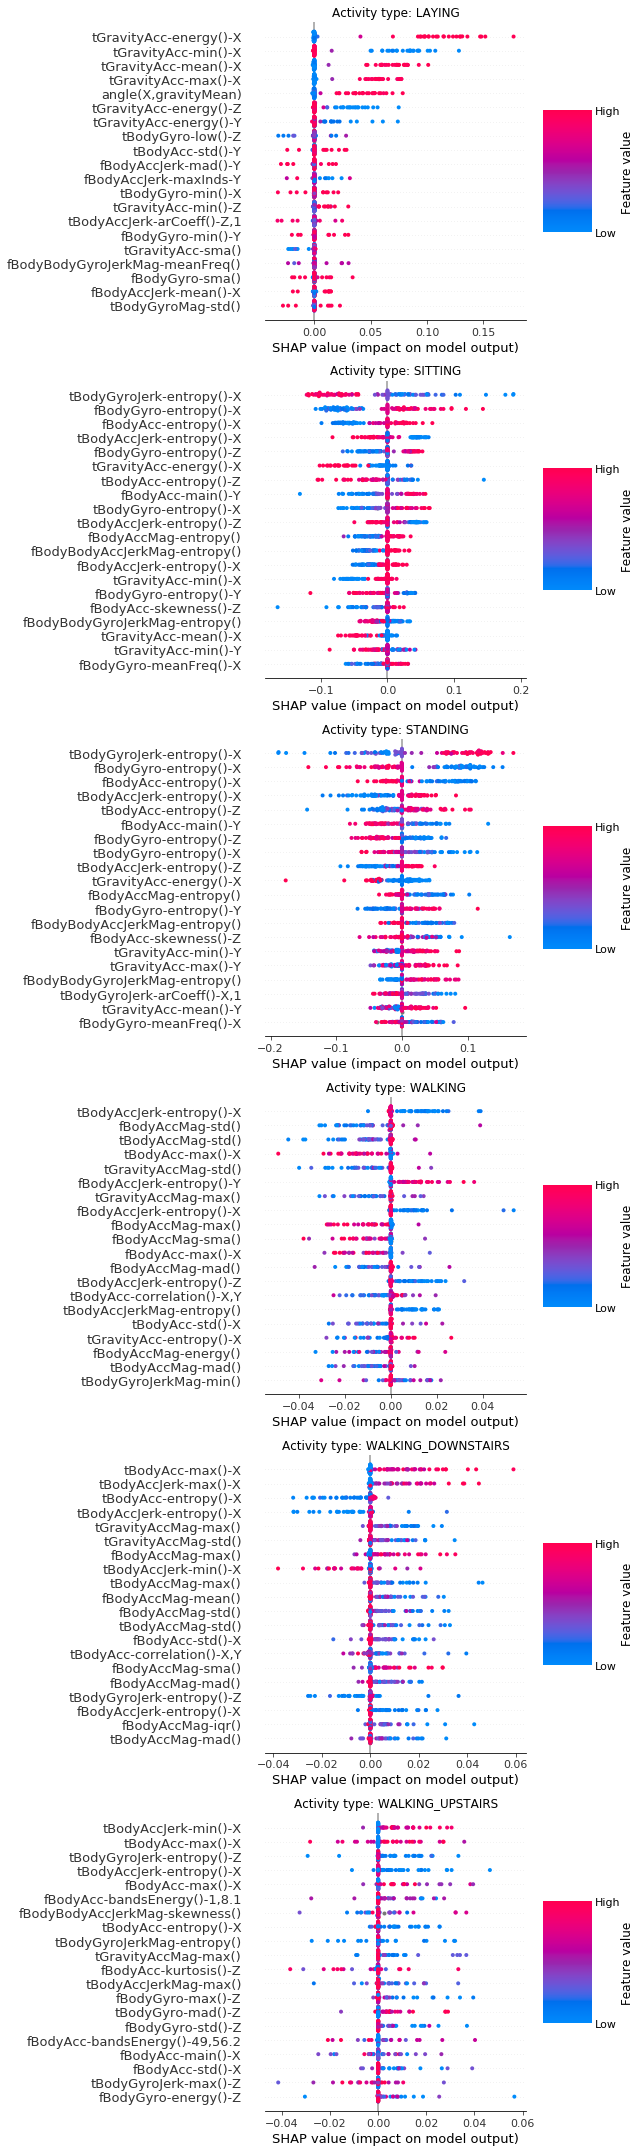

In [18]:
fig, axs = plt.subplots(6, 1)
for i in range(6):
    plt.sca(axs[i])
    shap.summary_plot(shap_values[i], x.values[:explain_observation_no, :], x.columns, plot_type='dot', show=False)
    plt.gca().set_title(f"Activity type: {model.classes_[i]}")
fig.set_size_inches(9, 30)
fig.tight_layout()
plt.savefig(os.path.join('explain-reports','SHAP-dot.png'))

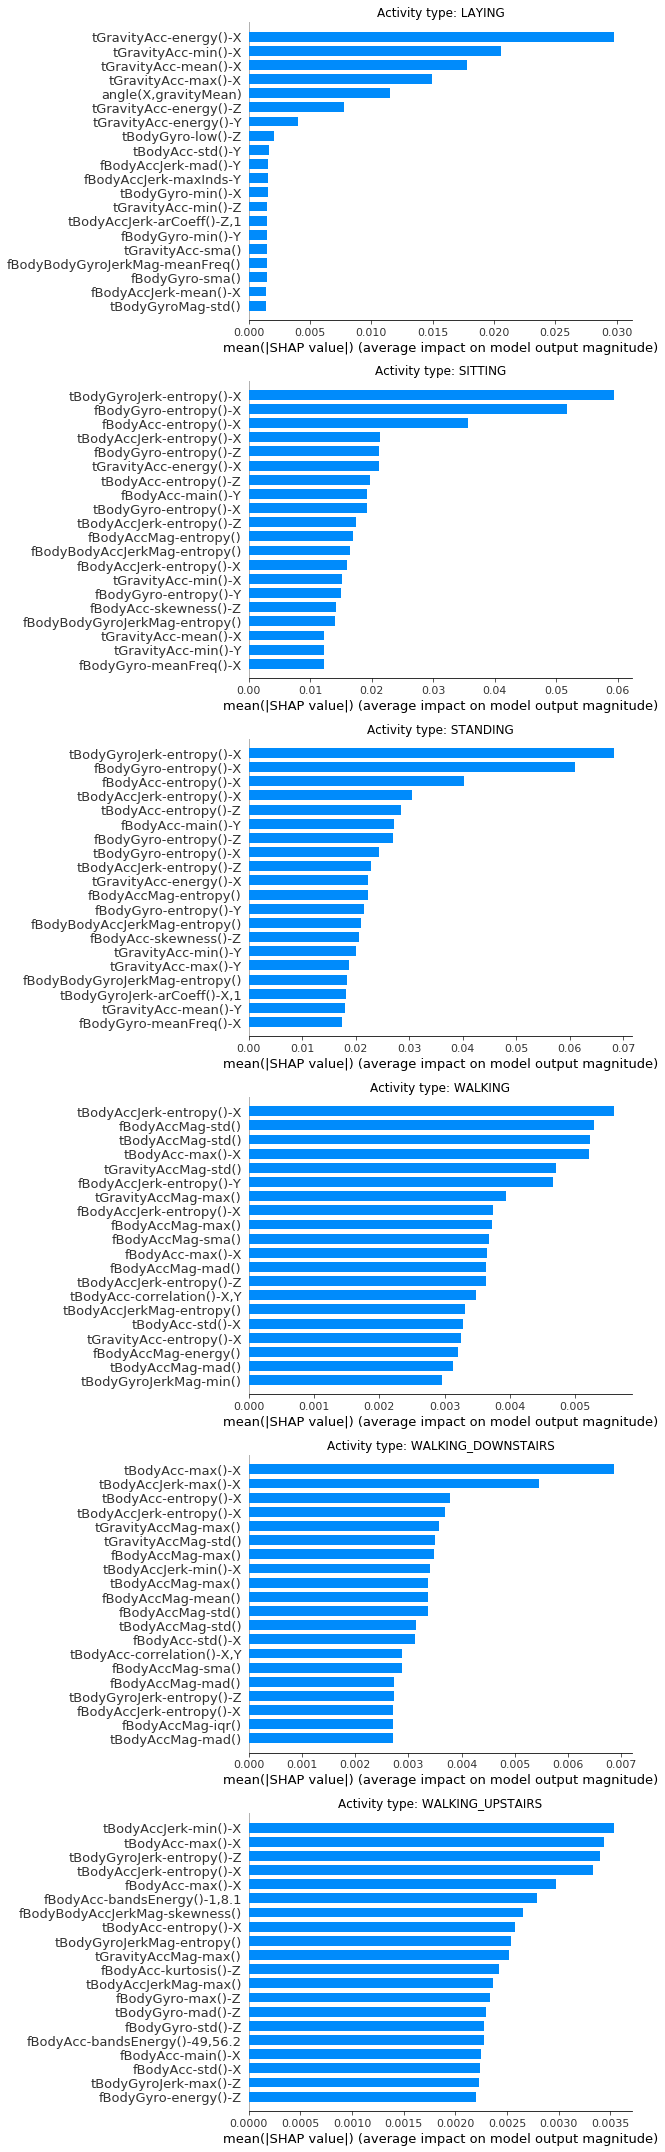

In [19]:
fig, axs = plt.subplots(6, 1)
for i in range(6):
    plt.sca(axs[i])
    shap.summary_plot(shap_values[i], x.columns, plot_type='bar',show=False)
    plt.gca().set_title(f"Activity type: {model.classes_[i]}")
fig.set_size_inches(9, 30)
fig.tight_layout()
plt.savefig(os.path.join('explain-reports','SHAP-FI.png'))

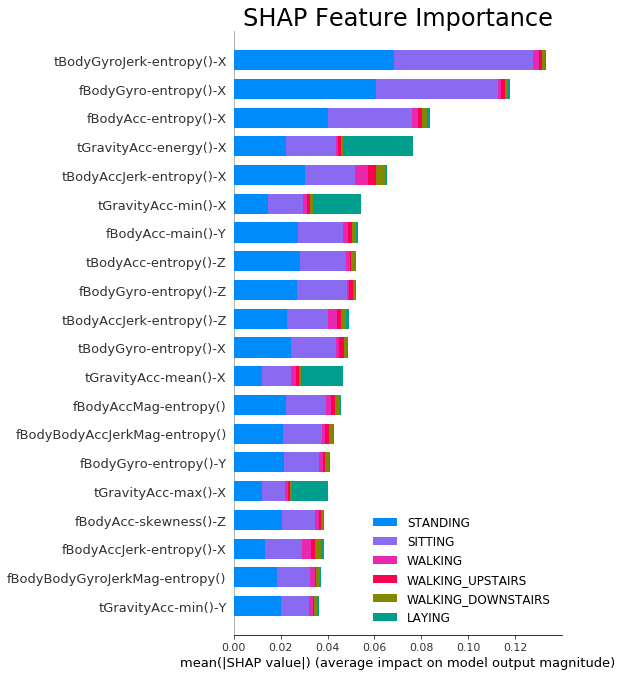

In [20]:
plt.figure()
shap.summary_plot(shap_values, x.columns, plot_type='bar', class_names=list(model.classes_), show=False)
plt.title('SHAP Feature Importance', size=24)
plt.tight_layout()
plt.savefig(os.path.join('explain-reports', 'SHAP-FI-all.png'))
plt.show()

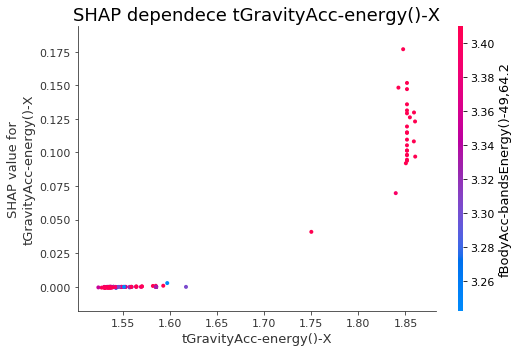

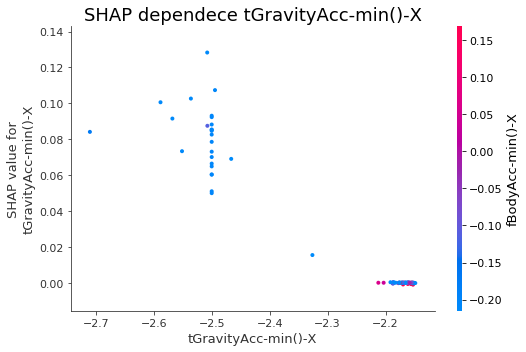

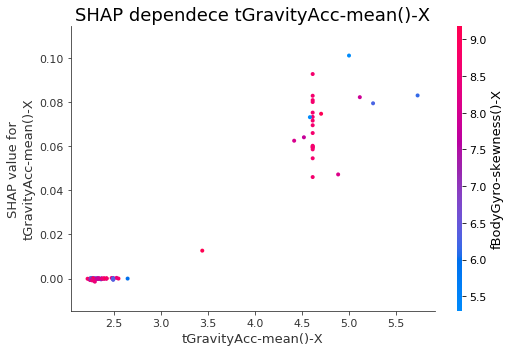

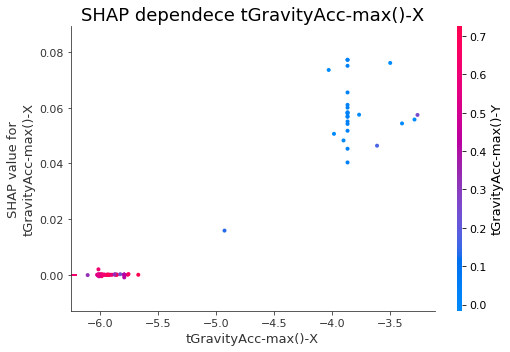

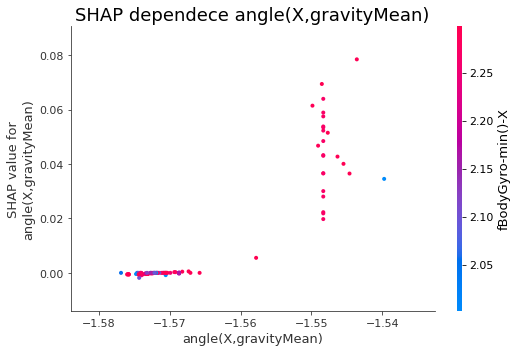

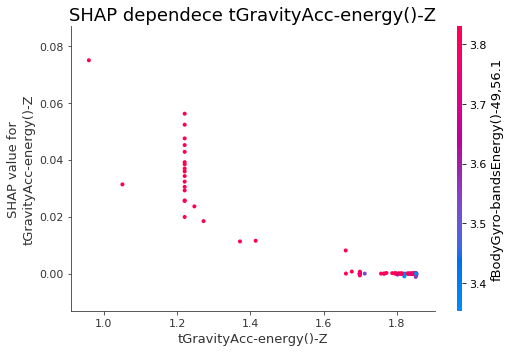

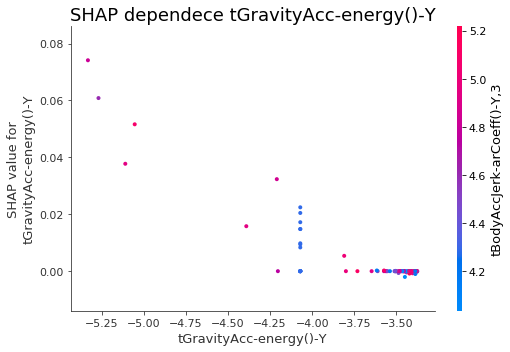

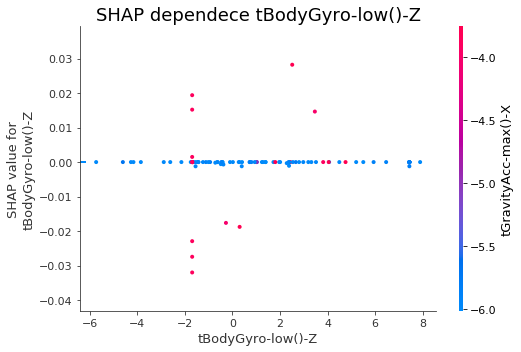

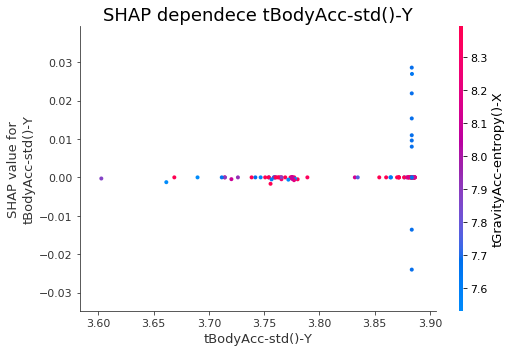

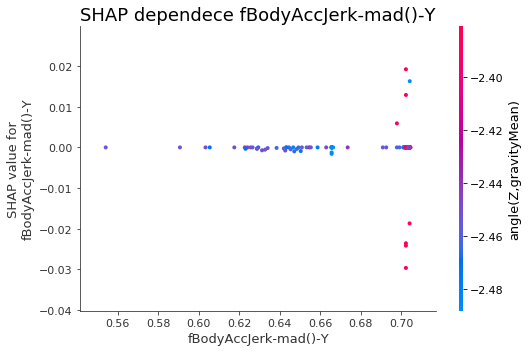

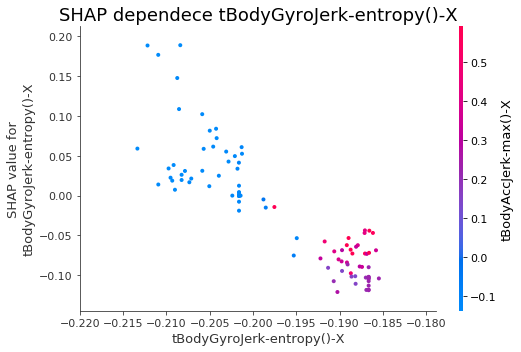

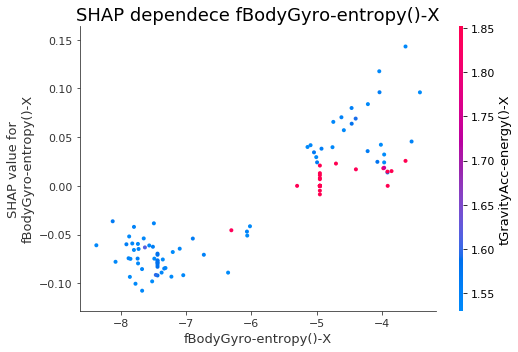

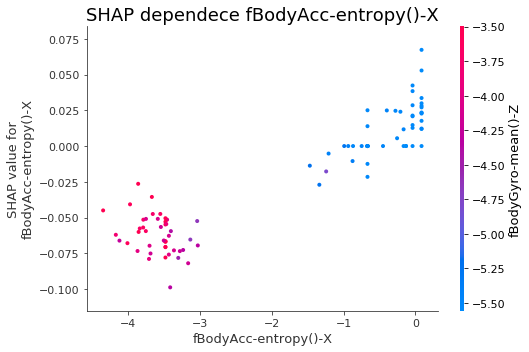

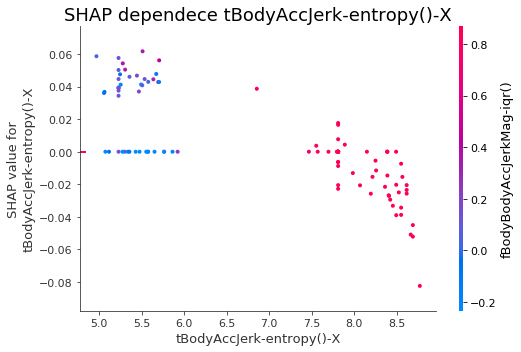

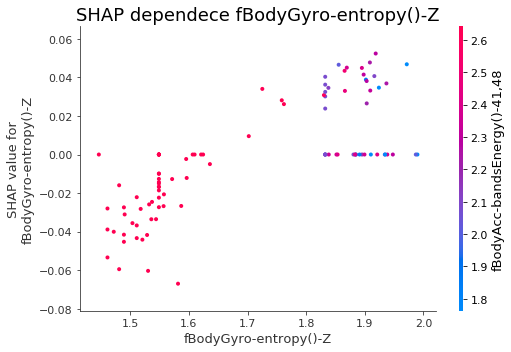

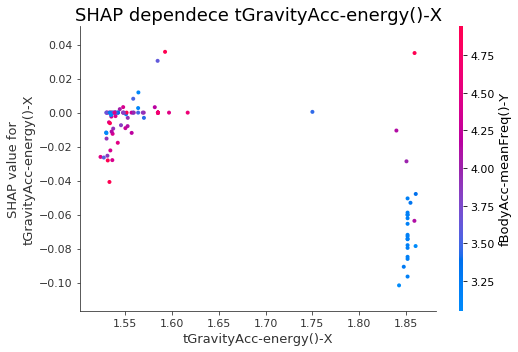

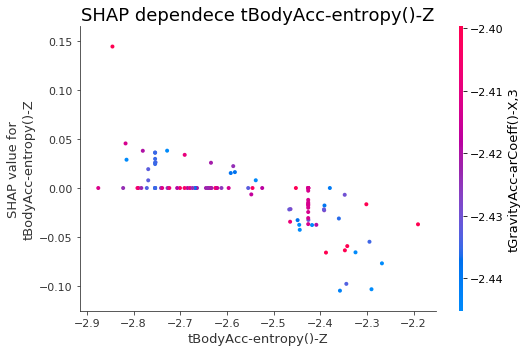

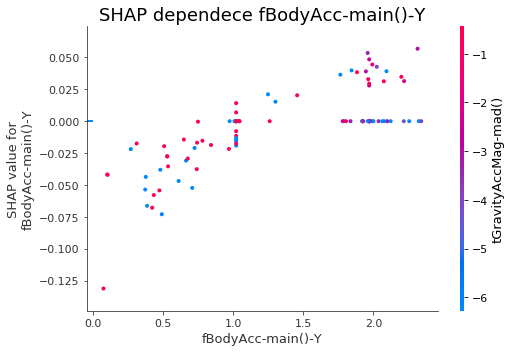

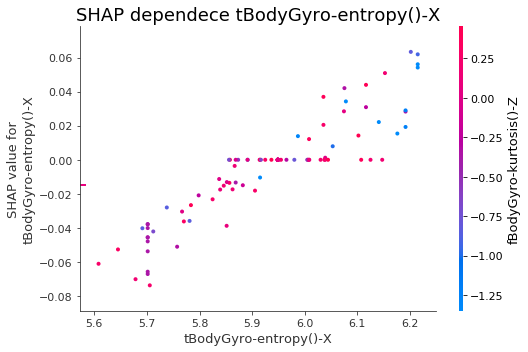

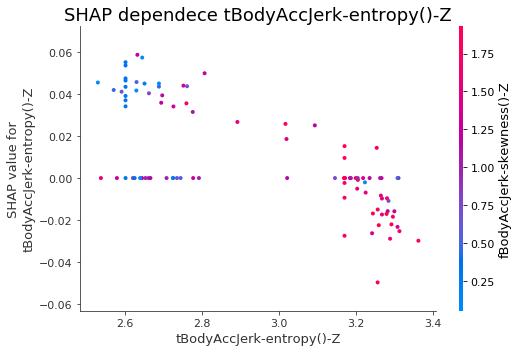

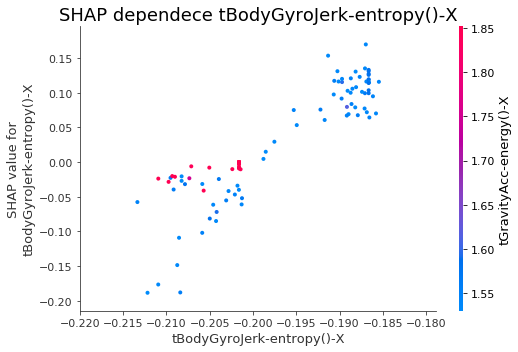

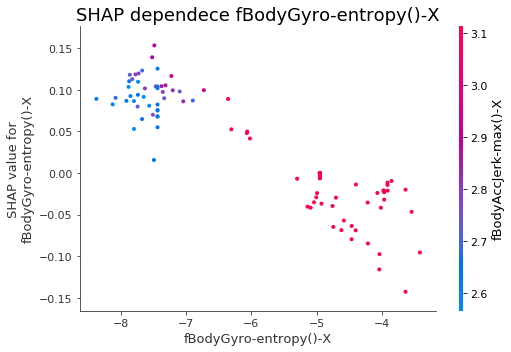

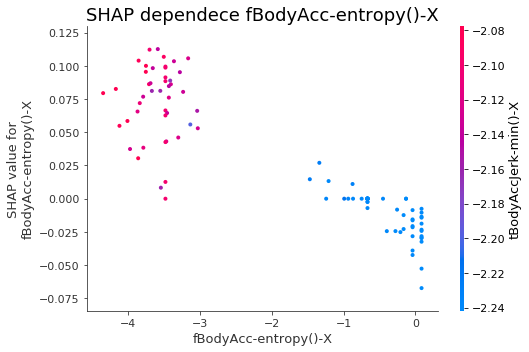

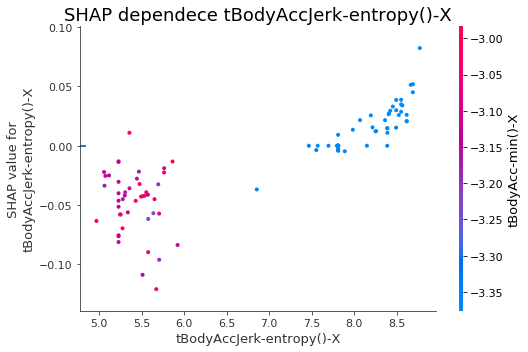

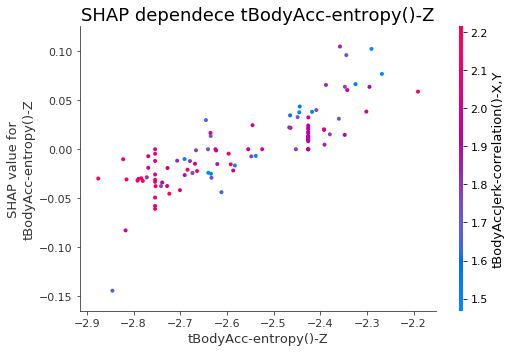

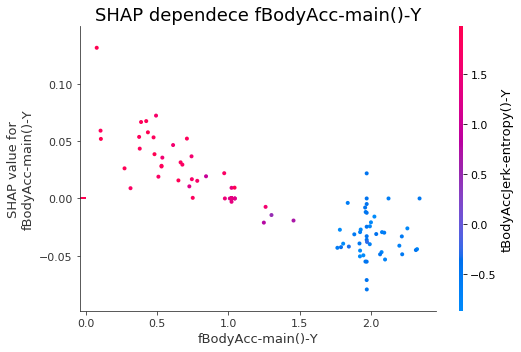

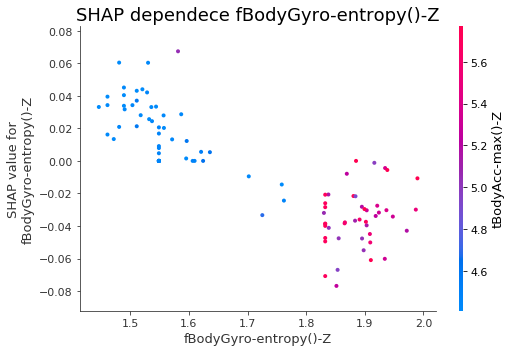

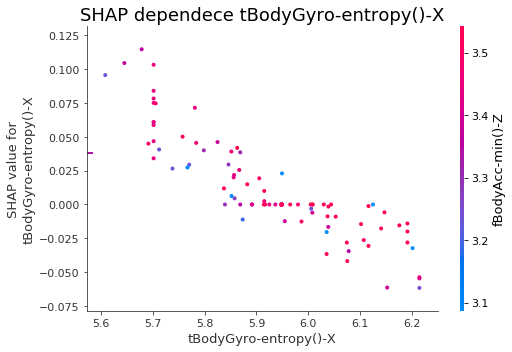

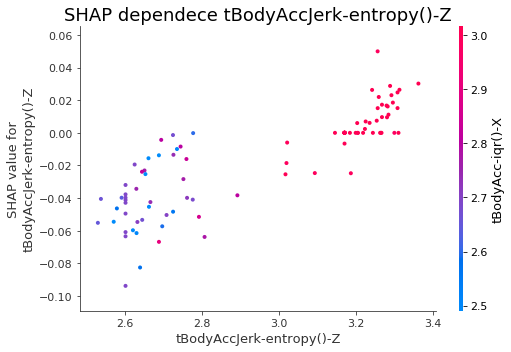

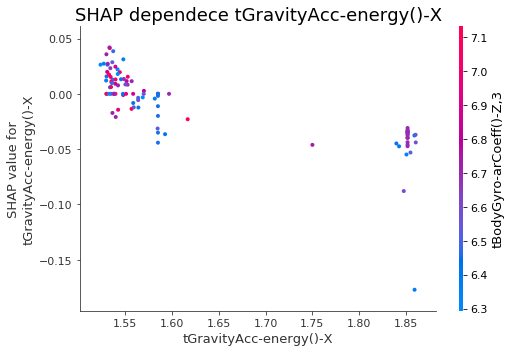

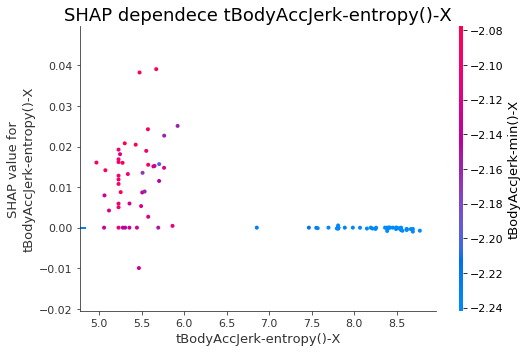

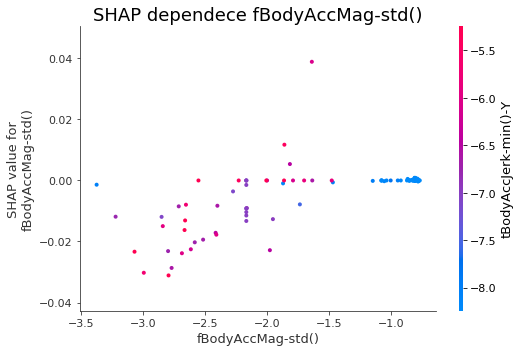

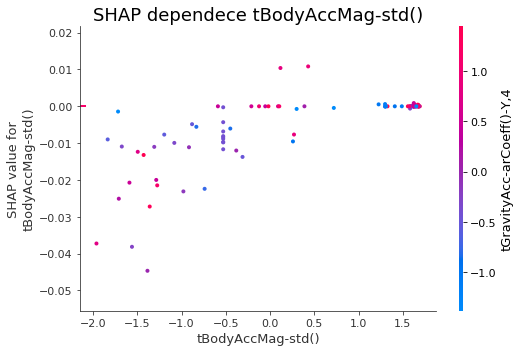

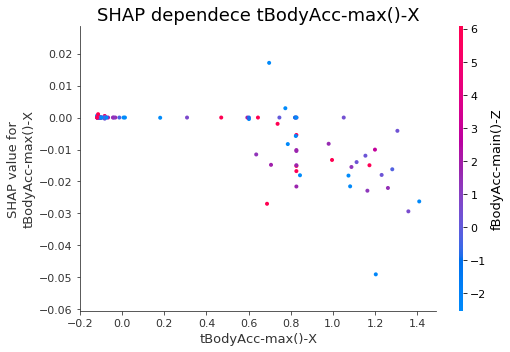

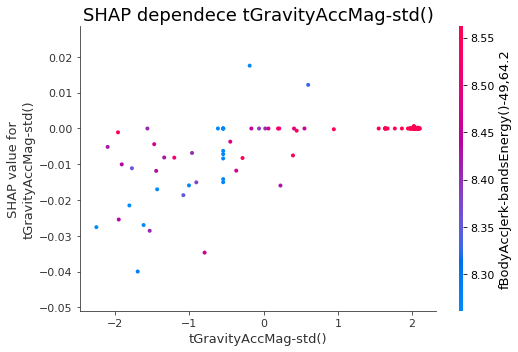

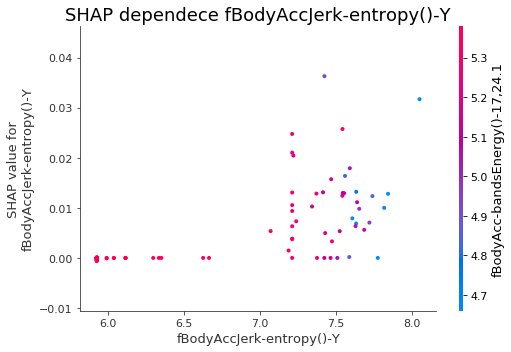

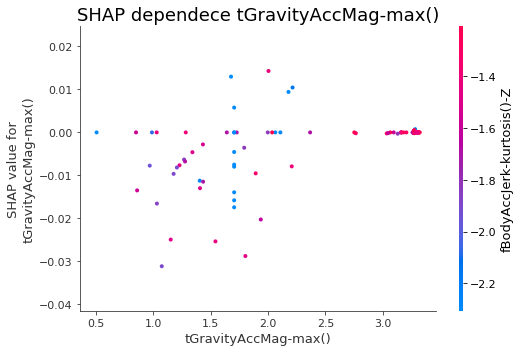

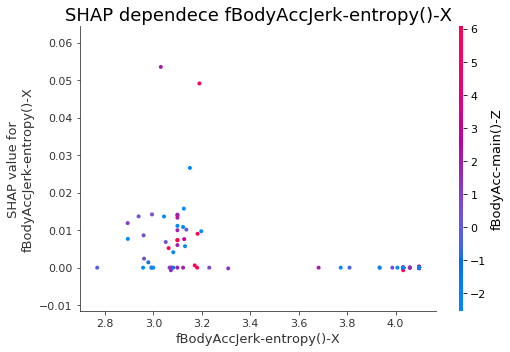

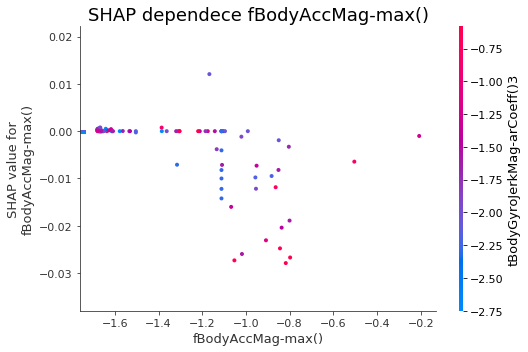

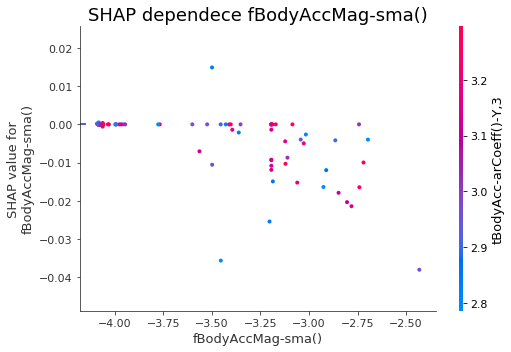

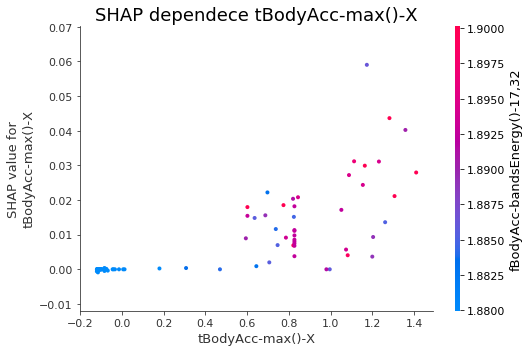

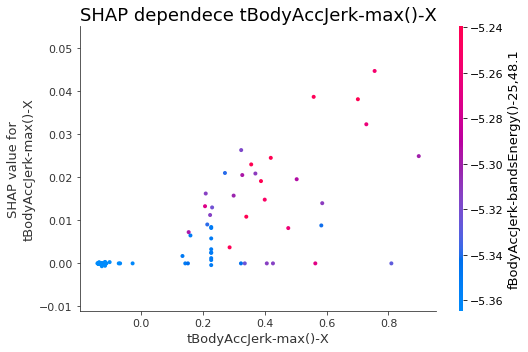

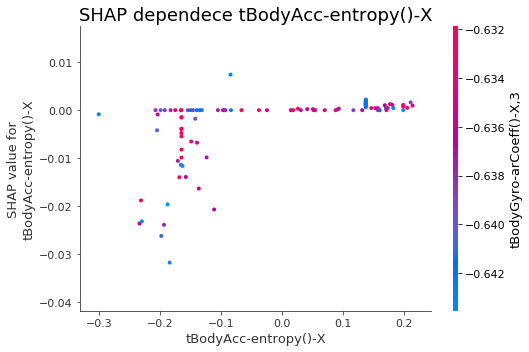

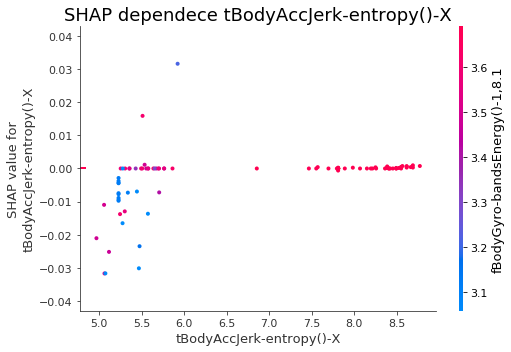

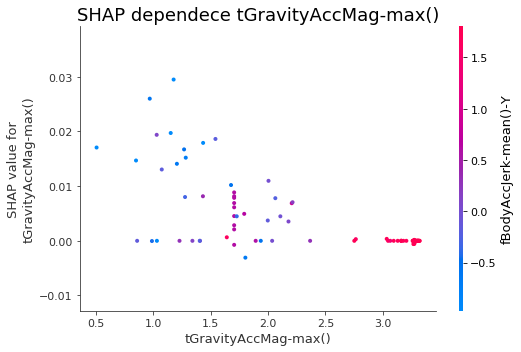

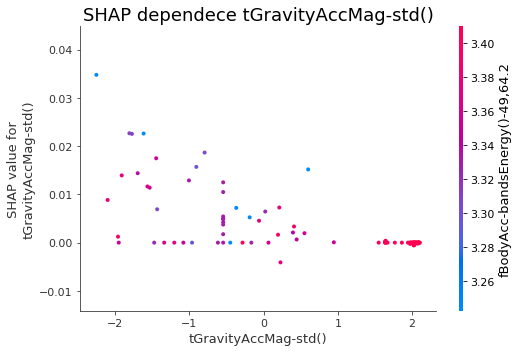

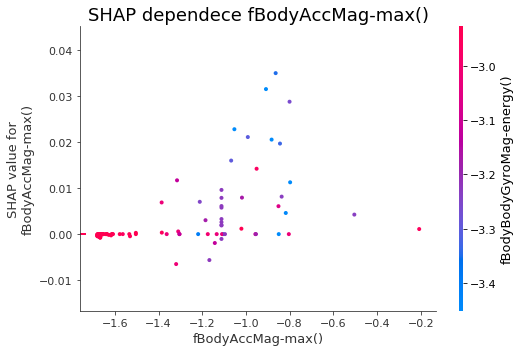

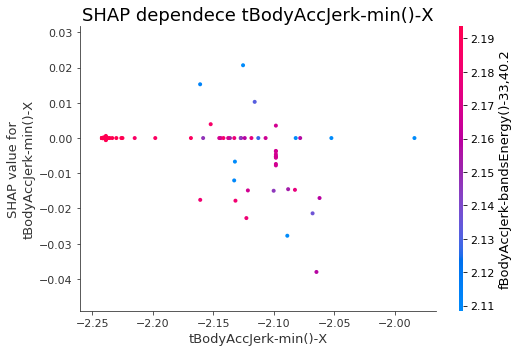

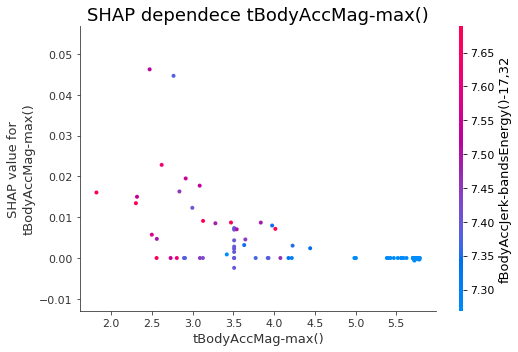

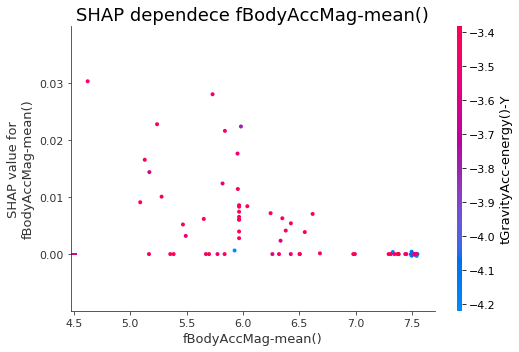

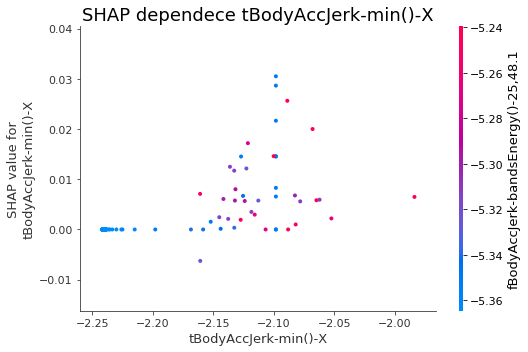

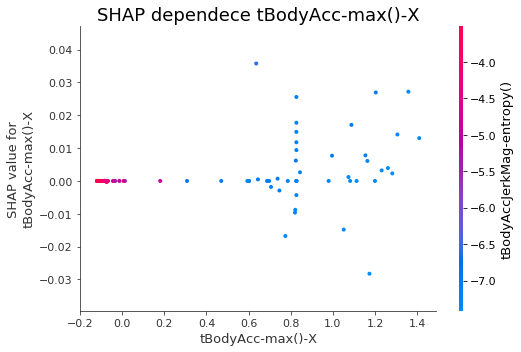

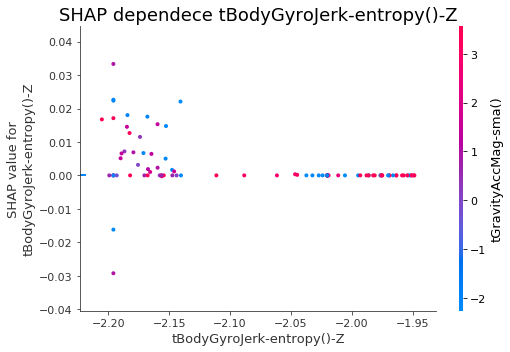

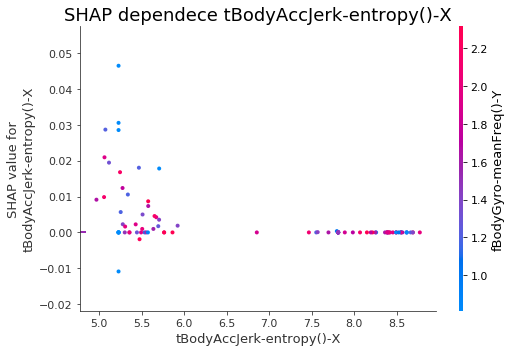

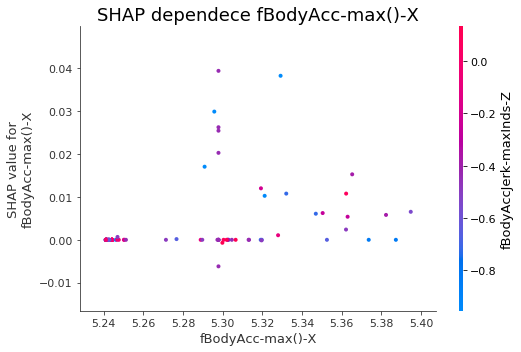

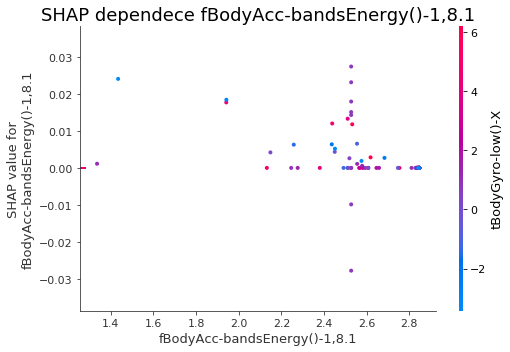

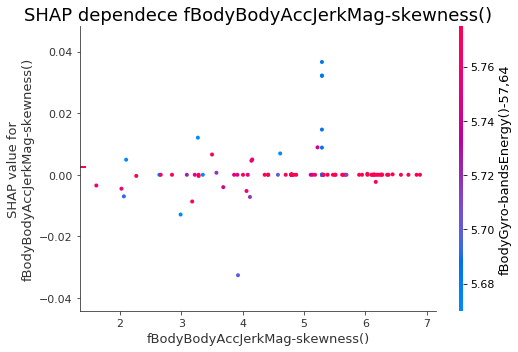

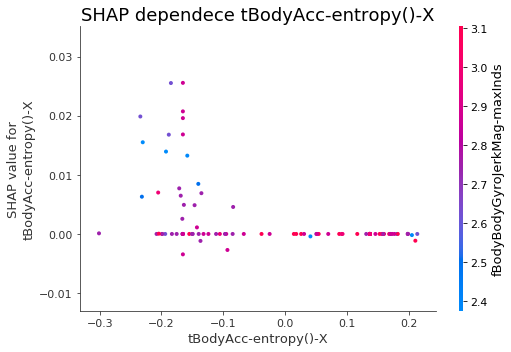

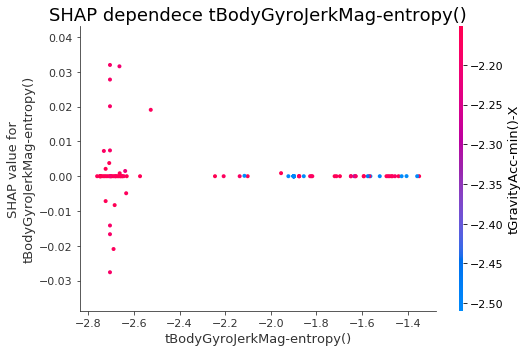

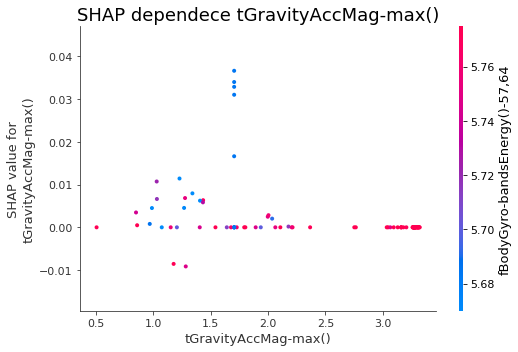

In [25]:
for j in range(6):
    if not os.path.exists(os.path.join('explain-reports','dependence','png',f'{model.classes_[j]}')):
        os.mkdir(os.path.join('explain-reports','dependence','png',f'{model.classes_[j]}'))
    important_features = np.argsort(np.abs(shap_values[j]).mean(0))[-10:][::-1]
    for i, feature in enumerate(important_features):
        shap.dependence_plot(feature, shap_values[j], x.iloc[:explain_observation_no, :], show=False)        
        plt.title(f'SHAP dependece {x.columns[feature]}', size=18)
        plt.tight_layout()
        plt.savefig(os.path.join('explain-reports','dependence','png',f'{model.classes_[j]}',f'SHAP-dependence{x.columns[feature]}.png'), dpi=300)
        plt.show()